# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
            


# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,4.8122,1.7630,-0.3147,-0.1590,-2.4418,1.9125,0.85,12.233545,19.097736,243,2961.898193
1,5.7589,2.4570,-0.2485,0.3429,-0.1997,2.6319,1.00,14.964220,17.704655,248,2218.239746
2,5.8464,2.5153,-0.1054,0.5493,-0.2144,2.7020,1.00,15.329449,17.559893,240,2220.297119
3,5.7526,2.6304,-0.0834,0.3900,-0.3510,2.7763,0.97,15.392742,20.676994,244,3033.770752
4,5.9480,2.6748,0.0000,0.5715,-0.3711,2.8314,1.00,17.944009,21.851387,243,3003.818848


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
 9   g_MAX                 103 non-null    int64  
 10  contr_g_MAX           103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["M_crown_kg_m2", "M_foliage_kg_m2"].describe()

/tmp/ipykernel_45251/4127234604.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_specias"])["M_crown_kg_m2", "M_foliage_kg_m2"].describe()


M_crown_kg_m2                                             \
                         count      mean       std    min      25%    50%   
Dominant_specias                                                            
Alder                      4.0  1.059000  0.593217  0.476  0.68825  0.958   
Aspen                      1.0  1.173000       NaN  1.173  1.17300  1.173   
Birch                     23.0  1.039609  0.409105  0.303  0.77850  1.049   
Oak                        3.0  2.085000  1.209736  1.344  1.38700  1.430   
Pine                      71.0  1.272141  0.638357  0.211  0.82000  1.381   
Spruce                     1.0  4.105000       NaN  4.105  4.10500  4.105   

                                 M_foliage_kg_m2                             \
                      75%    max           count      mean       std    min   
Dominant_specias                                                              
Alder             1.32875  1.844             4.0  0.312000  0.145801  0.130   
Aspen             1.17300  1.173             1.0  0.168000       NaN  0.168   
Birch             1.29450  1.816            23.0  0.189304  0.080503  0.054   
Oak               2.45550  3.481             3.0  0.294333  0.078621  0.205   
Pine              1.67050  2.735            71.0  0.569746  0.267121  0.059   
Spruce            4.10500  4.105             1.0  1.043000       NaN  1.043   

                                                   
                      25%     50%      75%    max  
Dominant_specias                                   
Alder             0.26875  0.3155  0.35875  0.487  
Aspen             0.16800  0.1680  0.16800  0.168  
Birch             0.12500  0.1850  0.25450  0.399  
Oak               0.26500  0.3250  0.33900  0.353  
Pine              0.41950  0.6390  0.74550  1.121  
Spruce            1.04300  1.0430  1.04300  1.043

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
count,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.969534,1.827923,-0.239481,0.05436,-1.021247,2.095454,0.808738,13.045021,17.907784,240.572816,3008.938899
std,1.323782,1.325853,0.893398,0.66008,0.803748,1.079203,0.276653,6.609366,7.523377,9.358442,876.023529
min,0.693100,-2.995700,-3.912000,-1.55590,-2.918800,-0.798500,0.090000,1.293138,2.733019,194.000000,815.342712
25%,4.672800,1.588100,-0.335500,-0.20955,-1.629700,1.801400,0.745000,8.206727,11.615798,236.500000,2464.687256
50%,5.337500,2.286500,-0.040800,0.24450,-0.719500,2.458700,0.960000,13.072916,18.269344,243.000000,2994.793701
75%,5.908100,2.730800,0.190600,0.49195,-0.358800,2.862800,1.000000,17.432255,22.751595,247.000000,3464.970947
max,6.508800,3.220500,1.654400,1.41220,0.114200,3.366600,1.000000,28.916548,36.355442,253.000000,6230.940918


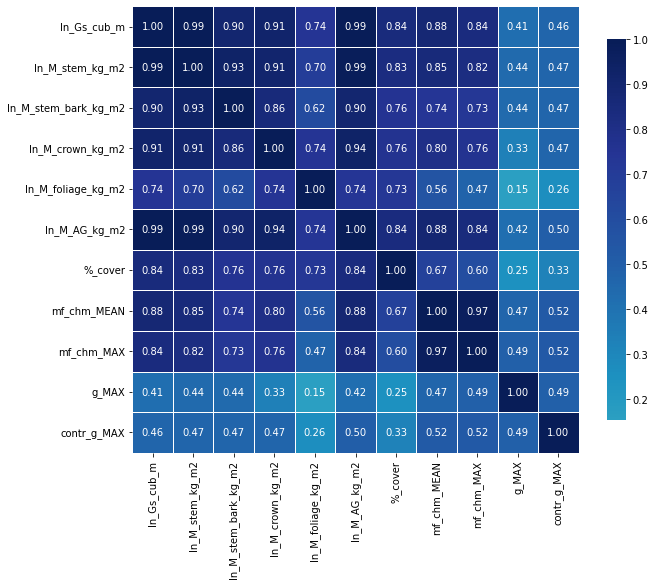

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
y = pd.DataFrame(select, columns= ['ln_M_crown_kg_m2'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,0.85,12.233545,19.097736,243,2961.898193
1,1.00,14.964220,17.704655,248,2218.239746
2,1.00,15.329449,17.559893,240,2220.297119
3,0.97,15.392742,20.676994,244,3033.770752
4,1.00,17.944009,21.851387,243,3003.818848


In [11]:
# Columns in "y" data collections
y.head()

,ln_M_crown_kg_m2
0,-0.1590
1,0.3429
2,0.5493
3,0.3900
4,0.5715


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.4857145861685255, 0.6965931361183302, 0.7701667425154118]
    Mean: 0.651
    Std: 0.121

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.34638832 0.31021741 0.39816616]
    Mean: 0.352
    Std: 0.036

 --------------------
Mean absolute error (MAE): 

    Scores: [0.2495433629894257, 0.2853292822862373, 0.23422561151564997]
    Mean: 0.256
    Std: 0.021

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.749 (std: 0.094)
Parameters: {'colsample_bytree': 0.85594906971537, 'gamma': 0.08026909719227604, 'learning_rate': 0.025467011735823587, 'max_depth': 2, 'n_estimators': 148, 'subsample': 0.9895964560219264}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.5359448 , 0.16929121, 0.41212034, ..., 1.08853397, 1.13672686,
       0.4295126 ]), 'std_fit_time': array([0.10308871, 0.00500866, 0.03053475, ..., 0.02775956, 0.13618024,
       0.01046564]), 'mean_score_time': array([0.00651722, 0.00732684, 0.00618687, ..., 0.01353898, 0.01293626,
       0.01384263]), 'std_score_time': array([4.96432241e-04, 1.16837888e-03, 1.47654349e-04, ...,
       1.66946600e-03, 2.07308429e-03, 8.94903303e-05]), 'param_colsample_bytree': masked_array(data=[0.2948694155118738, 0.3849130617402233,
                   0.6285613821342273, ..., 0.33928537517786045,
                   0.5391234766660582, 0.7069105313040233],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.3459388703771634, 0.42301191513701464,
                   0.4815455890847236, ..., 0.3188591766814472,
                   0.12080511102022001, 0.3296164286830339],
      

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.85594906971537
Gamma: 0.08026909719227604
Learning_rate: 0.025467011735823587
Max_depth: 2
N_estimators: 148
Subsample: 0.9895964560219264


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:0.82507	validation_1-rmse:0.55287
[1]	validation_0-rmse:0.80806	validation_1-rmse:0.54099
[2]	validation_0-rmse:0.79151	validation_1-rmse:0.53038


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.77540	validation_1-rmse:0.52014
[4]	validation_0-rmse:0.75992	validation_1-rmse:0.51079
[5]	validation_0-rmse:0.74465	validation_1-rmse:0.50124
[6]	validation_0-rmse:0.72979	validation_1-rmse:0.49029
[7]	validation_0-rmse:0.71533	validation_1-rmse:0.48142
[8]	validation_0-rmse:0.70125	validation_1-rmse:0.47104
[9]	validation_0-rmse:0.68754	validation_1-rmse:0.46211
[10]	validation_0-rmse:0.67420	validation_1-rmse:0.45310
[11]	validation_0-rmse:0.66123	validation_1-rmse:0.44550
[12]	validation_0-rmse:0.64861	validation_1-rmse:0.43823
[13]	validation_0-rmse:0.63644	validation_1-rmse:0.43034
[14]	validation_0-rmse:0.62447	validation_1-rmse:0.42201
[15]	validation_0-rmse:0.61329	validation_1-rmse:0.41426
[16]	validation_0-rmse:0.60197	validation_1-rmse:0.40787
[17]	validation_0-rmse:0.59102	validation_1-rmse:0.40118
[18]	validation_0-rmse:0.58013	validation_1-rmse:0.39550
[19]	validation_0-rmse:0.56973	validation_1-rmse:0.38938
[20]	validation_0-rmse:0.55964	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.73529	validation_1-rmse:0.43568
[7]	validation_0-rmse:0.72089	validation_1-rmse:0.42269
[8]	validation_0-rmse:0.70691	validation_1-rmse:0.41187
[9]	validation_0-rmse:0.69329	validation_1-rmse:0.40033
[10]	validation_0-rmse:0.68001	validation_1-rmse:0.38848
[11]	validation_0-rmse:0.66684	validation_1-rmse:0.37918
[12]	validation_0-rmse:0.65426	validation_1-rmse:0.36992
[13]	validation_0-rmse:0.64203	validation_1-rmse:0.35951
[14]	validation_0-rmse:0.63024	validation_1-rmse:0.35099
[15]	validation_0-rmse:0.61863	validation_1-rmse:0.34305
[16]	validation_0-rmse:0.60737	validation_1-rmse:0.33504
[17]	validation_0-rmse:0.59637	validation_1-rmse:0.32618
[18]	validation_0-rmse:0.58592	validation_1-rmse:0.31798
[19]	validation_0-rmse:0.57555	validation_1-rmse:0.31002
[20]	validation_0-rmse:0.56547	validation_1-rmse:0.30364
[21]	validation_0-rmse:0.55565	validation_1-rmse:0.29592
[22]	validation_0-rmse:0.54611	validation_1-rmse:0.29007
[23]	validation_0-rmse:0.53685	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.74502	validation_1-rmse:0.59407
[5]	validation_0-rmse:0.73049	validation_1-rmse:0.58161
[6]	validation_0-rmse:0.71629	validation_1-rmse:0.56936
[7]	validation_0-rmse:0.70250	validation_1-rmse:0.55763
[8]	validation_0-rmse:0.68908	validation_1-rmse:0.54610
[9]	validation_0-rmse:0.67619	validation_1-rmse:0.53667
[10]	validation_0-rmse:0.66368	validation_1-rmse:0.52725
[11]	validation_0-rmse:0.65132	validation_1-rmse:0.51661
[12]	validation_0-rmse:0.63946	validation_1-rmse:0.50634
[13]	validation_0-rmse:0.62801	validation_1-rmse:0.49787
[14]	validation_0-rmse:0.61663	validation_1-rmse:0.48811
[15]	validation_0-rmse:0.60568	validation_1-rmse:0.47866
[16]	validation_0-rmse:0.59500	validation_1-rmse:0.46945
[17]	validation_0-rmse:0.58488	validation_1-rmse:0.46173
[18]	validation_0-rmse:0.57484	validation_1-rmse:0.45325
[19]	validation_0-rmse:0.56510	validation_1-rmse:0.44527
[20]	validation_0-rmse:0.55565	validation_1-rmse:0.43735
[21]	validation_0-rmse:0.54642	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.54765	validation_1-rmse:0.54383
[20]	validation_0-rmse:0.53849	validation_1-rmse:0.53550
[21]	validation_0-rmse:0.52942	validation_1-rmse:0.52751
[22]	validation_0-rmse:0.52062	validation_1-rmse:0.51970
[23]	validation_0-rmse:0.51206	validation_1-rmse:0.51252
[24]	validation_0-rmse:0.50334	validation_1-rmse:0.50421
[25]	validation_0-rmse:0.49523	validation_1-rmse:0.49711
[26]	validation_0-rmse:0.48734	validation_1-rmse:0.48996
[27]	validation_0-rmse:0.47911	validation_1-rmse:0.48229
[28]	validation_0-rmse:0.47108	validation_1-rmse:0.47493
[29]	validation_0-rmse:0.46380	validation_1-rmse:0.46841
[30]	validation_0-rmse:0.45666	validation_1-rmse:0.46272
[31]	validation_0-rmse:0.44943	validation_1-rmse:0.45628
[32]	validation_0-rmse:0.44255	validation_1-rmse:0.44967
[33]	validation_0-rmse:0.43605	validation_1-rmse:0.44449
[34]	validation_0-rmse:0.42920	validation_1-rmse:0.43869
[35]	validation_0-rmse:0.42270	validation_1-rmse:0.43321
[36]	validation_0-rmse:0.41640	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.65758	validation_1-rmse:0.49532
[12]	validation_0-rmse:0.64442	validation_1-rmse:0.49086
[13]	validation_0-rmse:0.63194	validation_1-rmse:0.48672
[14]	validation_0-rmse:0.61977	validation_1-rmse:0.48272
[15]	validation_0-rmse:0.60806	validation_1-rmse:0.47908
[16]	validation_0-rmse:0.59655	validation_1-rmse:0.47542
[17]	validation_0-rmse:0.58531	validation_1-rmse:0.47190
[18]	validation_0-rmse:0.57427	validation_1-rmse:0.46668
[19]	validation_0-rmse:0.56376	validation_1-rmse:0.46155
[20]	validation_0-rmse:0.55357	validation_1-rmse:0.45664
[21]	validation_0-rmse:0.54351	validation_1-rmse:0.45360
[22]	validation_0-rmse:0.53376	validation_1-rmse:0.45070
[23]	validation_0-rmse:0.52430	validation_1-rmse:0.44800
[24]	validation_0-rmse:0.51521	validation_1-rmse:0.44484
[25]	validation_0-rmse:0.50631	validation_1-rmse:0.44231
[26]	validation_0-rmse:0.49764	validation_1-rmse:0.43996
[27]	validation_0-rmse:0.48922	validation_1-rmse:0.43778
[28]	validation_0-rmse:0.48130	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.56306	validation_1-rmse:0.36720
[21]	validation_0-rmse:0.55336	validation_1-rmse:0.36030
[22]	validation_0-rmse:0.54395	validation_1-rmse:0.35444
[23]	validation_0-rmse:0.53483	validation_1-rmse:0.34880
[24]	validation_0-rmse:0.52597	validation_1-rmse:0.34278
[25]	validation_0-rmse:0.51736	validation_1-rmse:0.33764
[26]	validation_0-rmse:0.50898	validation_1-rmse:0.33150
[27]	validation_0-rmse:0.50088	validation_1-rmse:0.32686
[28]	validation_0-rmse:0.49315	validation_1-rmse:0.32151
[29]	validation_0-rmse:0.48539	validation_1-rmse:0.31697
[30]	validation_0-rmse:0.47789	validation_1-rmse:0.31310
[31]	validation_0-rmse:0.47068	validation_1-rmse:0.30866
[32]	validation_0-rmse:0.46362	validation_1-rmse:0.30479
[33]	validation_0-rmse:0.45677	validation_1-rmse:0.30087
[34]	validation_0-rmse:0.44957	validation_1-rmse:0.29756
[35]	validation_0-rmse:0.44320	validation_1-rmse:0.29486
[36]	validation_0-rmse:0.43687	validation_1-rmse:0.29224
[37]	validation_0-rmse:0.43079	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.62315	validation_1-rmse:0.51457
[14]	validation_0-rmse:0.61173	validation_1-rmse:0.50427
[15]	validation_0-rmse:0.60070	validation_1-rmse:0.49439
[16]	validation_0-rmse:0.58994	validation_1-rmse:0.48478
[17]	validation_0-rmse:0.57944	validation_1-rmse:0.47640
[18]	validation_0-rmse:0.56928	validation_1-rmse:0.46900
[19]	validation_0-rmse:0.55944	validation_1-rmse:0.46114
[20]	validation_0-rmse:0.54988	validation_1-rmse:0.45448
[21]	validation_0-rmse:0.54042	validation_1-rmse:0.44698
[22]	validation_0-rmse:0.53133	validation_1-rmse:0.43900
[23]	validation_0-rmse:0.52251	validation_1-rmse:0.43130
[24]	validation_0-rmse:0.51397	validation_1-rmse:0.42560
[25]	validation_0-rmse:0.50571	validation_1-rmse:0.41861
[26]	validation_0-rmse:0.49752	validation_1-rmse:0.41291
[27]	validation_0-rmse:0.48948	validation_1-rmse:0.40622
[28]	validation_0-rmse:0.48195	validation_1-rmse:0.40077
[29]	validation_0-rmse:0.47445	validation_1-rmse:0.39451
[30]	validation_0-rmse:0.46726	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.55774	validation_1-rmse:0.56472
[19]	validation_0-rmse:0.54848	validation_1-rmse:0.55650
[20]	validation_0-rmse:0.53949	validation_1-rmse:0.54718
[21]	validation_0-rmse:0.53065	validation_1-rmse:0.53898
[22]	validation_0-rmse:0.52208	validation_1-rmse:0.52991
[23]	validation_0-rmse:0.51376	validation_1-rmse:0.52213
[24]	validation_0-rmse:0.50573	validation_1-rmse:0.51398
[25]	validation_0-rmse:0.49788	validation_1-rmse:0.50682
[26]	validation_0-rmse:0.48989	validation_1-rmse:0.50012
[27]	validation_0-rmse:0.48248	validation_1-rmse:0.49574
[28]	validation_0-rmse:0.47522	validation_1-rmse:0.48820
[29]	validation_0-rmse:0.46818	validation_1-rmse:0.48059
[30]	validation_0-rmse:0.46139	validation_1-rmse:0.47318
[31]	validation_0-rmse:0.45436	validation_1-rmse:0.46825
[32]	validation_0-rmse:0.44764	validation_1-rmse:0.46123
[33]	validation_0-rmse:0.44120	validation_1-rmse:0.45447
[34]	validation_0-rmse:0.43469	validation_1-rmse:0.44939
[35]	validation_0-rmse:0.42840	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.53169	validation_1-rmse:0.54815
[21]	validation_0-rmse:0.52313	validation_1-rmse:0.53816
[22]	validation_0-rmse:0.51483	validation_1-rmse:0.52852
[23]	validation_0-rmse:0.50676	validation_1-rmse:0.51917
[24]	validation_0-rmse:0.49897	validation_1-rmse:0.50992
[25]	validation_0-rmse:0.49138	validation_1-rmse:0.50017
[26]	validation_0-rmse:0.48398	validation_1-rmse:0.49168
[27]	validation_0-rmse:0.47674	validation_1-rmse:0.48336
[28]	validation_0-rmse:0.47064	validation_1-rmse:0.47681
[29]	validation_0-rmse:0.46359	validation_1-rmse:0.46882
[30]	validation_0-rmse:0.45678	validation_1-rmse:0.46111
[31]	validation_0-rmse:0.45043	validation_1-rmse:0.45388
[32]	validation_0-rmse:0.44403	validation_1-rmse:0.44549
[33]	validation_0-rmse:0.43786	validation_1-rmse:0.43820
[34]	validation_0-rmse:0.43185	validation_1-rmse:0.43056
[35]	validation_0-rmse:0.42598	validation_1-rmse:0.42356
[36]	validation_0-rmse:0.42033	validation_1-rmse:0.41619
[37]	validation_0-rmse:0.41485	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.56805	validation_1-rmse:0.54574
[18]	validation_0-rmse:0.55855	validation_1-rmse:0.53533
[19]	validation_0-rmse:0.54934	validation_1-rmse:0.52500
[20]	validation_0-rmse:0.54040	validation_1-rmse:0.51519
[21]	validation_0-rmse:0.53170	validation_1-rmse:0.50518
[22]	validation_0-rmse:0.52326	validation_1-rmse:0.49521
[23]	validation_0-rmse:0.51506	validation_1-rmse:0.48748
[24]	validation_0-rmse:0.50711	validation_1-rmse:0.47860
[25]	validation_0-rmse:0.49936	validation_1-rmse:0.46957
[26]	validation_0-rmse:0.49164	validation_1-rmse:0.45987
[27]	validation_0-rmse:0.48434	validation_1-rmse:0.45307
[28]	validation_0-rmse:0.47745	validation_1-rmse:0.44543
[29]	validation_0-rmse:0.47037	validation_1-rmse:0.43658
[30]	validation_0-rmse:0.46352	validation_1-rmse:0.42802
[31]	validation_0-rmse:0.45705	validation_1-rmse:0.42096
[32]	validation_0-rmse:0.45044	validation_1-rmse:0.41513
[33]	validation_0-rmse:0.44417	validation_1-rmse:0.40733
[34]	validation_0-rmse:0.43791	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.61747	validation_1-rmse:0.89551
[8]	validation_0-rmse:0.60662	validation_1-rmse:0.87810
[9]	validation_0-rmse:0.59610	validation_1-rmse:0.86247
[10]	validation_0-rmse:0.58590	validation_1-rmse:0.84702
[11]	validation_0-rmse:0.57611	validation_1-rmse:0.83202
[12]	validation_0-rmse:0.56648	validation_1-rmse:0.81738
[13]	validation_0-rmse:0.55711	validation_1-rmse:0.80244
[14]	validation_0-rmse:0.54793	validation_1-rmse:0.78753
[15]	validation_0-rmse:0.53936	validation_1-rmse:0.77466
[16]	validation_0-rmse:0.53080	validation_1-rmse:0.76149
[17]	validation_0-rmse:0.52237	validation_1-rmse:0.74780
[18]	validation_0-rmse:0.51443	validation_1-rmse:0.73470
[19]	validation_0-rmse:0.50662	validation_1-rmse:0.72136
[20]	validation_0-rmse:0.49905	validation_1-rmse:0.70839
[21]	validation_0-rmse:0.49156	validation_1-rmse:0.69758
[22]	validation_0-rmse:0.48428	validation_1-rmse:0.68731
[23]	validation_0-rmse:0.47722	validation_1-rmse:0.67706
[24]	validation_0-rmse:0.47047	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.54784	validation_1-rmse:0.47174
[21]	validation_0-rmse:0.53872	validation_1-rmse:0.46489
[22]	validation_0-rmse:0.52967	validation_1-rmse:0.45670
[23]	validation_0-rmse:0.52091	validation_1-rmse:0.44809
[24]	validation_0-rmse:0.51260	validation_1-rmse:0.44101
[25]	validation_0-rmse:0.50437	validation_1-rmse:0.43226
[26]	validation_0-rmse:0.49631	validation_1-rmse:0.42533
[27]	validation_0-rmse:0.48853	validation_1-rmse:0.41805
[28]	validation_0-rmse:0.48129	validation_1-rmse:0.41196
[29]	validation_0-rmse:0.47388	validation_1-rmse:0.40585
[30]	validation_0-rmse:0.46662	validation_1-rmse:0.40166
[31]	validation_0-rmse:0.45985	validation_1-rmse:0.39599
[32]	validation_0-rmse:0.45306	validation_1-rmse:0.39063
[33]	validation_0-rmse:0.44636	validation_1-rmse:0.38689
[34]	validation_0-rmse:0.44001	validation_1-rmse:0.38054
[35]	validation_0-rmse:0.43376	validation_1-rmse:0.37718
[36]	validation_0-rmse:0.42773	validation_1-rmse:0.37272
[37]	validation_0-rmse:0.42195	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.56670	validation_1-rmse:0.28197
[22]	validation_0-rmse:0.55693	validation_1-rmse:0.27804
[23]	validation_0-rmse:0.54743	validation_1-rmse:0.27393
[24]	validation_0-rmse:0.53833	validation_1-rmse:0.26987
[25]	validation_0-rmse:0.52935	validation_1-rmse:0.26684
[26]	validation_0-rmse:0.52064	validation_1-rmse:0.26406
[27]	validation_0-rmse:0.51217	validation_1-rmse:0.26083
[28]	validation_0-rmse:0.50443	validation_1-rmse:0.25743
[29]	validation_0-rmse:0.49645	validation_1-rmse:0.25536
[30]	validation_0-rmse:0.48872	validation_1-rmse:0.25235
[31]	validation_0-rmse:0.48130	validation_1-rmse:0.25000
[32]	validation_0-rmse:0.47398	validation_1-rmse:0.24949
[33]	validation_0-rmse:0.46707	validation_1-rmse:0.24855
[34]	validation_0-rmse:0.46006	validation_1-rmse:0.24683
[35]	validation_0-rmse:0.45301	validation_1-rmse:0.24613
[36]	validation_0-rmse:0.44619	validation_1-rmse:0.24552
[37]	validation_0-rmse:0.43959	validation_1-rmse:0.24499
[38]	validation_0-rmse:0.43346	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.55331	validation_1-rmse:0.50557
[20]	validation_0-rmse:0.54368	validation_1-rmse:0.49916
[21]	validation_0-rmse:0.53420	validation_1-rmse:0.49318
[22]	validation_0-rmse:0.52500	validation_1-rmse:0.48775
[23]	validation_0-rmse:0.51608	validation_1-rmse:0.48234
[24]	validation_0-rmse:0.50751	validation_1-rmse:0.47677
[25]	validation_0-rmse:0.49910	validation_1-rmse:0.47165
[26]	validation_0-rmse:0.49093	validation_1-rmse:0.46682
[27]	validation_0-rmse:0.48300	validation_1-rmse:0.46242
[28]	validation_0-rmse:0.47536	validation_1-rmse:0.45659
[29]	validation_0-rmse:0.46785	validation_1-rmse:0.45214
[30]	validation_0-rmse:0.46058	validation_1-rmse:0.44708
[31]	validation_0-rmse:0.45363	validation_1-rmse:0.44277
[32]	validation_0-rmse:0.44677	validation_1-rmse:0.43768
[33]	validation_0-rmse:0.44014	validation_1-rmse:0.43417
[34]	validation_0-rmse:0.43380	validation_1-rmse:0.42957
[35]	validation_0-rmse:0.42751	validation_1-rmse:0.42606
[36]	validation_0-rmse:0.42143	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.52507	validation_1-rmse:0.54721
[22]	validation_0-rmse:0.51617	validation_1-rmse:0.53824
[23]	validation_0-rmse:0.50753	validation_1-rmse:0.53137
[24]	validation_0-rmse:0.49931	validation_1-rmse:0.52378
[25]	validation_0-rmse:0.49116	validation_1-rmse:0.51626
[26]	validation_0-rmse:0.48323	validation_1-rmse:0.50938
[27]	validation_0-rmse:0.47555	validation_1-rmse:0.50232
[28]	validation_0-rmse:0.46824	validation_1-rmse:0.49576
[29]	validation_0-rmse:0.46098	validation_1-rmse:0.48853
[30]	validation_0-rmse:0.45396	validation_1-rmse:0.48212
[31]	validation_0-rmse:0.44729	validation_1-rmse:0.47697
[32]	validation_0-rmse:0.44085	validation_1-rmse:0.47172
[33]	validation_0-rmse:0.43439	validation_1-rmse:0.46643
[34]	validation_0-rmse:0.42820	validation_1-rmse:0.46185
[35]	validation_0-rmse:0.42184	validation_1-rmse:0.45762
[36]	validation_0-rmse:0.41594	validation_1-rmse:0.45371
[37]	validation_0-rmse:0.41030	validation_1-rmse:0.44958
[38]	validation_0-rmse:0.40485	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.54771	validation_1-rmse:0.52204
[20]	validation_0-rmse:0.53809	validation_1-rmse:0.51474
[21]	validation_0-rmse:0.52869	validation_1-rmse:0.50855
[22]	validation_0-rmse:0.51955	validation_1-rmse:0.50177
[23]	validation_0-rmse:0.51065	validation_1-rmse:0.49525
[24]	validation_0-rmse:0.50207	validation_1-rmse:0.48913
[25]	validation_0-rmse:0.49358	validation_1-rmse:0.48274
[26]	validation_0-rmse:0.48542	validation_1-rmse:0.47702
[27]	validation_0-rmse:0.47740	validation_1-rmse:0.47115
[28]	validation_0-rmse:0.46976	validation_1-rmse:0.46588
[29]	validation_0-rmse:0.46213	validation_1-rmse:0.46024
[30]	validation_0-rmse:0.45473	validation_1-rmse:0.45483
[31]	validation_0-rmse:0.44768	validation_1-rmse:0.45034
[32]	validation_0-rmse:0.44071	validation_1-rmse:0.44530
[33]	validation_0-rmse:0.43396	validation_1-rmse:0.44047
[34]	validation_0-rmse:0.42743	validation_1-rmse:0.43623
[35]	validation_0-rmse:0.42106	validation_1-rmse:0.43260
[36]	validation_0-rmse:0.41486	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.56308	validation_1-rmse:0.47404
[20]	validation_0-rmse:0.55335	validation_1-rmse:0.46808
[21]	validation_0-rmse:0.54388	validation_1-rmse:0.46223
[22]	validation_0-rmse:0.53468	validation_1-rmse:0.45868
[23]	validation_0-rmse:0.52575	validation_1-rmse:0.45319
[24]	validation_0-rmse:0.51708	validation_1-rmse:0.44990
[25]	validation_0-rmse:0.50865	validation_1-rmse:0.44461
[26]	validation_0-rmse:0.50046	validation_1-rmse:0.44156
[27]	validation_0-rmse:0.49253	validation_1-rmse:0.43604
[28]	validation_0-rmse:0.48481	validation_1-rmse:0.43075
[29]	validation_0-rmse:0.47726	validation_1-rmse:0.42804
[30]	validation_0-rmse:0.46996	validation_1-rmse:0.42478
[31]	validation_0-rmse:0.46288	validation_1-rmse:0.42226
[32]	validation_0-rmse:0.45597	validation_1-rmse:0.41805
[33]	validation_0-rmse:0.44891	validation_1-rmse:0.41301
[34]	validation_0-rmse:0.44209	validation_1-rmse:0.40808
[35]	validation_0-rmse:0.43532	validation_1-rmse:0.40331
[36]	validation_0-rmse:0.42908	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.60266	validation_1-rmse:0.67471
[13]	validation_0-rmse:0.59147	validation_1-rmse:0.66463
[14]	validation_0-rmse:0.58061	validation_1-rmse:0.65451
[15]	validation_0-rmse:0.56960	validation_1-rmse:0.64465
[16]	validation_0-rmse:0.55933	validation_1-rmse:0.63516
[17]	validation_0-rmse:0.54962	validation_1-rmse:0.62656
[18]	validation_0-rmse:0.54001	validation_1-rmse:0.61563
[19]	validation_0-rmse:0.53066	validation_1-rmse:0.60509
[20]	validation_0-rmse:0.52158	validation_1-rmse:0.59670
[21]	validation_0-rmse:0.51263	validation_1-rmse:0.58899
[22]	validation_0-rmse:0.50394	validation_1-rmse:0.58169
[23]	validation_0-rmse:0.49552	validation_1-rmse:0.57398
[24]	validation_0-rmse:0.48740	validation_1-rmse:0.56500
[25]	validation_0-rmse:0.47936	validation_1-rmse:0.55956
[26]	validation_0-rmse:0.47156	validation_1-rmse:0.55429
[27]	validation_0-rmse:0.46405	validation_1-rmse:0.54839
[28]	validation_0-rmse:0.45644	validation_1-rmse:0.53997
[29]	validation_0-rmse:0.44932	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.51197	validation_1-rmse:0.59777
[22]	validation_0-rmse:0.50309	validation_1-rmse:0.59154
[23]	validation_0-rmse:0.49445	validation_1-rmse:0.58562
[24]	validation_0-rmse:0.48610	validation_1-rmse:0.57936
[25]	validation_0-rmse:0.47792	validation_1-rmse:0.57380
[26]	validation_0-rmse:0.46997	validation_1-rmse:0.56830
[27]	validation_0-rmse:0.46215	validation_1-rmse:0.56304
[28]	validation_0-rmse:0.45445	validation_1-rmse:0.55735
[29]	validation_0-rmse:0.44716	validation_1-rmse:0.55236
[30]	validation_0-rmse:0.44008	validation_1-rmse:0.54754
[31]	validation_0-rmse:0.43325	validation_1-rmse:0.54267
[32]	validation_0-rmse:0.42687	validation_1-rmse:0.53757
[33]	validation_0-rmse:0.42038	validation_1-rmse:0.53332
[34]	validation_0-rmse:0.41404	validation_1-rmse:0.52775
[35]	validation_0-rmse:0.40785	validation_1-rmse:0.52342
[36]	validation_0-rmse:0.40187	validation_1-rmse:0.51933
[37]	validation_0-rmse:0.39607	validation_1-rmse:0.51520
[38]	validation_0-rmse:0.39049	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.53046	validation_1-rmse:0.63780
[20]	validation_0-rmse:0.52186	validation_1-rmse:0.62843
[21]	validation_0-rmse:0.51343	validation_1-rmse:0.61901
[22]	validation_0-rmse:0.50525	validation_1-rmse:0.61002
[23]	validation_0-rmse:0.49729	validation_1-rmse:0.60216
[24]	validation_0-rmse:0.48965	validation_1-rmse:0.59381
[25]	validation_0-rmse:0.48198	validation_1-rmse:0.58560
[26]	validation_0-rmse:0.47445	validation_1-rmse:0.57751
[27]	validation_0-rmse:0.46733	validation_1-rmse:0.57003
[28]	validation_0-rmse:0.46037	validation_1-rmse:0.56298
[29]	validation_0-rmse:0.45346	validation_1-rmse:0.55549
[30]	validation_0-rmse:0.44677	validation_1-rmse:0.54813
[31]	validation_0-rmse:0.44053	validation_1-rmse:0.54144
[32]	validation_0-rmse:0.43425	validation_1-rmse:0.53509
[33]	validation_0-rmse:0.42816	validation_1-rmse:0.52838
[34]	validation_0-rmse:0.42189	validation_1-rmse:0.52243
[35]	validation_0-rmse:0.41581	validation_1-rmse:0.51688
[36]	validation_0-rmse:0.41017	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.61239	validation_1-rmse:0.49598
[15]	validation_0-rmse:0.60139	validation_1-rmse:0.48465
[16]	validation_0-rmse:0.59101	validation_1-rmse:0.47433
[17]	validation_0-rmse:0.58091	validation_1-rmse:0.46579
[18]	validation_0-rmse:0.57114	validation_1-rmse:0.45749
[19]	validation_0-rmse:0.56169	validation_1-rmse:0.44853
[20]	validation_0-rmse:0.55249	validation_1-rmse:0.44080
[21]	validation_0-rmse:0.54347	validation_1-rmse:0.43193
[22]	validation_0-rmse:0.53473	validation_1-rmse:0.42353
[23]	validation_0-rmse:0.52626	validation_1-rmse:0.41537
[24]	validation_0-rmse:0.51808	validation_1-rmse:0.40864
[25]	validation_0-rmse:0.51011	validation_1-rmse:0.40068
[26]	validation_0-rmse:0.50236	validation_1-rmse:0.39440
[27]	validation_0-rmse:0.49484	validation_1-rmse:0.38744
[28]	validation_0-rmse:0.48761	validation_1-rmse:0.38167
[29]	validation_0-rmse:0.48042	validation_1-rmse:0.37575
[30]	validation_0-rmse:0.47349	validation_1-rmse:0.36959
[31]	validation_0-rmse:0.46690	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.58288	validation_1-rmse:0.75941
[13]	validation_0-rmse:0.57226	validation_1-rmse:0.74761
[14]	validation_0-rmse:0.56187	validation_1-rmse:0.73608
[15]	validation_0-rmse:0.55155	validation_1-rmse:0.72667
[16]	validation_0-rmse:0.54178	validation_1-rmse:0.71776
[17]	validation_0-rmse:0.53241	validation_1-rmse:0.70743
[18]	validation_0-rmse:0.52319	validation_1-rmse:0.69618
[19]	validation_0-rmse:0.51420	validation_1-rmse:0.68607
[20]	validation_0-rmse:0.50548	validation_1-rmse:0.67550
[21]	validation_0-rmse:0.49694	validation_1-rmse:0.66791
[22]	validation_0-rmse:0.48864	validation_1-rmse:0.65883
[23]	validation_0-rmse:0.48058	validation_1-rmse:0.65173
[24]	validation_0-rmse:0.47277	validation_1-rmse:0.64232
[25]	validation_0-rmse:0.46515	validation_1-rmse:0.63369
[26]	validation_0-rmse:0.45773	validation_1-rmse:0.62564
[27]	validation_0-rmse:0.45037	validation_1-rmse:0.61906
[28]	validation_0-rmse:0.44335	validation_1-rmse:0.61138
[29]	validation_0-rmse:0.43630	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.58039	validation_1-rmse:0.62113
[16]	validation_0-rmse:0.56990	validation_1-rmse:0.61266
[17]	validation_0-rmse:0.55984	validation_1-rmse:0.60399
[18]	validation_0-rmse:0.55006	validation_1-rmse:0.59616
[19]	validation_0-rmse:0.54056	validation_1-rmse:0.58859
[20]	validation_0-rmse:0.53134	validation_1-rmse:0.58126
[21]	validation_0-rmse:0.52224	validation_1-rmse:0.57444
[22]	validation_0-rmse:0.51342	validation_1-rmse:0.56785
[23]	validation_0-rmse:0.50485	validation_1-rmse:0.56103
[24]	validation_0-rmse:0.49668	validation_1-rmse:0.55230
[25]	validation_0-rmse:0.48857	validation_1-rmse:0.54615
[26]	validation_0-rmse:0.48070	validation_1-rmse:0.53979
[27]	validation_0-rmse:0.47318	validation_1-rmse:0.53428
[28]	validation_0-rmse:0.46563	validation_1-rmse:0.52850
[29]	validation_0-rmse:0.45840	validation_1-rmse:0.52272
[30]	validation_0-rmse:0.45143	validation_1-rmse:0.51717
[31]	validation_0-rmse:0.44478	validation_1-rmse:0.50992
[32]	validation_0-rmse:0.43822	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.58649	validation_1-rmse:0.54266
[17]	validation_0-rmse:0.57660	validation_1-rmse:0.53627
[18]	validation_0-rmse:0.56683	validation_1-rmse:0.52513
[19]	validation_0-rmse:0.55760	validation_1-rmse:0.51896
[20]	validation_0-rmse:0.54866	validation_1-rmse:0.51293
[21]	validation_0-rmse:0.53986	validation_1-rmse:0.50306
[22]	validation_0-rmse:0.53131	validation_1-rmse:0.49736
[23]	validation_0-rmse:0.52301	validation_1-rmse:0.48796
[24]	validation_0-rmse:0.51504	validation_1-rmse:0.47879
[25]	validation_0-rmse:0.50722	validation_1-rmse:0.46967
[26]	validation_0-rmse:0.49961	validation_1-rmse:0.46482
[27]	validation_0-rmse:0.49202	validation_1-rmse:0.45780
[28]	validation_0-rmse:0.48489	validation_1-rmse:0.45337
[29]	validation_0-rmse:0.47793	validation_1-rmse:0.44891
[30]	validation_0-rmse:0.47073	validation_1-rmse:0.44019
[31]	validation_0-rmse:0.46425	validation_1-rmse:0.43231
[32]	validation_0-rmse:0.45767	validation_1-rmse:0.42823
[33]	validation_0-rmse:0.45146	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.53909	validation_1-rmse:0.59109
[20]	validation_0-rmse:0.53091	validation_1-rmse:0.57961
[21]	validation_0-rmse:0.52275	validation_1-rmse:0.56797
[22]	validation_0-rmse:0.51484	validation_1-rmse:0.55702
[23]	validation_0-rmse:0.50719	validation_1-rmse:0.54636
[24]	validation_0-rmse:0.49989	validation_1-rmse:0.53532
[25]	validation_0-rmse:0.49269	validation_1-rmse:0.52517
[26]	validation_0-rmse:0.48566	validation_1-rmse:0.51488
[27]	validation_0-rmse:0.47887	validation_1-rmse:0.50522
[28]	validation_0-rmse:0.47241	validation_1-rmse:0.49522
[29]	validation_0-rmse:0.46599	validation_1-rmse:0.48572
[30]	validation_0-rmse:0.45979	validation_1-rmse:0.47649
[31]	validation_0-rmse:0.45393	validation_1-rmse:0.46782
[32]	validation_0-rmse:0.44808	validation_1-rmse:0.45905
[33]	validation_0-rmse:0.44244	validation_1-rmse:0.45108
[34]	validation_0-rmse:0.43685	validation_1-rmse:0.44307
[35]	validation_0-rmse:0.43144	validation_1-rmse:0.43740
[36]	validation_0-rmse:0.42609	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.55000	validation_1-rmse:0.74570
[16]	validation_0-rmse:0.54025	validation_1-rmse:0.73592
[17]	validation_0-rmse:0.53071	validation_1-rmse:0.72617
[18]	validation_0-rmse:0.52149	validation_1-rmse:0.71508
[19]	validation_0-rmse:0.51252	validation_1-rmse:0.70597
[20]	validation_0-rmse:0.50380	validation_1-rmse:0.69552
[21]	validation_0-rmse:0.49530	validation_1-rmse:0.68792
[22]	validation_0-rmse:0.48705	validation_1-rmse:0.68054
[23]	validation_0-rmse:0.47903	validation_1-rmse:0.67328
[24]	validation_0-rmse:0.47123	validation_1-rmse:0.66392
[25]	validation_0-rmse:0.46356	validation_1-rmse:0.65683
[26]	validation_0-rmse:0.45611	validation_1-rmse:0.64737
[27]	validation_0-rmse:0.44886	validation_1-rmse:0.64007
[28]	validation_0-rmse:0.44189	validation_1-rmse:0.63312
[29]	validation_0-rmse:0.43505	validation_1-rmse:0.62440
[30]	validation_0-rmse:0.42841	validation_1-rmse:0.61765
[31]	validation_0-rmse:0.42203	validation_1-rmse:0.61022
[32]	validation_0-rmse:0.41572	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.55060	validation_1-rmse:0.65562
[18]	validation_0-rmse:0.54026	validation_1-rmse:0.64918
[19]	validation_0-rmse:0.53049	validation_1-rmse:0.64309
[20]	validation_0-rmse:0.52101	validation_1-rmse:0.63498
[21]	validation_0-rmse:0.51173	validation_1-rmse:0.62897
[22]	validation_0-rmse:0.50270	validation_1-rmse:0.62325
[23]	validation_0-rmse:0.49392	validation_1-rmse:0.61748
[24]	validation_0-rmse:0.48542	validation_1-rmse:0.61027
[25]	validation_0-rmse:0.47710	validation_1-rmse:0.60499
[26]	validation_0-rmse:0.46900	validation_1-rmse:0.59989
[27]	validation_0-rmse:0.46122	validation_1-rmse:0.59506
[28]	validation_0-rmse:0.45334	validation_1-rmse:0.58884
[29]	validation_0-rmse:0.44573	validation_1-rmse:0.58167
[30]	validation_0-rmse:0.43848	validation_1-rmse:0.57709
[31]	validation_0-rmse:0.43150	validation_1-rmse:0.57307
[32]	validation_0-rmse:0.42450	validation_1-rmse:0.56650
[33]	validation_0-rmse:0.41767	validation_1-rmse:0.56014
[34]	validation_0-rmse:0.41115	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.49730	validation_1-rmse:0.80343
[19]	validation_0-rmse:0.48932	validation_1-rmse:0.79228
[20]	validation_0-rmse:0.48159	validation_1-rmse:0.78146
[21]	validation_0-rmse:0.47401	validation_1-rmse:0.77162
[22]	validation_0-rmse:0.46666	validation_1-rmse:0.75997
[23]	validation_0-rmse:0.45950	validation_1-rmse:0.75049
[24]	validation_0-rmse:0.45259	validation_1-rmse:0.73929
[25]	validation_0-rmse:0.44582	validation_1-rmse:0.73049
[26]	validation_0-rmse:0.43925	validation_1-rmse:0.72176
[27]	validation_0-rmse:0.43287	validation_1-rmse:0.71345
[28]	validation_0-rmse:0.42667	validation_1-rmse:0.70334
[29]	validation_0-rmse:0.42064	validation_1-rmse:0.69527
[30]	validation_0-rmse:0.41476	validation_1-rmse:0.68512
[31]	validation_0-rmse:0.40912	validation_1-rmse:0.67714
[32]	validation_0-rmse:0.40357	validation_1-rmse:0.66989
[33]	validation_0-rmse:0.39801	validation_1-rmse:0.66016
[34]	validation_0-rmse:0.39279	validation_1-rmse:0.65333
[35]	validation_0-rmse:0.38750	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.55330	validation_1-rmse:0.41906
[21]	validation_0-rmse:0.54366	validation_1-rmse:0.41338
[22]	validation_0-rmse:0.53428	validation_1-rmse:0.40721
[23]	validation_0-rmse:0.52518	validation_1-rmse:0.40120
[24]	validation_0-rmse:0.51634	validation_1-rmse:0.39705
[25]	validation_0-rmse:0.50775	validation_1-rmse:0.39163
[26]	validation_0-rmse:0.49941	validation_1-rmse:0.38692
[27]	validation_0-rmse:0.49130	validation_1-rmse:0.38192
[28]	validation_0-rmse:0.48342	validation_1-rmse:0.37845
[29]	validation_0-rmse:0.47580	validation_1-rmse:0.37539
[30]	validation_0-rmse:0.46840	validation_1-rmse:0.37134
[31]	validation_0-rmse:0.46120	validation_1-rmse:0.36812
[32]	validation_0-rmse:0.45415	validation_1-rmse:0.36441
[33]	validation_0-rmse:0.44761	validation_1-rmse:0.36086
[34]	validation_0-rmse:0.44102	validation_1-rmse:0.35741
[35]	validation_0-rmse:0.43464	validation_1-rmse:0.35449
[36]	validation_0-rmse:0.42844	validation_1-rmse:0.35215
[37]	validation_0-rmse:0.42238	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.53850	validation_1-rmse:0.58698
[19]	validation_0-rmse:0.52910	validation_1-rmse:0.57727
[20]	validation_0-rmse:0.51997	validation_1-rmse:0.56792
[21]	validation_0-rmse:0.51101	validation_1-rmse:0.55877
[22]	validation_0-rmse:0.50232	validation_1-rmse:0.54996
[23]	validation_0-rmse:0.49390	validation_1-rmse:0.54148
[24]	validation_0-rmse:0.48580	validation_1-rmse:0.53287
[25]	validation_0-rmse:0.47785	validation_1-rmse:0.52500
[26]	validation_0-rmse:0.47013	validation_1-rmse:0.51767
[27]	validation_0-rmse:0.46267	validation_1-rmse:0.51063
[28]	validation_0-rmse:0.45542	validation_1-rmse:0.50341
[29]	validation_0-rmse:0.44834	validation_1-rmse:0.49612
[30]	validation_0-rmse:0.44128	validation_1-rmse:0.48880
[31]	validation_0-rmse:0.43468	validation_1-rmse:0.48268
[32]	validation_0-rmse:0.42806	validation_1-rmse:0.47588
[33]	validation_0-rmse:0.42172	validation_1-rmse:0.46950
[34]	validation_0-rmse:0.41549	validation_1-rmse:0.46430
[35]	validation_0-rmse:0.40939	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.53790	validation_1-rmse:0.58474
[20]	validation_0-rmse:0.52908	validation_1-rmse:0.57633
[21]	validation_0-rmse:0.52034	validation_1-rmse:0.56619
[22]	validation_0-rmse:0.51186	validation_1-rmse:0.55827
[23]	validation_0-rmse:0.50363	validation_1-rmse:0.55076
[24]	validation_0-rmse:0.49578	validation_1-rmse:0.54143
[25]	validation_0-rmse:0.48801	validation_1-rmse:0.53417
[26]	validation_0-rmse:0.48046	validation_1-rmse:0.52556
[27]	validation_0-rmse:0.47313	validation_1-rmse:0.51893
[28]	validation_0-rmse:0.46622	validation_1-rmse:0.51075
[29]	validation_0-rmse:0.45930	validation_1-rmse:0.50269
[30]	validation_0-rmse:0.45254	validation_1-rmse:0.49488
[31]	validation_0-rmse:0.44619	validation_1-rmse:0.48884
[32]	validation_0-rmse:0.43987	validation_1-rmse:0.48169
[33]	validation_0-rmse:0.43358	validation_1-rmse:0.47481
[34]	validation_0-rmse:0.42747	validation_1-rmse:0.46818
[35]	validation_0-rmse:0.42170	validation_1-rmse:0.46229
[36]	validation_0-rmse:0.41598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.57860	validation_1-rmse:0.34328
[20]	validation_0-rmse:0.56849	validation_1-rmse:0.33957
[21]	validation_0-rmse:0.55862	validation_1-rmse:0.33343
[22]	validation_0-rmse:0.54905	validation_1-rmse:0.32877
[23]	validation_0-rmse:0.53976	validation_1-rmse:0.32311
[24]	validation_0-rmse:0.53073	validation_1-rmse:0.32034
[25]	validation_0-rmse:0.52195	validation_1-rmse:0.31466
[26]	validation_0-rmse:0.51329	validation_1-rmse:0.31027
[27]	validation_0-rmse:0.50509	validation_1-rmse:0.30554
[28]	validation_0-rmse:0.49701	validation_1-rmse:0.30364
[29]	validation_0-rmse:0.48906	validation_1-rmse:0.29988
[30]	validation_0-rmse:0.48130	validation_1-rmse:0.29632
[31]	validation_0-rmse:0.47391	validation_1-rmse:0.29385
[32]	validation_0-rmse:0.46664	validation_1-rmse:0.29136
[33]	validation_0-rmse:0.45955	validation_1-rmse:0.28906
[34]	validation_0-rmse:0.45277	validation_1-rmse:0.28570
[35]	validation_0-rmse:0.44613	validation_1-rmse:0.28304
[36]	validation_0-rmse:0.43954	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.55575	validation_1-rmse:0.50820
[20]	validation_0-rmse:0.54625	validation_1-rmse:0.50242
[21]	validation_0-rmse:0.53684	validation_1-rmse:0.49600
[22]	validation_0-rmse:0.52771	validation_1-rmse:0.48985
[23]	validation_0-rmse:0.51894	validation_1-rmse:0.48399
[24]	validation_0-rmse:0.51048	validation_1-rmse:0.47917
[25]	validation_0-rmse:0.50222	validation_1-rmse:0.47402
[26]	validation_0-rmse:0.49411	validation_1-rmse:0.46886
[27]	validation_0-rmse:0.48634	validation_1-rmse:0.46396
[28]	validation_0-rmse:0.47900	validation_1-rmse:0.46002
[29]	validation_0-rmse:0.47158	validation_1-rmse:0.45553
[30]	validation_0-rmse:0.46468	validation_1-rmse:0.45150
[31]	validation_0-rmse:0.45781	validation_1-rmse:0.44810
[32]	validation_0-rmse:0.45113	validation_1-rmse:0.44424
[33]	validation_0-rmse:0.44452	validation_1-rmse:0.44049
[34]	validation_0-rmse:0.43823	validation_1-rmse:0.43719
[35]	validation_0-rmse:0.43208	validation_1-rmse:0.43431
[36]	validation_0-rmse:0.42616	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.55308	validation_1-rmse:0.55113
[19]	validation_0-rmse:0.54362	validation_1-rmse:0.54230
[20]	validation_0-rmse:0.53443	validation_1-rmse:0.53360
[21]	validation_0-rmse:0.52544	validation_1-rmse:0.52496
[22]	validation_0-rmse:0.51671	validation_1-rmse:0.51643
[23]	validation_0-rmse:0.50823	validation_1-rmse:0.50842
[24]	validation_0-rmse:0.50004	validation_1-rmse:0.50100
[25]	validation_0-rmse:0.49201	validation_1-rmse:0.49413
[26]	validation_0-rmse:0.48422	validation_1-rmse:0.48704
[27]	validation_0-rmse:0.47667	validation_1-rmse:0.48038
[28]	validation_0-rmse:0.46906	validation_1-rmse:0.47331
[29]	validation_0-rmse:0.46168	validation_1-rmse:0.46673
[30]	validation_0-rmse:0.45467	validation_1-rmse:0.46100
[31]	validation_0-rmse:0.44793	validation_1-rmse:0.45503
[32]	validation_0-rmse:0.44115	validation_1-rmse:0.44909
[33]	validation_0-rmse:0.43458	validation_1-rmse:0.44336
[34]	validation_0-rmse:0.42789	validation_1-rmse:0.43687
[35]	validation_0-rmse:0.42146	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.60076	validation_1-rmse:0.48319
[16]	validation_0-rmse:0.58966	validation_1-rmse:0.47610
[17]	validation_0-rmse:0.57885	validation_1-rmse:0.46827
[18]	validation_0-rmse:0.56842	validation_1-rmse:0.46249
[19]	validation_0-rmse:0.55824	validation_1-rmse:0.45612
[20]	validation_0-rmse:0.54835	validation_1-rmse:0.45103
[21]	validation_0-rmse:0.53871	validation_1-rmse:0.44438
[22]	validation_0-rmse:0.52935	validation_1-rmse:0.43874
[23]	validation_0-rmse:0.52027	validation_1-rmse:0.43328
[24]	validation_0-rmse:0.51142	validation_1-rmse:0.42841
[25]	validation_0-rmse:0.50285	validation_1-rmse:0.42340
[26]	validation_0-rmse:0.49450	validation_1-rmse:0.41804
[27]	validation_0-rmse:0.48644	validation_1-rmse:0.41341
[28]	validation_0-rmse:0.47858	validation_1-rmse:0.40950
[29]	validation_0-rmse:0.47094	validation_1-rmse:0.40572
[30]	validation_0-rmse:0.46353	validation_1-rmse:0.40136
[31]	validation_0-rmse:0.45634	validation_1-rmse:0.39845
[32]	validation_0-rmse:0.44935	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.54272	validation_1-rmse:0.57071
[20]	validation_0-rmse:0.53274	validation_1-rmse:0.56597
[21]	validation_0-rmse:0.52295	validation_1-rmse:0.56129
[22]	validation_0-rmse:0.51342	validation_1-rmse:0.55676
[23]	validation_0-rmse:0.50416	validation_1-rmse:0.55241
[24]	validation_0-rmse:0.49525	validation_1-rmse:0.54834
[25]	validation_0-rmse:0.48649	validation_1-rmse:0.54321
[26]	validation_0-rmse:0.47798	validation_1-rmse:0.53932
[27]	validation_0-rmse:0.46965	validation_1-rmse:0.53595
[28]	validation_0-rmse:0.46149	validation_1-rmse:0.53237
[29]	validation_0-rmse:0.45365	validation_1-rmse:0.52816
[30]	validation_0-rmse:0.44597	validation_1-rmse:0.52411
[31]	validation_0-rmse:0.43866	validation_1-rmse:0.52094
[32]	validation_0-rmse:0.43142	validation_1-rmse:0.51815
[33]	validation_0-rmse:0.42442	validation_1-rmse:0.51409
[34]	validation_0-rmse:0.41763	validation_1-rmse:0.51110
[35]	validation_0-rmse:0.41081	validation_1-rmse:0.50808
[36]	validation_0-rmse:0.40438	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.54904	validation_1-rmse:0.56210
[19]	validation_0-rmse:0.53932	validation_1-rmse:0.55433
[20]	validation_0-rmse:0.52989	validation_1-rmse:0.54679
[21]	validation_0-rmse:0.52064	validation_1-rmse:0.53941
[22]	validation_0-rmse:0.51165	validation_1-rmse:0.53132
[23]	validation_0-rmse:0.50291	validation_1-rmse:0.52473
[24]	validation_0-rmse:0.49450	validation_1-rmse:0.51828
[25]	validation_0-rmse:0.48625	validation_1-rmse:0.51129
[26]	validation_0-rmse:0.47821	validation_1-rmse:0.50508
[27]	validation_0-rmse:0.47036	validation_1-rmse:0.49944
[28]	validation_0-rmse:0.46260	validation_1-rmse:0.49381
[29]	validation_0-rmse:0.45518	validation_1-rmse:0.48845
[30]	validation_0-rmse:0.44797	validation_1-rmse:0.48247
[31]	validation_0-rmse:0.44110	validation_1-rmse:0.47688
[32]	validation_0-rmse:0.43430	validation_1-rmse:0.47210
[33]	validation_0-rmse:0.42772	validation_1-rmse:0.46748
[34]	validation_0-rmse:0.42154	validation_1-rmse:0.46233
[35]	validation_0-rmse:0.41539	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.53010	validation_1-rmse:0.59204
[20]	validation_0-rmse:0.52157	validation_1-rmse:0.57988
[21]	validation_0-rmse:0.51319	validation_1-rmse:0.56823
[22]	validation_0-rmse:0.50505	validation_1-rmse:0.55777
[23]	validation_0-rmse:0.49716	validation_1-rmse:0.54678
[24]	validation_0-rmse:0.48957	validation_1-rmse:0.53678
[25]	validation_0-rmse:0.48212	validation_1-rmse:0.52674
[26]	validation_0-rmse:0.47472	validation_1-rmse:0.51684
[27]	validation_0-rmse:0.46771	validation_1-rmse:0.50746
[28]	validation_0-rmse:0.46078	validation_1-rmse:0.49749
[29]	validation_0-rmse:0.45413	validation_1-rmse:0.48866
[30]	validation_0-rmse:0.44757	validation_1-rmse:0.47998
[31]	validation_0-rmse:0.44140	validation_1-rmse:0.47202
[32]	validation_0-rmse:0.43524	validation_1-rmse:0.46377
[33]	validation_0-rmse:0.42950	validation_1-rmse:0.45623
[34]	validation_0-rmse:0.42385	validation_1-rmse:0.44859
[35]	validation_0-rmse:0.41821	validation_1-rmse:0.44134
[36]	validation_0-rmse:0.41275	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.59758	validation_1-rmse:0.45941
[16]	validation_0-rmse:0.58698	validation_1-rmse:0.44765
[17]	validation_0-rmse:0.57685	validation_1-rmse:0.43733
[18]	validation_0-rmse:0.56695	validation_1-rmse:0.42814
[19]	validation_0-rmse:0.55725	validation_1-rmse:0.41971
[20]	validation_0-rmse:0.54782	validation_1-rmse:0.41120
[21]	validation_0-rmse:0.53863	validation_1-rmse:0.40142
[22]	validation_0-rmse:0.52972	validation_1-rmse:0.39312
[23]	validation_0-rmse:0.52111	validation_1-rmse:0.38430
[24]	validation_0-rmse:0.51273	validation_1-rmse:0.37766
[25]	validation_0-rmse:0.50458	validation_1-rmse:0.37056
[26]	validation_0-rmse:0.49672	validation_1-rmse:0.36278
[27]	validation_0-rmse:0.48905	validation_1-rmse:0.35667
[28]	validation_0-rmse:0.48135	validation_1-rmse:0.35093
[29]	validation_0-rmse:0.47420	validation_1-rmse:0.34498
[30]	validation_0-rmse:0.46729	validation_1-rmse:0.33931
[31]	validation_0-rmse:0.46021	validation_1-rmse:0.33358
[32]	validation_0-rmse:0.45366	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.54850	validation_1-rmse:0.55192
[20]	validation_0-rmse:0.53879	validation_1-rmse:0.54628
[21]	validation_0-rmse:0.52930	validation_1-rmse:0.54093
[22]	validation_0-rmse:0.52007	validation_1-rmse:0.53567
[23]	validation_0-rmse:0.51112	validation_1-rmse:0.53061
[24]	validation_0-rmse:0.50247	validation_1-rmse:0.52573
[25]	validation_0-rmse:0.49403	validation_1-rmse:0.52103
[26]	validation_0-rmse:0.48582	validation_1-rmse:0.51539
[27]	validation_0-rmse:0.47804	validation_1-rmse:0.51145
[28]	validation_0-rmse:0.47019	validation_1-rmse:0.50699
[29]	validation_0-rmse:0.46267	validation_1-rmse:0.50181
[30]	validation_0-rmse:0.45537	validation_1-rmse:0.49674
[31]	validation_0-rmse:0.44834	validation_1-rmse:0.49285
[32]	validation_0-rmse:0.44133	validation_1-rmse:0.48754
[33]	validation_0-rmse:0.43466	validation_1-rmse:0.48382
[34]	validation_0-rmse:0.42819	validation_1-rmse:0.48036
[35]	validation_0-rmse:0.42192	validation_1-rmse:0.47691
[36]	validation_0-rmse:0.41583	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.58061	validation_1-rmse:0.53923
[17]	validation_0-rmse:0.57056	validation_1-rmse:0.53141
[18]	validation_0-rmse:0.56080	validation_1-rmse:0.52043
[19]	validation_0-rmse:0.55134	validation_1-rmse:0.50981
[20]	validation_0-rmse:0.54216	validation_1-rmse:0.49954
[21]	validation_0-rmse:0.53318	validation_1-rmse:0.49069
[22]	validation_0-rmse:0.52446	validation_1-rmse:0.48366
[23]	validation_0-rmse:0.51599	validation_1-rmse:0.47679
[24]	validation_0-rmse:0.50780	validation_1-rmse:0.46748
[25]	validation_0-rmse:0.49980	validation_1-rmse:0.46112
[26]	validation_0-rmse:0.49203	validation_1-rmse:0.45343
[27]	validation_0-rmse:0.48448	validation_1-rmse:0.44750
[28]	validation_0-rmse:0.47723	validation_1-rmse:0.43935
[29]	validation_0-rmse:0.47011	validation_1-rmse:0.43376
[30]	validation_0-rmse:0.46319	validation_1-rmse:0.42881
[31]	validation_0-rmse:0.45652	validation_1-rmse:0.42140
[32]	validation_0-rmse:0.45001	validation_1-rmse:0.41641
[33]	validation_0-rmse:0.44369	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.57520	validation_1-rmse:0.48475
[19]	validation_0-rmse:0.56540	validation_1-rmse:0.47892
[20]	validation_0-rmse:0.55588	validation_1-rmse:0.47321
[21]	validation_0-rmse:0.54644	validation_1-rmse:0.46610
[22]	validation_0-rmse:0.53726	validation_1-rmse:0.46067
[23]	validation_0-rmse:0.52835	validation_1-rmse:0.45393
[24]	validation_0-rmse:0.51987	validation_1-rmse:0.44899
[25]	validation_0-rmse:0.51146	validation_1-rmse:0.44394
[26]	validation_0-rmse:0.50330	validation_1-rmse:0.43783
[27]	validation_0-rmse:0.49539	validation_1-rmse:0.43309
[28]	validation_0-rmse:0.48787	validation_1-rmse:0.42880
[29]	validation_0-rmse:0.48040	validation_1-rmse:0.42336
[30]	validation_0-rmse:0.47328	validation_1-rmse:0.41907
[31]	validation_0-rmse:0.46638	validation_1-rmse:0.41513
[32]	validation_0-rmse:0.45959	validation_1-rmse:0.41013
[33]	validation_0-rmse:0.45302	validation_1-rmse:0.40656
[34]	validation_0-rmse:0.44631	validation_1-rmse:0.40252
[35]	validation_0-rmse:0.44026	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.57467	validation_1-rmse:0.53398
[18]	validation_0-rmse:0.56448	validation_1-rmse:0.52553
[19]	validation_0-rmse:0.55472	validation_1-rmse:0.51875
[20]	validation_0-rmse:0.54527	validation_1-rmse:0.51217
[21]	validation_0-rmse:0.53604	validation_1-rmse:0.50536
[22]	validation_0-rmse:0.52710	validation_1-rmse:0.49902
[23]	validation_0-rmse:0.51842	validation_1-rmse:0.49259
[24]	validation_0-rmse:0.51001	validation_1-rmse:0.48560
[25]	validation_0-rmse:0.50183	validation_1-rmse:0.47953
[26]	validation_0-rmse:0.49387	validation_1-rmse:0.47279
[27]	validation_0-rmse:0.48618	validation_1-rmse:0.46735
[28]	validation_0-rmse:0.47870	validation_1-rmse:0.46112
[29]	validation_0-rmse:0.47143	validation_1-rmse:0.45468
[30]	validation_0-rmse:0.46452	validation_1-rmse:0.44835
[31]	validation_0-rmse:0.45771	validation_1-rmse:0.44367
[32]	validation_0-rmse:0.45085	validation_1-rmse:0.43807
[33]	validation_0-rmse:0.44429	validation_1-rmse:0.43249
[34]	validation_0-rmse:0.43794	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.58507	validation_1-rmse:0.48026
[18]	validation_0-rmse:0.57491	validation_1-rmse:0.47342
[19]	validation_0-rmse:0.56502	validation_1-rmse:0.46735
[20]	validation_0-rmse:0.55542	validation_1-rmse:0.46140
[21]	validation_0-rmse:0.54606	validation_1-rmse:0.45499
[22]	validation_0-rmse:0.53697	validation_1-rmse:0.44867
[23]	validation_0-rmse:0.52816	validation_1-rmse:0.44255
[24]	validation_0-rmse:0.51960	validation_1-rmse:0.43768
[25]	validation_0-rmse:0.51130	validation_1-rmse:0.43193
[26]	validation_0-rmse:0.50323	validation_1-rmse:0.42688
[27]	validation_0-rmse:0.49540	validation_1-rmse:0.42146
[28]	validation_0-rmse:0.48787	validation_1-rmse:0.41703
[29]	validation_0-rmse:0.48050	validation_1-rmse:0.41201
[30]	validation_0-rmse:0.47334	validation_1-rmse:0.40712
[31]	validation_0-rmse:0.46638	validation_1-rmse:0.40294
[32]	validation_0-rmse:0.45968	validation_1-rmse:0.39856
[33]	validation_0-rmse:0.45315	validation_1-rmse:0.39485
[34]	validation_0-rmse:0.44679	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.55232	validation_1-rmse:0.56402
[19]	validation_0-rmse:0.54295	validation_1-rmse:0.55474
[20]	validation_0-rmse:0.53384	validation_1-rmse:0.54583
[21]	validation_0-rmse:0.52471	validation_1-rmse:0.53850
[22]	validation_0-rmse:0.51600	validation_1-rmse:0.53134
[23]	validation_0-rmse:0.50736	validation_1-rmse:0.52384
[24]	validation_0-rmse:0.49920	validation_1-rmse:0.51581
[25]	validation_0-rmse:0.49102	validation_1-rmse:0.50940
[26]	validation_0-rmse:0.48320	validation_1-rmse:0.50186
[27]	validation_0-rmse:0.47544	validation_1-rmse:0.49613
[28]	validation_0-rmse:0.46808	validation_1-rmse:0.48892
[29]	validation_0-rmse:0.46077	validation_1-rmse:0.48335
[30]	validation_0-rmse:0.45368	validation_1-rmse:0.47823
[31]	validation_0-rmse:0.44697	validation_1-rmse:0.47181
[32]	validation_0-rmse:0.44037	validation_1-rmse:0.46557
[33]	validation_0-rmse:0.43385	validation_1-rmse:0.46074
[34]	validation_0-rmse:0.42761	validation_1-rmse:0.45471
[35]	validation_0-rmse:0.42136	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.60759	validation_1-rmse:0.33881
[18]	validation_0-rmse:0.59621	validation_1-rmse:0.33870
[19]	validation_0-rmse:0.58546	validation_1-rmse:0.33864
[20]	validation_0-rmse:0.57503	validation_1-rmse:0.33863
[21]	validation_0-rmse:0.56483	validation_1-rmse:0.33654
[22]	validation_0-rmse:0.55491	validation_1-rmse:0.33452
[23]	validation_0-rmse:0.54530	validation_1-rmse:0.33371
[24]	validation_0-rmse:0.53600	validation_1-rmse:0.33380
[25]	validation_0-rmse:0.52692	validation_1-rmse:0.33194
[26]	validation_0-rmse:0.51811	validation_1-rmse:0.33006
[27]	validation_0-rmse:0.50968	validation_1-rmse:0.32850
[28]	validation_0-rmse:0.50118	validation_1-rmse:0.32743
[29]	validation_0-rmse:0.49308	validation_1-rmse:0.32684
[30]	validation_0-rmse:0.48498	validation_1-rmse:0.32471
[31]	validation_0-rmse:0.47742	validation_1-rmse:0.32498
[32]	validation_0-rmse:0.46998	validation_1-rmse:0.32302
[33]	validation_0-rmse:0.46259	validation_1-rmse:0.32111
[34]	validation_0-rmse:0.45562	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.60370	validation_1-rmse:0.42565
[17]	validation_0-rmse:0.59260	validation_1-rmse:0.42040
[18]	validation_0-rmse:0.58187	validation_1-rmse:0.41567
[19]	validation_0-rmse:0.57144	validation_1-rmse:0.41084
[20]	validation_0-rmse:0.56129	validation_1-rmse:0.40647
[21]	validation_0-rmse:0.55135	validation_1-rmse:0.40364
[22]	validation_0-rmse:0.54169	validation_1-rmse:0.40095
[23]	validation_0-rmse:0.53230	validation_1-rmse:0.39829
[24]	validation_0-rmse:0.52324	validation_1-rmse:0.39439
[25]	validation_0-rmse:0.51444	validation_1-rmse:0.39000
[26]	validation_0-rmse:0.50552	validation_1-rmse:0.38774
[27]	validation_0-rmse:0.49719	validation_1-rmse:0.38370
[28]	validation_0-rmse:0.48915	validation_1-rmse:0.38046
[29]	validation_0-rmse:0.48094	validation_1-rmse:0.37855
[30]	validation_0-rmse:0.47301	validation_1-rmse:0.37566
[31]	validation_0-rmse:0.46562	validation_1-rmse:0.37290
[32]	validation_0-rmse:0.45806	validation_1-rmse:0.37133
[33]	validation_0-rmse:0.45064	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.54592	validation_1-rmse:0.59259
[19]	validation_0-rmse:0.53630	validation_1-rmse:0.58515
[20]	validation_0-rmse:0.52696	validation_1-rmse:0.57647
[21]	validation_0-rmse:0.51777	validation_1-rmse:0.56877
[22]	validation_0-rmse:0.50884	validation_1-rmse:0.56159
[23]	validation_0-rmse:0.50018	validation_1-rmse:0.55438
[24]	validation_0-rmse:0.49182	validation_1-rmse:0.54705
[25]	validation_0-rmse:0.48364	validation_1-rmse:0.54055
[26]	validation_0-rmse:0.47570	validation_1-rmse:0.53427
[27]	validation_0-rmse:0.46798	validation_1-rmse:0.52891
[28]	validation_0-rmse:0.46026	validation_1-rmse:0.52287
[29]	validation_0-rmse:0.45295	validation_1-rmse:0.51642
[30]	validation_0-rmse:0.44590	validation_1-rmse:0.51004
[31]	validation_0-rmse:0.43906	validation_1-rmse:0.50388
[32]	validation_0-rmse:0.43225	validation_1-rmse:0.49791
[33]	validation_0-rmse:0.42581	validation_1-rmse:0.49233
[34]	validation_0-rmse:0.41945	validation_1-rmse:0.48894
[35]	validation_0-rmse:0.41308	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.57363	validation_1-rmse:0.59293
[17]	validation_0-rmse:0.56338	validation_1-rmse:0.58391
[18]	validation_0-rmse:0.55369	validation_1-rmse:0.57562
[19]	validation_0-rmse:0.54430	validation_1-rmse:0.56759
[20]	validation_0-rmse:0.53520	validation_1-rmse:0.55981
[21]	validation_0-rmse:0.52617	validation_1-rmse:0.55159
[22]	validation_0-rmse:0.51742	validation_1-rmse:0.54365
[23]	validation_0-rmse:0.50894	validation_1-rmse:0.53593
[24]	validation_0-rmse:0.50081	validation_1-rmse:0.52896
[25]	validation_0-rmse:0.49281	validation_1-rmse:0.52166
[26]	validation_0-rmse:0.48505	validation_1-rmse:0.51494
[27]	validation_0-rmse:0.47763	validation_1-rmse:0.50876
[28]	validation_0-rmse:0.47035	validation_1-rmse:0.50245
[29]	validation_0-rmse:0.46325	validation_1-rmse:0.49619
[30]	validation_0-rmse:0.45636	validation_1-rmse:0.49004
[31]	validation_0-rmse:0.44976	validation_1-rmse:0.48428
[32]	validation_0-rmse:0.44312	validation_1-rmse:0.47839
[33]	validation_0-rmse:0.43703	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.57600	validation_1-rmse:0.49276
[18]	validation_0-rmse:0.56564	validation_1-rmse:0.48502
[19]	validation_0-rmse:0.55557	validation_1-rmse:0.47904
[20]	validation_0-rmse:0.54580	validation_1-rmse:0.47185
[21]	validation_0-rmse:0.53629	validation_1-rmse:0.46609
[22]	validation_0-rmse:0.52706	validation_1-rmse:0.45943
[23]	validation_0-rmse:0.51808	validation_1-rmse:0.45398
[24]	validation_0-rmse:0.50937	validation_1-rmse:0.44775
[25]	validation_0-rmse:0.50090	validation_1-rmse:0.44281
[26]	validation_0-rmse:0.49268	validation_1-rmse:0.43665
[27]	validation_0-rmse:0.48453	validation_1-rmse:0.43201
[28]	validation_0-rmse:0.47802	validation_1-rmse:0.42936
[29]	validation_0-rmse:0.47046	validation_1-rmse:0.42375
[30]	validation_0-rmse:0.46338	validation_1-rmse:0.41977
[31]	validation_0-rmse:0.45626	validation_1-rmse:0.41608
[32]	validation_0-rmse:0.44930	validation_1-rmse:0.41146
[33]	validation_0-rmse:0.44258	validation_1-rmse:0.40738
[34]	validation_0-rmse:0.43600	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.55131	validation_1-rmse:0.59338
[19]	validation_0-rmse:0.54194	validation_1-rmse:0.58580
[20]	validation_0-rmse:0.53285	validation_1-rmse:0.57852
[21]	validation_0-rmse:0.52398	validation_1-rmse:0.56978
[22]	validation_0-rmse:0.51538	validation_1-rmse:0.56237
[23]	validation_0-rmse:0.50704	validation_1-rmse:0.55519
[24]	validation_0-rmse:0.49893	validation_1-rmse:0.54769
[25]	validation_0-rmse:0.49107	validation_1-rmse:0.54093
[26]	validation_0-rmse:0.48342	validation_1-rmse:0.53315
[27]	validation_0-rmse:0.47601	validation_1-rmse:0.52653
[28]	validation_0-rmse:0.46885	validation_1-rmse:0.51991
[29]	validation_0-rmse:0.46187	validation_1-rmse:0.51298
[30]	validation_0-rmse:0.45509	validation_1-rmse:0.50623
[31]	validation_0-rmse:0.44851	validation_1-rmse:0.50112
[32]	validation_0-rmse:0.44212	validation_1-rmse:0.49413
[33]	validation_0-rmse:0.43614	validation_1-rmse:0.48874
[34]	validation_0-rmse:0.43012	validation_1-rmse:0.48412
[35]	validation_0-rmse:0.42423	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.57225	validation_1-rmse:0.49096
[18]	validation_0-rmse:0.56162	validation_1-rmse:0.48395
[19]	validation_0-rmse:0.55129	validation_1-rmse:0.47723
[20]	validation_0-rmse:0.54125	validation_1-rmse:0.47081
[21]	validation_0-rmse:0.53132	validation_1-rmse:0.46471
[22]	validation_0-rmse:0.52168	validation_1-rmse:0.45891
[23]	validation_0-rmse:0.51233	validation_1-rmse:0.45340
[24]	validation_0-rmse:0.50336	validation_1-rmse:0.44951
[25]	validation_0-rmse:0.49451	validation_1-rmse:0.44448
[26]	validation_0-rmse:0.48590	validation_1-rmse:0.44137
[27]	validation_0-rmse:0.47767	validation_1-rmse:0.43742
[28]	validation_0-rmse:0.46962	validation_1-rmse:0.43422
[29]	validation_0-rmse:0.46172	validation_1-rmse:0.43160
[30]	validation_0-rmse:0.45401	validation_1-rmse:0.42755
[31]	validation_0-rmse:0.44667	validation_1-rmse:0.42538
[32]	validation_0-rmse:0.43945	validation_1-rmse:0.42288
[33]	validation_0-rmse:0.43235	validation_1-rmse:0.42010
[34]	validation_0-rmse:0.42543	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.58688	validation_1-rmse:0.47072
[18]	validation_0-rmse:0.57672	validation_1-rmse:0.46363
[19]	validation_0-rmse:0.56688	validation_1-rmse:0.45676
[20]	validation_0-rmse:0.55733	validation_1-rmse:0.44999
[21]	validation_0-rmse:0.54784	validation_1-rmse:0.44357
[22]	validation_0-rmse:0.53860	validation_1-rmse:0.43779
[23]	validation_0-rmse:0.52964	validation_1-rmse:0.43173
[24]	validation_0-rmse:0.52112	validation_1-rmse:0.42756
[25]	validation_0-rmse:0.51266	validation_1-rmse:0.42187
[26]	validation_0-rmse:0.50441	validation_1-rmse:0.41816
[27]	validation_0-rmse:0.49649	validation_1-rmse:0.41286
[28]	validation_0-rmse:0.48915	validation_1-rmse:0.40767
[29]	validation_0-rmse:0.48145	validation_1-rmse:0.40448
[30]	validation_0-rmse:0.47401	validation_1-rmse:0.40163
[31]	validation_0-rmse:0.46703	validation_1-rmse:0.39683
[32]	validation_0-rmse:0.45996	validation_1-rmse:0.39395
[33]	validation_0-rmse:0.45312	validation_1-rmse:0.39122
[34]	validation_0-rmse:0.44642	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.65404	validation_1-rmse:0.47469
[12]	validation_0-rmse:0.64178	validation_1-rmse:0.46525
[13]	validation_0-rmse:0.63011	validation_1-rmse:0.45493
[14]	validation_0-rmse:0.61827	validation_1-rmse:0.44596
[15]	validation_0-rmse:0.60706	validation_1-rmse:0.43758
[16]	validation_0-rmse:0.59603	validation_1-rmse:0.42957
[17]	validation_0-rmse:0.58537	validation_1-rmse:0.42236
[18]	validation_0-rmse:0.57506	validation_1-rmse:0.41487
[19]	validation_0-rmse:0.56496	validation_1-rmse:0.40763
[20]	validation_0-rmse:0.55517	validation_1-rmse:0.40070
[21]	validation_0-rmse:0.54547	validation_1-rmse:0.39391
[22]	validation_0-rmse:0.53607	validation_1-rmse:0.38746
[23]	validation_0-rmse:0.52695	validation_1-rmse:0.38128
[24]	validation_0-rmse:0.51827	validation_1-rmse:0.37552
[25]	validation_0-rmse:0.50968	validation_1-rmse:0.37007
[26]	validation_0-rmse:0.50135	validation_1-rmse:0.36477
[27]	validation_0-rmse:0.49325	validation_1-rmse:0.35961
[28]	validation_0-rmse:0.48534	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.57497	validation_1-rmse:0.64638
[16]	validation_0-rmse:0.56476	validation_1-rmse:0.63880
[17]	validation_0-rmse:0.55481	validation_1-rmse:0.63142
[18]	validation_0-rmse:0.54509	validation_1-rmse:0.62127
[19]	validation_0-rmse:0.53581	validation_1-rmse:0.61239
[20]	validation_0-rmse:0.52679	validation_1-rmse:0.60299
[21]	validation_0-rmse:0.51792	validation_1-rmse:0.59653
[22]	validation_0-rmse:0.50930	validation_1-rmse:0.59095
[23]	validation_0-rmse:0.50085	validation_1-rmse:0.58381
[24]	validation_0-rmse:0.49282	validation_1-rmse:0.57622
[25]	validation_0-rmse:0.48486	validation_1-rmse:0.56952
[26]	validation_0-rmse:0.47714	validation_1-rmse:0.56305
[27]	validation_0-rmse:0.46961	validation_1-rmse:0.55767
[28]	validation_0-rmse:0.46241	validation_1-rmse:0.55066
[29]	validation_0-rmse:0.45536	validation_1-rmse:0.54473
[30]	validation_0-rmse:0.44853	validation_1-rmse:0.53900
[31]	validation_0-rmse:0.44198	validation_1-rmse:0.53268
[32]	validation_0-rmse:0.43556	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.62241	validation_1-rmse:0.75687
[10]	validation_0-rmse:0.61138	validation_1-rmse:0.73995
[11]	validation_0-rmse:0.60074	validation_1-rmse:0.72453
[12]	validation_0-rmse:0.59027	validation_1-rmse:0.70979
[13]	validation_0-rmse:0.58015	validation_1-rmse:0.69417
[14]	validation_0-rmse:0.57030	validation_1-rmse:0.67997
[15]	validation_0-rmse:0.56084	validation_1-rmse:0.66662
[16]	validation_0-rmse:0.55153	validation_1-rmse:0.65337
[17]	validation_0-rmse:0.54277	validation_1-rmse:0.63981
[18]	validation_0-rmse:0.53405	validation_1-rmse:0.62707
[19]	validation_0-rmse:0.52561	validation_1-rmse:0.61470
[20]	validation_0-rmse:0.51743	validation_1-rmse:0.60269
[21]	validation_0-rmse:0.50931	validation_1-rmse:0.59333
[22]	validation_0-rmse:0.50143	validation_1-rmse:0.58424
[23]	validation_0-rmse:0.49379	validation_1-rmse:0.57535
[24]	validation_0-rmse:0.48652	validation_1-rmse:0.56456
[25]	validation_0-rmse:0.47931	validation_1-rmse:0.55595
[26]	validation_0-rmse:0.47232	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.71059	validation_1-rmse:0.42761
[9]	validation_0-rmse:0.69688	validation_1-rmse:0.42044
[10]	validation_0-rmse:0.68356	validation_1-rmse:0.41358
[11]	validation_0-rmse:0.67081	validation_1-rmse:0.40848
[12]	validation_0-rmse:0.65792	validation_1-rmse:0.40164
[13]	validation_0-rmse:0.64594	validation_1-rmse:0.39572
[14]	validation_0-rmse:0.63401	validation_1-rmse:0.38999
[15]	validation_0-rmse:0.62239	validation_1-rmse:0.38574
[16]	validation_0-rmse:0.61112	validation_1-rmse:0.37981
[17]	validation_0-rmse:0.60019	validation_1-rmse:0.37456
[18]	validation_0-rmse:0.58961	validation_1-rmse:0.37078
[19]	validation_0-rmse:0.57935	validation_1-rmse:0.36726
[20]	validation_0-rmse:0.56938	validation_1-rmse:0.36384
[21]	validation_0-rmse:0.55960	validation_1-rmse:0.35978
[22]	validation_0-rmse:0.55011	validation_1-rmse:0.35497
[23]	validation_0-rmse:0.54089	validation_1-rmse:0.35122
[24]	validation_0-rmse:0.53200	validation_1-rmse:0.34836
[25]	validation_0-rmse:0.52323	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.64584	validation_1-rmse:0.24193
[15]	validation_0-rmse:0.63374	validation_1-rmse:0.23732
[16]	validation_0-rmse:0.62201	validation_1-rmse:0.23332
[17]	validation_0-rmse:0.61053	validation_1-rmse:0.22857
[18]	validation_0-rmse:0.59960	validation_1-rmse:0.22506
[19]	validation_0-rmse:0.58895	validation_1-rmse:0.22023
[20]	validation_0-rmse:0.57861	validation_1-rmse:0.21640
[21]	validation_0-rmse:0.56839	validation_1-rmse:0.21319
[22]	validation_0-rmse:0.55846	validation_1-rmse:0.21066
[23]	validation_0-rmse:0.54882	validation_1-rmse:0.20800
[24]	validation_0-rmse:0.53960	validation_1-rmse:0.20478
[25]	validation_0-rmse:0.53051	validation_1-rmse:0.20271
[26]	validation_0-rmse:0.52148	validation_1-rmse:0.20079
[27]	validation_0-rmse:0.51291	validation_1-rmse:0.19940
[28]	validation_0-rmse:0.50469	validation_1-rmse:0.19804
[29]	validation_0-rmse:0.49642	validation_1-rmse:0.19693
[30]	validation_0-rmse:0.48841	validation_1-rmse:0.19563
[31]	validation_0-rmse:0.48089	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.61015	validation_1-rmse:0.76300
[11]	validation_0-rmse:0.59956	validation_1-rmse:0.74940
[12]	validation_0-rmse:0.58902	validation_1-rmse:0.73648
[13]	validation_0-rmse:0.57887	validation_1-rmse:0.72330
[14]	validation_0-rmse:0.56901	validation_1-rmse:0.71107
[15]	validation_0-rmse:0.55939	validation_1-rmse:0.69886
[16]	validation_0-rmse:0.55011	validation_1-rmse:0.68736
[17]	validation_0-rmse:0.54100	validation_1-rmse:0.67544
[18]	validation_0-rmse:0.53204	validation_1-rmse:0.66323
[19]	validation_0-rmse:0.52364	validation_1-rmse:0.65244
[20]	validation_0-rmse:0.51546	validation_1-rmse:0.64167
[21]	validation_0-rmse:0.50734	validation_1-rmse:0.63145
[22]	validation_0-rmse:0.49946	validation_1-rmse:0.62106
[23]	validation_0-rmse:0.49181	validation_1-rmse:0.61104
[24]	validation_0-rmse:0.48453	validation_1-rmse:0.60104
[25]	validation_0-rmse:0.47732	validation_1-rmse:0.59231
[26]	validation_0-rmse:0.47031	validation_1-rmse:0.58298
[27]	validation_0-rmse:0.46349	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.62378	validation_1-rmse:0.76363
[10]	validation_0-rmse:0.61219	validation_1-rmse:0.75033
[11]	validation_0-rmse:0.60112	validation_1-rmse:0.73640
[12]	validation_0-rmse:0.59027	validation_1-rmse:0.72385
[13]	validation_0-rmse:0.57958	validation_1-rmse:0.71160
[14]	validation_0-rmse:0.56896	validation_1-rmse:0.69940
[15]	validation_0-rmse:0.55887	validation_1-rmse:0.68793
[16]	validation_0-rmse:0.54918	validation_1-rmse:0.67648
[17]	validation_0-rmse:0.53948	validation_1-rmse:0.66471
[18]	validation_0-rmse:0.53031	validation_1-rmse:0.65350
[19]	validation_0-rmse:0.52139	validation_1-rmse:0.64214
[20]	validation_0-rmse:0.51274	validation_1-rmse:0.63128
[21]	validation_0-rmse:0.50412	validation_1-rmse:0.62175
[22]	validation_0-rmse:0.49576	validation_1-rmse:0.61254
[23]	validation_0-rmse:0.48778	validation_1-rmse:0.60343
[24]	validation_0-rmse:0.48003	validation_1-rmse:0.59367
[25]	validation_0-rmse:0.47251	validation_1-rmse:0.58536
[26]	validation_0-rmse:0.46507	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.68857	validation_1-rmse:0.54568
[9]	validation_0-rmse:0.67533	validation_1-rmse:0.53601
[10]	validation_0-rmse:0.66248	validation_1-rmse:0.52666
[11]	validation_0-rmse:0.64996	validation_1-rmse:0.51698
[12]	validation_0-rmse:0.63790	validation_1-rmse:0.50777
[13]	validation_0-rmse:0.62610	validation_1-rmse:0.49934
[14]	validation_0-rmse:0.61458	validation_1-rmse:0.49062
[15]	validation_0-rmse:0.60366	validation_1-rmse:0.48245
[16]	validation_0-rmse:0.59279	validation_1-rmse:0.47433
[17]	validation_0-rmse:0.58226	validation_1-rmse:0.46691
[18]	validation_0-rmse:0.57198	validation_1-rmse:0.45930
[19]	validation_0-rmse:0.56203	validation_1-rmse:0.45206
[20]	validation_0-rmse:0.55236	validation_1-rmse:0.44581
[21]	validation_0-rmse:0.54293	validation_1-rmse:0.43898
[22]	validation_0-rmse:0.53377	validation_1-rmse:0.43258
[23]	validation_0-rmse:0.52487	validation_1-rmse:0.42621
[24]	validation_0-rmse:0.51627	validation_1-rmse:0.42077
[25]	validation_0-rmse:0.50786	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.64195	validation_1-rmse:0.29155
[15]	validation_0-rmse:0.63010	validation_1-rmse:0.28849
[16]	validation_0-rmse:0.61865	validation_1-rmse:0.28433
[17]	validation_0-rmse:0.60744	validation_1-rmse:0.28035
[18]	validation_0-rmse:0.59664	validation_1-rmse:0.27731
[19]	validation_0-rmse:0.58619	validation_1-rmse:0.27445
[20]	validation_0-rmse:0.57604	validation_1-rmse:0.27251
[21]	validation_0-rmse:0.56595	validation_1-rmse:0.27029
[22]	validation_0-rmse:0.55616	validation_1-rmse:0.26728
[23]	validation_0-rmse:0.54671	validation_1-rmse:0.26422
[24]	validation_0-rmse:0.53765	validation_1-rmse:0.26227
[25]	validation_0-rmse:0.52865	validation_1-rmse:0.26058
[26]	validation_0-rmse:0.51991	validation_1-rmse:0.25833
[27]	validation_0-rmse:0.51149	validation_1-rmse:0.25583
[28]	validation_0-rmse:0.50347	validation_1-rmse:0.25437
[29]	validation_0-rmse:0.49547	validation_1-rmse:0.25261
[30]	validation_0-rmse:0.48773	validation_1-rmse:0.25148
[31]	validation_0-rmse:0.48035	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.66232	validation_1-rmse:0.80851
[7]	validation_0-rmse:0.65033	validation_1-rmse:0.79222
[8]	validation_0-rmse:0.63866	validation_1-rmse:0.77677
[9]	validation_0-rmse:0.62733	validation_1-rmse:0.76134
[10]	validation_0-rmse:0.61634	validation_1-rmse:0.74636
[11]	validation_0-rmse:0.60567	validation_1-rmse:0.73224
[12]	validation_0-rmse:0.59544	validation_1-rmse:0.71840
[13]	validation_0-rmse:0.58532	validation_1-rmse:0.70453
[14]	validation_0-rmse:0.57570	validation_1-rmse:0.69170
[15]	validation_0-rmse:0.56638	validation_1-rmse:0.67886
[16]	validation_0-rmse:0.55705	validation_1-rmse:0.66756
[17]	validation_0-rmse:0.54800	validation_1-rmse:0.65658
[18]	validation_0-rmse:0.53923	validation_1-rmse:0.64466
[19]	validation_0-rmse:0.53075	validation_1-rmse:0.63329
[20]	validation_0-rmse:0.52249	validation_1-rmse:0.62316
[21]	validation_0-rmse:0.51439	validation_1-rmse:0.61328
[22]	validation_0-rmse:0.50650	validation_1-rmse:0.60361
[23]	validation_0-rmse:0.49885	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.61083	validation_1-rmse:0.54650
[15]	validation_0-rmse:0.59976	validation_1-rmse:0.54051
[16]	validation_0-rmse:0.58900	validation_1-rmse:0.53474
[17]	validation_0-rmse:0.57854	validation_1-rmse:0.52919
[18]	validation_0-rmse:0.56840	validation_1-rmse:0.52121
[19]	validation_0-rmse:0.55858	validation_1-rmse:0.51349
[20]	validation_0-rmse:0.54905	validation_1-rmse:0.50576
[21]	validation_0-rmse:0.53966	validation_1-rmse:0.50062
[22]	validation_0-rmse:0.53055	validation_1-rmse:0.49566
[23]	validation_0-rmse:0.52172	validation_1-rmse:0.49090
[24]	validation_0-rmse:0.51320	validation_1-rmse:0.48400
[25]	validation_0-rmse:0.50485	validation_1-rmse:0.47929
[26]	validation_0-rmse:0.49674	validation_1-rmse:0.47314
[27]	validation_0-rmse:0.48890	validation_1-rmse:0.46918
[28]	validation_0-rmse:0.48067	validation_1-rmse:0.46689
[29]	validation_0-rmse:0.47323	validation_1-rmse:0.46243
[30]	validation_0-rmse:0.46615	validation_1-rmse:0.45684
[31]	validation_0-rmse:0.45919	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.54819	validation_1-rmse:0.65198
[17]	validation_0-rmse:0.53894	validation_1-rmse:0.63926
[18]	validation_0-rmse:0.52995	validation_1-rmse:0.62724
[19]	validation_0-rmse:0.52124	validation_1-rmse:0.61560
[20]	validation_0-rmse:0.51279	validation_1-rmse:0.60434
[21]	validation_0-rmse:0.50448	validation_1-rmse:0.59304
[22]	validation_0-rmse:0.49640	validation_1-rmse:0.58243
[23]	validation_0-rmse:0.48857	validation_1-rmse:0.57198
[24]	validation_0-rmse:0.48109	validation_1-rmse:0.56214
[25]	validation_0-rmse:0.47370	validation_1-rmse:0.55253
[26]	validation_0-rmse:0.46653	validation_1-rmse:0.54236
[27]	validation_0-rmse:0.45959	validation_1-rmse:0.53303
[28]	validation_0-rmse:0.45266	validation_1-rmse:0.52354
[29]	validation_0-rmse:0.44609	validation_1-rmse:0.51454
[30]	validation_0-rmse:0.43971	validation_1-rmse:0.50579
[31]	validation_0-rmse:0.43337	validation_1-rmse:0.49717
[32]	validation_0-rmse:0.42737	validation_1-rmse:0.48845
[33]	validation_0-rmse:0.42131	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.56045	validation_1-rmse:0.69522
[15]	validation_0-rmse:0.55116	validation_1-rmse:0.68065
[16]	validation_0-rmse:0.54211	validation_1-rmse:0.66494
[17]	validation_0-rmse:0.53376	validation_1-rmse:0.65465
[18]	validation_0-rmse:0.52533	validation_1-rmse:0.63972
[19]	validation_0-rmse:0.51715	validation_1-rmse:0.62654
[20]	validation_0-rmse:0.50921	validation_1-rmse:0.61239
[21]	validation_0-rmse:0.50135	validation_1-rmse:0.60007
[22]	validation_0-rmse:0.49372	validation_1-rmse:0.58665
[23]	validation_0-rmse:0.48631	validation_1-rmse:0.57374
[24]	validation_0-rmse:0.47925	validation_1-rmse:0.56225
[25]	validation_0-rmse:0.47225	validation_1-rmse:0.54961
[26]	validation_0-rmse:0.46545	validation_1-rmse:0.53851
[27]	validation_0-rmse:0.45882	validation_1-rmse:0.52685
[28]	validation_0-rmse:0.45282	validation_1-rmse:0.51750
[29]	validation_0-rmse:0.44635	validation_1-rmse:0.50775
[30]	validation_0-rmse:0.44010	validation_1-rmse:0.49841
[31]	validation_0-rmse:0.43434	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.61031	validation_1-rmse:0.41550
[16]	validation_0-rmse:0.59933	validation_1-rmse:0.40678
[17]	validation_0-rmse:0.58870	validation_1-rmse:0.39990
[18]	validation_0-rmse:0.57851	validation_1-rmse:0.39201
[19]	validation_0-rmse:0.56856	validation_1-rmse:0.38529
[20]	validation_0-rmse:0.55890	validation_1-rmse:0.37729
[21]	validation_0-rmse:0.54922	validation_1-rmse:0.36988
[22]	validation_0-rmse:0.53981	validation_1-rmse:0.36425
[23]	validation_0-rmse:0.53067	validation_1-rmse:0.35691
[24]	validation_0-rmse:0.52205	validation_1-rmse:0.35065
[25]	validation_0-rmse:0.51342	validation_1-rmse:0.34396
[26]	validation_0-rmse:0.50502	validation_1-rmse:0.33958
[27]	validation_0-rmse:0.49696	validation_1-rmse:0.33389
[28]	validation_0-rmse:0.48938	validation_1-rmse:0.32902
[29]	validation_0-rmse:0.48154	validation_1-rmse:0.32461
[30]	validation_0-rmse:0.47407	validation_1-rmse:0.31927
[31]	validation_0-rmse:0.46702	validation_1-rmse:0.31470
[32]	validation_0-rmse:0.45999	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.52694	validation_1-rmse:0.77107
[17]	validation_0-rmse:0.51870	validation_1-rmse:0.75674
[18]	validation_0-rmse:0.51083	validation_1-rmse:0.74304
[19]	validation_0-rmse:0.50320	validation_1-rmse:0.72977
[20]	validation_0-rmse:0.49581	validation_1-rmse:0.71648
[21]	validation_0-rmse:0.48847	validation_1-rmse:0.70379
[22]	validation_0-rmse:0.48135	validation_1-rmse:0.69113
[23]	validation_0-rmse:0.47444	validation_1-rmse:0.67914
[24]	validation_0-rmse:0.46786	validation_1-rmse:0.66714
[25]	validation_0-rmse:0.46120	validation_1-rmse:0.65578
[26]	validation_0-rmse:0.45485	validation_1-rmse:0.64430
[27]	validation_0-rmse:0.44896	validation_1-rmse:0.63484
[28]	validation_0-rmse:0.44312	validation_1-rmse:0.62398
[29]	validation_0-rmse:0.43711	validation_1-rmse:0.61357
[30]	validation_0-rmse:0.43129	validation_1-rmse:0.60344
[31]	validation_0-rmse:0.42590	validation_1-rmse:0.59372
[32]	validation_0-rmse:0.42041	validation_1-rmse:0.58409
[33]	validation_0-rmse:0.41544	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.54014	validation_1-rmse:0.74693
[17]	validation_0-rmse:0.53121	validation_1-rmse:0.73524
[18]	validation_0-rmse:0.52254	validation_1-rmse:0.72217
[19]	validation_0-rmse:0.51414	validation_1-rmse:0.70946
[20]	validation_0-rmse:0.50598	validation_1-rmse:0.69862
[21]	validation_0-rmse:0.49799	validation_1-rmse:0.68892
[22]	validation_0-rmse:0.49023	validation_1-rmse:0.67884
[23]	validation_0-rmse:0.48271	validation_1-rmse:0.67034
[24]	validation_0-rmse:0.47544	validation_1-rmse:0.65914
[25]	validation_0-rmse:0.46833	validation_1-rmse:0.64983
[26]	validation_0-rmse:0.46142	validation_1-rmse:0.64072
[27]	validation_0-rmse:0.45458	validation_1-rmse:0.63139
[28]	validation_0-rmse:0.44836	validation_1-rmse:0.62429
[29]	validation_0-rmse:0.44181	validation_1-rmse:0.61403
[30]	validation_0-rmse:0.43550	validation_1-rmse:0.60426
[31]	validation_0-rmse:0.42960	validation_1-rmse:0.59620
[32]	validation_0-rmse:0.42363	validation_1-rmse:0.58743
[33]	validation_0-rmse:0.41798	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.61254	validation_1-rmse:0.84426
[9]	validation_0-rmse:0.60106	validation_1-rmse:0.82975
[10]	validation_0-rmse:0.58989	validation_1-rmse:0.81545
[11]	validation_0-rmse:0.57897	validation_1-rmse:0.80192
[12]	validation_0-rmse:0.56823	validation_1-rmse:0.78851
[13]	validation_0-rmse:0.55790	validation_1-rmse:0.77577
[14]	validation_0-rmse:0.54774	validation_1-rmse:0.76278
[15]	validation_0-rmse:0.53816	validation_1-rmse:0.75070
[16]	validation_0-rmse:0.52856	validation_1-rmse:0.73866
[17]	validation_0-rmse:0.51928	validation_1-rmse:0.72825
[18]	validation_0-rmse:0.51021	validation_1-rmse:0.71685
[19]	validation_0-rmse:0.50142	validation_1-rmse:0.70629
[20]	validation_0-rmse:0.49288	validation_1-rmse:0.69616
[21]	validation_0-rmse:0.48453	validation_1-rmse:0.68568
[22]	validation_0-rmse:0.47641	validation_1-rmse:0.67542
[23]	validation_0-rmse:0.46851	validation_1-rmse:0.66669
[24]	validation_0-rmse:0.46087	validation_1-rmse:0.65753
[25]	validation_0-rmse:0.45339	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.63276	validation_1-rmse:0.66839
[11]	validation_0-rmse:0.62081	validation_1-rmse:0.65667
[12]	validation_0-rmse:0.60908	validation_1-rmse:0.64528
[13]	validation_0-rmse:0.59770	validation_1-rmse:0.63508
[14]	validation_0-rmse:0.58644	validation_1-rmse:0.62408
[15]	validation_0-rmse:0.57567	validation_1-rmse:0.61372
[16]	validation_0-rmse:0.56522	validation_1-rmse:0.60369
[17]	validation_0-rmse:0.55505	validation_1-rmse:0.59477
[18]	validation_0-rmse:0.54516	validation_1-rmse:0.58616
[19]	validation_0-rmse:0.53561	validation_1-rmse:0.57704
[20]	validation_0-rmse:0.52634	validation_1-rmse:0.56900
[21]	validation_0-rmse:0.51726	validation_1-rmse:0.56043
[22]	validation_0-rmse:0.50845	validation_1-rmse:0.55216
[23]	validation_0-rmse:0.49990	validation_1-rmse:0.54418
[24]	validation_0-rmse:0.49163	validation_1-rmse:0.53717
[25]	validation_0-rmse:0.48358	validation_1-rmse:0.52969
[26]	validation_0-rmse:0.47574	validation_1-rmse:0.52318
[27]	validation_0-rmse:0.46818	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.54003	validation_1-rmse:0.69746
[18]	validation_0-rmse:0.53140	validation_1-rmse:0.68592
[19]	validation_0-rmse:0.52302	validation_1-rmse:0.67538
[20]	validation_0-rmse:0.51490	validation_1-rmse:0.66426
[21]	validation_0-rmse:0.50694	validation_1-rmse:0.65404
[22]	validation_0-rmse:0.49921	validation_1-rmse:0.64406
[23]	validation_0-rmse:0.49170	validation_1-rmse:0.63437
[24]	validation_0-rmse:0.48444	validation_1-rmse:0.62455
[25]	validation_0-rmse:0.47734	validation_1-rmse:0.61531
[26]	validation_0-rmse:0.47045	validation_1-rmse:0.60634
[27]	validation_0-rmse:0.46376	validation_1-rmse:0.59708
[28]	validation_0-rmse:0.45725	validation_1-rmse:0.58807
[29]	validation_0-rmse:0.45072	validation_1-rmse:0.57860
[30]	validation_0-rmse:0.44452	validation_1-rmse:0.57072
[31]	validation_0-rmse:0.43858	validation_1-rmse:0.56320
[32]	validation_0-rmse:0.43259	validation_1-rmse:0.55439
[33]	validation_0-rmse:0.42693	validation_1-rmse:0.54686
[34]	validation_0-rmse:0.42140	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.56667	validation_1-rmse:0.55849
[18]	validation_0-rmse:0.55701	validation_1-rmse:0.54882
[19]	validation_0-rmse:0.54766	validation_1-rmse:0.54013
[20]	validation_0-rmse:0.53858	validation_1-rmse:0.53181
[21]	validation_0-rmse:0.52969	validation_1-rmse:0.52327
[22]	validation_0-rmse:0.52107	validation_1-rmse:0.51528
[23]	validation_0-rmse:0.51269	validation_1-rmse:0.50724
[24]	validation_0-rmse:0.50463	validation_1-rmse:0.50046
[25]	validation_0-rmse:0.49673	validation_1-rmse:0.49247
[26]	validation_0-rmse:0.48908	validation_1-rmse:0.48514
[27]	validation_0-rmse:0.48166	validation_1-rmse:0.47764
[28]	validation_0-rmse:0.47444	validation_1-rmse:0.47095
[29]	validation_0-rmse:0.46745	validation_1-rmse:0.46479
[30]	validation_0-rmse:0.46068	validation_1-rmse:0.45841
[31]	validation_0-rmse:0.45413	validation_1-rmse:0.45248
[32]	validation_0-rmse:0.44774	validation_1-rmse:0.44683
[33]	validation_0-rmse:0.44159	validation_1-rmse:0.44133
[34]	validation_0-rmse:0.43559	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.59476	validation_1-rmse:0.39748
[18]	validation_0-rmse:0.58384	validation_1-rmse:0.39326
[19]	validation_0-rmse:0.57340	validation_1-rmse:0.38937
[20]	validation_0-rmse:0.56328	validation_1-rmse:0.38556
[21]	validation_0-rmse:0.55324	validation_1-rmse:0.38200
[22]	validation_0-rmse:0.54349	validation_1-rmse:0.37846
[23]	validation_0-rmse:0.53401	validation_1-rmse:0.37547
[24]	validation_0-rmse:0.52495	validation_1-rmse:0.37233
[25]	validation_0-rmse:0.51599	validation_1-rmse:0.36923
[26]	validation_0-rmse:0.50728	validation_1-rmse:0.36639
[27]	validation_0-rmse:0.49903	validation_1-rmse:0.36375
[28]	validation_0-rmse:0.49077	validation_1-rmse:0.36145
[29]	validation_0-rmse:0.48271	validation_1-rmse:0.35814
[30]	validation_0-rmse:0.47486	validation_1-rmse:0.35490
[31]	validation_0-rmse:0.46744	validation_1-rmse:0.35293
[32]	validation_0-rmse:0.46029	validation_1-rmse:0.35036
[33]	validation_0-rmse:0.45313	validation_1-rmse:0.34841
[34]	validation_0-rmse:0.44615	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:0.69498	validation_1-rmse:0.98833
[2]	validation_0-rmse:0.68180	validation_1-rmse:0.97022
[3]	validation_0-rmse:0.66906	validation_1-rmse:0.95241
[4]	validation_0-rmse:0.65666	validation_1-rmse:0.93507
[5]	validation_0-rmse:0.64464	validation_1-rmse:0.91837
[6]	validation_0-rmse:0.63295	validation_1-rmse:0.90193
[7]	validation_0-rmse:0.62160	validation_1-rmse:0.88568
[8]	validation_0-rmse:0.61055	validation_1-rmse:0.87026
[9]	validation_0-rmse:0.59983	validation_1-rmse:0.85517
[10]	validation_0-rmse:0.58940	validation_1-rmse:0.84066
[11]	validation_0-rmse:0.57942	validation_1-rmse:0.82601
[12]	validation_0-rmse:0.56950	validation_1-rmse:0.81160
[13]	validation_0-rmse:0.55991	validation_1-rmse:0.79791
[14]	validation_0-rmse:0.55053	validation_1-rmse:0.78403
[15]	validation_0-rmse:0.54147	validation_1-rmse:0.77103
[16]	validation_0-rmse:0.53264	validation_1-rmse:0.75797
[17]	validation_0-rmse:0.52408	validation_1-rmse:0.74573
[18]	validation_0-rmse:0.51577	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.65170	validation_1-rmse:0.52277
[12]	validation_0-rmse:0.63955	validation_1-rmse:0.51432
[13]	validation_0-rmse:0.62768	validation_1-rmse:0.50591
[14]	validation_0-rmse:0.61616	validation_1-rmse:0.49801
[15]	validation_0-rmse:0.60493	validation_1-rmse:0.49053
[16]	validation_0-rmse:0.59403	validation_1-rmse:0.48360
[17]	validation_0-rmse:0.58340	validation_1-rmse:0.47563
[18]	validation_0-rmse:0.57312	validation_1-rmse:0.46872
[19]	validation_0-rmse:0.56314	validation_1-rmse:0.46209
[20]	validation_0-rmse:0.55345	validation_1-rmse:0.45630
[21]	validation_0-rmse:0.54389	validation_1-rmse:0.44993
[22]	validation_0-rmse:0.53460	validation_1-rmse:0.44384
[23]	validation_0-rmse:0.52558	validation_1-rmse:0.43840
[24]	validation_0-rmse:0.51694	validation_1-rmse:0.43290
[25]	validation_0-rmse:0.50842	validation_1-rmse:0.42783
[26]	validation_0-rmse:0.50015	validation_1-rmse:0.42274
[27]	validation_0-rmse:0.49207	validation_1-rmse:0.41804
[28]	validation_0-rmse:0.48458	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.66866	validation_1-rmse:0.53989
[10]	validation_0-rmse:0.65580	validation_1-rmse:0.52904
[11]	validation_0-rmse:0.64359	validation_1-rmse:0.51948
[12]	validation_0-rmse:0.63139	validation_1-rmse:0.50938
[13]	validation_0-rmse:0.61954	validation_1-rmse:0.49981
[14]	validation_0-rmse:0.60823	validation_1-rmse:0.49083
[15]	validation_0-rmse:0.59705	validation_1-rmse:0.48191
[16]	validation_0-rmse:0.58621	validation_1-rmse:0.47342
[17]	validation_0-rmse:0.57565	validation_1-rmse:0.46553
[18]	validation_0-rmse:0.56548	validation_1-rmse:0.45645
[19]	validation_0-rmse:0.55559	validation_1-rmse:0.44787
[20]	validation_0-rmse:0.54596	validation_1-rmse:0.44011
[21]	validation_0-rmse:0.53652	validation_1-rmse:0.43403
[22]	validation_0-rmse:0.52736	validation_1-rmse:0.42824
[23]	validation_0-rmse:0.51852	validation_1-rmse:0.42227
[24]	validation_0-rmse:0.50999	validation_1-rmse:0.41549
[25]	validation_0-rmse:0.50168	validation_1-rmse:0.41029
[26]	validation_0-rmse:0.49353	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.67481	validation_1-rmse:0.36651
[12]	validation_0-rmse:0.66183	validation_1-rmse:0.36106
[13]	validation_0-rmse:0.64950	validation_1-rmse:0.35388
[14]	validation_0-rmse:0.63722	validation_1-rmse:0.34917
[15]	validation_0-rmse:0.62543	validation_1-rmse:0.34391
[16]	validation_0-rmse:0.61383	validation_1-rmse:0.33972
[17]	validation_0-rmse:0.60277	validation_1-rmse:0.33301
[18]	validation_0-rmse:0.59195	validation_1-rmse:0.32900
[19]	validation_0-rmse:0.58146	validation_1-rmse:0.32519
[20]	validation_0-rmse:0.57049	validation_1-rmse:0.32164
[21]	validation_0-rmse:0.56034	validation_1-rmse:0.31842
[22]	validation_0-rmse:0.55051	validation_1-rmse:0.31539
[23]	validation_0-rmse:0.54096	validation_1-rmse:0.31182
[24]	validation_0-rmse:0.53103	validation_1-rmse:0.30933
[25]	validation_0-rmse:0.52200	validation_1-rmse:0.30685
[26]	validation_0-rmse:0.51318	validation_1-rmse:0.30206
[27]	validation_0-rmse:0.50430	validation_1-rmse:0.29941
[28]	validation_0-rmse:0.49540	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.78739	validation_1-rmse:0.73733
[1]	validation_0-rmse:0.77130	validation_1-rmse:0.72234
[2]	validation_0-rmse:0.75563	validation_1-rmse:0.70781
[3]	validation_0-rmse:0.74039	validation_1-rmse:0.69368
[4]	validation_0-rmse:0.72557	validation_1-rmse:0.67960
[5]	validation_0-rmse:0.71113	validation_1-rmse:0.66642
[6]	validation_0-rmse:0.69710	validation_1-rmse:0.65320
[7]	validation_0-rmse:0.68342	validation_1-rmse:0.64077
[8]	validation_0-rmse:0.67015	validation_1-rmse:0.62836
[9]	validation_0-rmse:0.65721	validation_1-rmse:0.61699
[10]	validation_0-rmse:0.64462	validation_1-rmse:0.60646
[11]	validation_0-rmse:0.63243	validation_1-rmse:0.59551
[12]	validation_0-rmse:0.62051	validation_1-rmse:0.58509
[13]	validation_0-rmse:0.60885	validation_1-rmse:0.57515
[14]	validation_0-rmse:0.59756	validation_1-rmse:0.56505
[15]	validation_0-rmse:0.58636	validation_1-rmse:0.55487
[16]	validation_0-rmse:0.57567	validation_1-rmse:0.54581
[17]	validation_0-rmse:0.56524	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.69581	validation_1-rmse:0.52686
[9]	validation_0-rmse:0.68202	validation_1-rmse:0.52048
[10]	validation_0-rmse:0.66863	validation_1-rmse:0.51438
[11]	validation_0-rmse:0.65542	validation_1-rmse:0.50786
[12]	validation_0-rmse:0.64284	validation_1-rmse:0.50272
[13]	validation_0-rmse:0.63042	validation_1-rmse:0.49720
[14]	validation_0-rmse:0.61822	validation_1-rmse:0.49160
[15]	validation_0-rmse:0.60646	validation_1-rmse:0.48690
[16]	validation_0-rmse:0.59506	validation_1-rmse:0.48248
[17]	validation_0-rmse:0.58399	validation_1-rmse:0.47782
[18]	validation_0-rmse:0.57333	validation_1-rmse:0.47271
[19]	validation_0-rmse:0.56297	validation_1-rmse:0.46748
[20]	validation_0-rmse:0.55290	validation_1-rmse:0.46268
[21]	validation_0-rmse:0.54298	validation_1-rmse:0.45877
[22]	validation_0-rmse:0.53335	validation_1-rmse:0.45523
[23]	validation_0-rmse:0.52400	validation_1-rmse:0.45188
[24]	validation_0-rmse:0.51502	validation_1-rmse:0.44751
[25]	validation_0-rmse:0.50623	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.65372	validation_1-rmse:0.72313
[9]	validation_0-rmse:0.64139	validation_1-rmse:0.71047
[10]	validation_0-rmse:0.62942	validation_1-rmse:0.69800
[11]	validation_0-rmse:0.61786	validation_1-rmse:0.68740
[12]	validation_0-rmse:0.60651	validation_1-rmse:0.67769
[13]	validation_0-rmse:0.59564	validation_1-rmse:0.66639
[14]	validation_0-rmse:0.58494	validation_1-rmse:0.65727
[15]	validation_0-rmse:0.57453	validation_1-rmse:0.64845
[16]	validation_0-rmse:0.56445	validation_1-rmse:0.63968
[17]	validation_0-rmse:0.55440	validation_1-rmse:0.62925
[18]	validation_0-rmse:0.54492	validation_1-rmse:0.61794
[19]	validation_0-rmse:0.53573	validation_1-rmse:0.60730
[20]	validation_0-rmse:0.52682	validation_1-rmse:0.59950
[21]	validation_0-rmse:0.51808	validation_1-rmse:0.59052
[22]	validation_0-rmse:0.50960	validation_1-rmse:0.58323
[23]	validation_0-rmse:0.50138	validation_1-rmse:0.57637
[24]	validation_0-rmse:0.49344	validation_1-rmse:0.56715
[25]	validation_0-rmse:0.48569	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.62223	validation_1-rmse:0.65602
[12]	validation_0-rmse:0.61110	validation_1-rmse:0.64252
[13]	validation_0-rmse:0.60031	validation_1-rmse:0.63427
[14]	validation_0-rmse:0.58986	validation_1-rmse:0.62580
[15]	validation_0-rmse:0.57972	validation_1-rmse:0.61314
[16]	validation_0-rmse:0.56982	validation_1-rmse:0.60115
[17]	validation_0-rmse:0.56002	validation_1-rmse:0.59406
[18]	validation_0-rmse:0.55053	validation_1-rmse:0.58732
[19]	validation_0-rmse:0.54155	validation_1-rmse:0.57644
[20]	validation_0-rmse:0.53283	validation_1-rmse:0.57015
[21]	validation_0-rmse:0.52427	validation_1-rmse:0.56397
[22]	validation_0-rmse:0.51594	validation_1-rmse:0.55336
[23]	validation_0-rmse:0.50786	validation_1-rmse:0.54357
[24]	validation_0-rmse:0.50011	validation_1-rmse:0.53810
[25]	validation_0-rmse:0.49248	validation_1-rmse:0.52834
[26]	validation_0-rmse:0.48507	validation_1-rmse:0.52270
[27]	validation_0-rmse:0.47791	validation_1-rmse:0.51355
[28]	validation_0-rmse:0.47104	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.69607	validation_1-rmse:0.39129
[10]	validation_0-rmse:0.68268	validation_1-rmse:0.38360
[11]	validation_0-rmse:0.66980	validation_1-rmse:0.37347
[12]	validation_0-rmse:0.65711	validation_1-rmse:0.36637
[13]	validation_0-rmse:0.64475	validation_1-rmse:0.35997
[14]	validation_0-rmse:0.63275	validation_1-rmse:0.35394
[15]	validation_0-rmse:0.62080	validation_1-rmse:0.34827
[16]	validation_0-rmse:0.60951	validation_1-rmse:0.34206
[17]	validation_0-rmse:0.59856	validation_1-rmse:0.33659
[18]	validation_0-rmse:0.58794	validation_1-rmse:0.32908
[19]	validation_0-rmse:0.57766	validation_1-rmse:0.32193
[20]	validation_0-rmse:0.56773	validation_1-rmse:0.31515
[21]	validation_0-rmse:0.55785	validation_1-rmse:0.31115
[22]	validation_0-rmse:0.54826	validation_1-rmse:0.30678
[23]	validation_0-rmse:0.53902	validation_1-rmse:0.30324
[24]	validation_0-rmse:0.53013	validation_1-rmse:0.29816
[25]	validation_0-rmse:0.52143	validation_1-rmse:0.29516
[26]	validation_0-rmse:0.51290	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.59308	validation_1-rmse:0.48570
[17]	validation_0-rmse:0.58242	validation_1-rmse:0.47919
[18]	validation_0-rmse:0.57168	validation_1-rmse:0.47243
[19]	validation_0-rmse:0.56155	validation_1-rmse:0.46717
[20]	validation_0-rmse:0.55170	validation_1-rmse:0.46143
[21]	validation_0-rmse:0.54213	validation_1-rmse:0.45571
[22]	validation_0-rmse:0.53283	validation_1-rmse:0.45099
[23]	validation_0-rmse:0.52381	validation_1-rmse:0.44558
[24]	validation_0-rmse:0.51504	validation_1-rmse:0.44066
[25]	validation_0-rmse:0.50653	validation_1-rmse:0.43560
[26]	validation_0-rmse:0.49826	validation_1-rmse:0.43159
[27]	validation_0-rmse:0.49034	validation_1-rmse:0.42742
[28]	validation_0-rmse:0.48257	validation_1-rmse:0.42348
[29]	validation_0-rmse:0.47501	validation_1-rmse:0.42002
[30]	validation_0-rmse:0.46769	validation_1-rmse:0.41578
[31]	validation_0-rmse:0.46057	validation_1-rmse:0.41250
[32]	validation_0-rmse:0.45372	validation_1-rmse:0.40860
[33]	validation_0-rmse:0.44702	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.65993	validation_1-rmse:0.46787
[12]	validation_0-rmse:0.64769	validation_1-rmse:0.45865
[13]	validation_0-rmse:0.63580	validation_1-rmse:0.44957
[14]	validation_0-rmse:0.62429	validation_1-rmse:0.44137
[15]	validation_0-rmse:0.61306	validation_1-rmse:0.43298
[16]	validation_0-rmse:0.60219	validation_1-rmse:0.42488
[17]	validation_0-rmse:0.59160	validation_1-rmse:0.41734
[18]	validation_0-rmse:0.58150	validation_1-rmse:0.41222
[19]	validation_0-rmse:0.57154	validation_1-rmse:0.40546
[20]	validation_0-rmse:0.56188	validation_1-rmse:0.39894
[21]	validation_0-rmse:0.55247	validation_1-rmse:0.39377
[22]	validation_0-rmse:0.54335	validation_1-rmse:0.38748
[23]	validation_0-rmse:0.53450	validation_1-rmse:0.38094
[24]	validation_0-rmse:0.52591	validation_1-rmse:0.37635
[25]	validation_0-rmse:0.51746	validation_1-rmse:0.37047
[26]	validation_0-rmse:0.50922	validation_1-rmse:0.36594
[27]	validation_0-rmse:0.50134	validation_1-rmse:0.36039
[28]	validation_0-rmse:0.49383	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.73581	validation_1-rmse:0.63935
[5]	validation_0-rmse:0.72129	validation_1-rmse:0.62767
[6]	validation_0-rmse:0.70700	validation_1-rmse:0.61633
[7]	validation_0-rmse:0.69310	validation_1-rmse:0.60534
[8]	validation_0-rmse:0.67958	validation_1-rmse:0.59653
[9]	validation_0-rmse:0.66647	validation_1-rmse:0.58681
[10]	validation_0-rmse:0.65372	validation_1-rmse:0.57852
[11]	validation_0-rmse:0.64142	validation_1-rmse:0.56875
[12]	validation_0-rmse:0.62933	validation_1-rmse:0.55930
[13]	validation_0-rmse:0.61762	validation_1-rmse:0.55173
[14]	validation_0-rmse:0.60615	validation_1-rmse:0.54282
[15]	validation_0-rmse:0.59504	validation_1-rmse:0.53422
[16]	validation_0-rmse:0.58425	validation_1-rmse:0.52589
[17]	validation_0-rmse:0.57373	validation_1-rmse:0.51898
[18]	validation_0-rmse:0.56367	validation_1-rmse:0.51096
[19]	validation_0-rmse:0.55389	validation_1-rmse:0.50428
[20]	validation_0-rmse:0.54439	validation_1-rmse:0.49691
[21]	validation_0-rmse:0.53506	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.61079	validation_1-rmse:0.68632
[12]	validation_0-rmse:0.59972	validation_1-rmse:0.67333
[13]	validation_0-rmse:0.58894	validation_1-rmse:0.66120
[14]	validation_0-rmse:0.57837	validation_1-rmse:0.64949
[15]	validation_0-rmse:0.56872	validation_1-rmse:0.63890
[16]	validation_0-rmse:0.55873	validation_1-rmse:0.62716
[17]	validation_0-rmse:0.54907	validation_1-rmse:0.61580
[18]	validation_0-rmse:0.53964	validation_1-rmse:0.60562
[19]	validation_0-rmse:0.53047	validation_1-rmse:0.59521
[20]	validation_0-rmse:0.52158	validation_1-rmse:0.58566
[21]	validation_0-rmse:0.51292	validation_1-rmse:0.57556
[22]	validation_0-rmse:0.50453	validation_1-rmse:0.56631
[23]	validation_0-rmse:0.49637	validation_1-rmse:0.55681
[24]	validation_0-rmse:0.48846	validation_1-rmse:0.54792
[25]	validation_0-rmse:0.48079	validation_1-rmse:0.53931
[26]	validation_0-rmse:0.47333	validation_1-rmse:0.53117
[27]	validation_0-rmse:0.46613	validation_1-rmse:0.52282
[28]	validation_0-rmse:0.45992	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.52912	validation_1-rmse:0.71002
[18]	validation_0-rmse:0.51974	validation_1-rmse:0.70035
[19]	validation_0-rmse:0.51063	validation_1-rmse:0.69060
[20]	validation_0-rmse:0.50179	validation_1-rmse:0.68333
[21]	validation_0-rmse:0.49299	validation_1-rmse:0.67436
[22]	validation_0-rmse:0.48443	validation_1-rmse:0.66599
[23]	validation_0-rmse:0.47611	validation_1-rmse:0.65926
[24]	validation_0-rmse:0.46820	validation_1-rmse:0.65080
[25]	validation_0-rmse:0.46031	validation_1-rmse:0.64477
[26]	validation_0-rmse:0.45265	validation_1-rmse:0.63878
[27]	validation_0-rmse:0.44512	validation_1-rmse:0.63130
[28]	validation_0-rmse:0.43809	validation_1-rmse:0.62420
[29]	validation_0-rmse:0.43087	validation_1-rmse:0.61700
[30]	validation_0-rmse:0.42386	validation_1-rmse:0.61004
[31]	validation_0-rmse:0.41737	validation_1-rmse:0.60489
[32]	validation_0-rmse:0.41076	validation_1-rmse:0.59835
[33]	validation_0-rmse:0.40436	validation_1-rmse:0.59201
[34]	validation_0-rmse:0.39837	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.59828	validation_1-rmse:0.84475
[10]	validation_0-rmse:0.58727	validation_1-rmse:0.83008
[11]	validation_0-rmse:0.57654	validation_1-rmse:0.81642
[12]	validation_0-rmse:0.56601	validation_1-rmse:0.80238
[13]	validation_0-rmse:0.55588	validation_1-rmse:0.78890
[14]	validation_0-rmse:0.54585	validation_1-rmse:0.77624
[15]	validation_0-rmse:0.53618	validation_1-rmse:0.76337
[16]	validation_0-rmse:0.52669	validation_1-rmse:0.75148
[17]	validation_0-rmse:0.51755	validation_1-rmse:0.74004
[18]	validation_0-rmse:0.50847	validation_1-rmse:0.72803
[19]	validation_0-rmse:0.49986	validation_1-rmse:0.71728
[20]	validation_0-rmse:0.49150	validation_1-rmse:0.70625
[21]	validation_0-rmse:0.48325	validation_1-rmse:0.69599
[22]	validation_0-rmse:0.47524	validation_1-rmse:0.68604
[23]	validation_0-rmse:0.46745	validation_1-rmse:0.67584
[24]	validation_0-rmse:0.45999	validation_1-rmse:0.66591
[25]	validation_0-rmse:0.45261	validation_1-rmse:0.65694
[26]	validation_0-rmse:0.44545	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.53740	validation_1-rmse:0.75550
[16]	validation_0-rmse:0.52816	validation_1-rmse:0.74236
[17]	validation_0-rmse:0.51933	validation_1-rmse:0.72966
[18]	validation_0-rmse:0.51064	validation_1-rmse:0.71731
[19]	validation_0-rmse:0.50224	validation_1-rmse:0.70534
[20]	validation_0-rmse:0.49410	validation_1-rmse:0.69351
[21]	validation_0-rmse:0.48601	validation_1-rmse:0.68145
[22]	validation_0-rmse:0.47815	validation_1-rmse:0.67018
[23]	validation_0-rmse:0.47051	validation_1-rmse:0.65912
[24]	validation_0-rmse:0.46322	validation_1-rmse:0.64880
[25]	validation_0-rmse:0.45600	validation_1-rmse:0.63806
[26]	validation_0-rmse:0.44897	validation_1-rmse:0.62801
[27]	validation_0-rmse:0.44213	validation_1-rmse:0.61809
[28]	validation_0-rmse:0.43564	validation_1-rmse:0.60898
[29]	validation_0-rmse:0.42918	validation_1-rmse:0.60001
[30]	validation_0-rmse:0.42307	validation_1-rmse:0.59124
[31]	validation_0-rmse:0.41710	validation_1-rmse:0.58284
[32]	validation_0-rmse:0.41129	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.61426	validation_1-rmse:0.59294
[13]	validation_0-rmse:0.60300	validation_1-rmse:0.58162
[14]	validation_0-rmse:0.59184	validation_1-rmse:0.56794
[15]	validation_0-rmse:0.58101	validation_1-rmse:0.55473
[16]	validation_0-rmse:0.57051	validation_1-rmse:0.54210
[17]	validation_0-rmse:0.56029	validation_1-rmse:0.53200
[18]	validation_0-rmse:0.55057	validation_1-rmse:0.52028
[19]	validation_0-rmse:0.54115	validation_1-rmse:0.50900
[20]	validation_0-rmse:0.53207	validation_1-rmse:0.49846
[21]	validation_0-rmse:0.52299	validation_1-rmse:0.48802
[22]	validation_0-rmse:0.51420	validation_1-rmse:0.47806
[23]	validation_0-rmse:0.50567	validation_1-rmse:0.46857
[24]	validation_0-rmse:0.49764	validation_1-rmse:0.45965
[25]	validation_0-rmse:0.48962	validation_1-rmse:0.45098
[26]	validation_0-rmse:0.48177	validation_1-rmse:0.44491
[27]	validation_0-rmse:0.47420	validation_1-rmse:0.43704
[28]	validation_0-rmse:0.46720	validation_1-rmse:0.42967
[29]	validation_0-rmse:0.46000	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.60829	validation_1-rmse:0.60039
[14]	validation_0-rmse:0.59692	validation_1-rmse:0.59102
[15]	validation_0-rmse:0.58579	validation_1-rmse:0.58193
[16]	validation_0-rmse:0.57504	validation_1-rmse:0.57319
[17]	validation_0-rmse:0.56485	validation_1-rmse:0.56354
[18]	validation_0-rmse:0.55491	validation_1-rmse:0.55546
[19]	validation_0-rmse:0.54530	validation_1-rmse:0.54765
[20]	validation_0-rmse:0.53597	validation_1-rmse:0.54010
[21]	validation_0-rmse:0.52667	validation_1-rmse:0.53265
[22]	validation_0-rmse:0.51765	validation_1-rmse:0.52546
[23]	validation_0-rmse:0.50891	validation_1-rmse:0.51854
[24]	validation_0-rmse:0.50063	validation_1-rmse:0.51035
[25]	validation_0-rmse:0.49239	validation_1-rmse:0.50387
[26]	validation_0-rmse:0.48436	validation_1-rmse:0.49637
[27]	validation_0-rmse:0.47644	validation_1-rmse:0.48980
[28]	validation_0-rmse:0.46917	validation_1-rmse:0.48267
[29]	validation_0-rmse:0.46181	validation_1-rmse:0.47583
[30]	validation_0-rmse:0.45491	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.58760	validation_1-rmse:0.60844
[15]	validation_0-rmse:0.57725	validation_1-rmse:0.59622
[16]	validation_0-rmse:0.56720	validation_1-rmse:0.58439
[17]	validation_0-rmse:0.55759	validation_1-rmse:0.57374
[18]	validation_0-rmse:0.54815	validation_1-rmse:0.56277
[19]	validation_0-rmse:0.53899	validation_1-rmse:0.55213
[20]	validation_0-rmse:0.53011	validation_1-rmse:0.54184
[21]	validation_0-rmse:0.52144	validation_1-rmse:0.53171
[22]	validation_0-rmse:0.51303	validation_1-rmse:0.52192
[23]	validation_0-rmse:0.50489	validation_1-rmse:0.51247
[24]	validation_0-rmse:0.49703	validation_1-rmse:0.50348
[25]	validation_0-rmse:0.48937	validation_1-rmse:0.49465
[26]	validation_0-rmse:0.48196	validation_1-rmse:0.48550
[27]	validation_0-rmse:0.47480	validation_1-rmse:0.47730
[28]	validation_0-rmse:0.46753	validation_1-rmse:0.46944
[29]	validation_0-rmse:0.46056	validation_1-rmse:0.46166
[30]	validation_0-rmse:0.45401	validation_1-rmse:0.45370
[31]	validation_0-rmse:0.44745	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.57592	validation_1-rmse:0.73262
[14]	validation_0-rmse:0.56605	validation_1-rmse:0.71933
[15]	validation_0-rmse:0.55650	validation_1-rmse:0.70681
[16]	validation_0-rmse:0.54715	validation_1-rmse:0.69420
[17]	validation_0-rmse:0.53842	validation_1-rmse:0.68481
[18]	validation_0-rmse:0.52965	validation_1-rmse:0.67353
[19]	validation_0-rmse:0.52116	validation_1-rmse:0.66262
[20]	validation_0-rmse:0.51293	validation_1-rmse:0.65192
[21]	validation_0-rmse:0.50477	validation_1-rmse:0.64100
[22]	validation_0-rmse:0.49685	validation_1-rmse:0.63088
[23]	validation_0-rmse:0.48916	validation_1-rmse:0.62055
[24]	validation_0-rmse:0.48180	validation_1-rmse:0.61252
[25]	validation_0-rmse:0.47453	validation_1-rmse:0.60265
[26]	validation_0-rmse:0.46707	validation_1-rmse:0.59308
[27]	validation_0-rmse:0.45972	validation_1-rmse:0.58463
[28]	validation_0-rmse:0.45329	validation_1-rmse:0.57707
[29]	validation_0-rmse:0.44668	validation_1-rmse:0.57011
[30]	validation_0-rmse:0.44001	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.60884	validation_1-rmse:0.59876
[14]	validation_0-rmse:0.59814	validation_1-rmse:0.58956
[15]	validation_0-rmse:0.58742	validation_1-rmse:0.57827
[16]	validation_0-rmse:0.57703	validation_1-rmse:0.56783
[17]	validation_0-rmse:0.56698	validation_1-rmse:0.55795
[18]	validation_0-rmse:0.55723	validation_1-rmse:0.54767
[19]	validation_0-rmse:0.54774	validation_1-rmse:0.53825
[20]	validation_0-rmse:0.53854	validation_1-rmse:0.52916
[21]	validation_0-rmse:0.52951	validation_1-rmse:0.51978
[22]	validation_0-rmse:0.52074	validation_1-rmse:0.51132
[23]	validation_0-rmse:0.51223	validation_1-rmse:0.50231
[24]	validation_0-rmse:0.50400	validation_1-rmse:0.49471
[25]	validation_0-rmse:0.49595	validation_1-rmse:0.48712
[26]	validation_0-rmse:0.48814	validation_1-rmse:0.47912
[27]	validation_0-rmse:0.48058	validation_1-rmse:0.47212
[28]	validation_0-rmse:0.47320	validation_1-rmse:0.46530
[29]	validation_0-rmse:0.46604	validation_1-rmse:0.45864
[30]	validation_0-rmse:0.45903	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.60654	validation_1-rmse:0.60398
[14]	validation_0-rmse:0.59498	validation_1-rmse:0.59521
[15]	validation_0-rmse:0.58375	validation_1-rmse:0.58673
[16]	validation_0-rmse:0.57284	validation_1-rmse:0.57901
[17]	validation_0-rmse:0.56221	validation_1-rmse:0.57271
[18]	validation_0-rmse:0.55188	validation_1-rmse:0.56590
[19]	validation_0-rmse:0.54187	validation_1-rmse:0.56035
[20]	validation_0-rmse:0.53212	validation_1-rmse:0.55412
[21]	validation_0-rmse:0.52259	validation_1-rmse:0.54743
[22]	validation_0-rmse:0.51333	validation_1-rmse:0.54148
[23]	validation_0-rmse:0.50432	validation_1-rmse:0.53524
[24]	validation_0-rmse:0.49558	validation_1-rmse:0.53068
[25]	validation_0-rmse:0.48705	validation_1-rmse:0.52501
[26]	validation_0-rmse:0.47875	validation_1-rmse:0.51934
[27]	validation_0-rmse:0.47072	validation_1-rmse:0.51396
[28]	validation_0-rmse:0.46291	validation_1-rmse:0.50937
[29]	validation_0-rmse:0.45528	validation_1-rmse:0.50512
[30]	validation_0-rmse:0.44784	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.59360	validation_1-rmse:0.71329
[13]	validation_0-rmse:0.58281	validation_1-rmse:0.70189
[14]	validation_0-rmse:0.57221	validation_1-rmse:0.69089
[15]	validation_0-rmse:0.56199	validation_1-rmse:0.67953
[16]	validation_0-rmse:0.55200	validation_1-rmse:0.66925
[17]	validation_0-rmse:0.54227	validation_1-rmse:0.65864
[18]	validation_0-rmse:0.53285	validation_1-rmse:0.64897
[19]	validation_0-rmse:0.52369	validation_1-rmse:0.63901
[20]	validation_0-rmse:0.51480	validation_1-rmse:0.62991
[21]	validation_0-rmse:0.50614	validation_1-rmse:0.62036
[22]	validation_0-rmse:0.49772	validation_1-rmse:0.61161
[23]	validation_0-rmse:0.48956	validation_1-rmse:0.60313
[24]	validation_0-rmse:0.48165	validation_1-rmse:0.59457
[25]	validation_0-rmse:0.47396	validation_1-rmse:0.58657
[26]	validation_0-rmse:0.46649	validation_1-rmse:0.57835
[27]	validation_0-rmse:0.45924	validation_1-rmse:0.57087
[28]	validation_0-rmse:0.45195	validation_1-rmse:0.56299
[29]	validation_0-rmse:0.44515	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.65487	validation_1-rmse:0.56310
[11]	validation_0-rmse:0.64231	validation_1-rmse:0.55339
[12]	validation_0-rmse:0.62996	validation_1-rmse:0.54371
[13]	validation_0-rmse:0.61798	validation_1-rmse:0.53556
[14]	validation_0-rmse:0.60622	validation_1-rmse:0.52726
[15]	validation_0-rmse:0.59475	validation_1-rmse:0.51850
[16]	validation_0-rmse:0.58368	validation_1-rmse:0.51007
[17]	validation_0-rmse:0.57292	validation_1-rmse:0.50248
[18]	validation_0-rmse:0.56250	validation_1-rmse:0.49479
[19]	validation_0-rmse:0.55240	validation_1-rmse:0.48741
[20]	validation_0-rmse:0.54258	validation_1-rmse:0.48081
[21]	validation_0-rmse:0.53290	validation_1-rmse:0.47431
[22]	validation_0-rmse:0.52350	validation_1-rmse:0.46858
[23]	validation_0-rmse:0.51438	validation_1-rmse:0.46260
[24]	validation_0-rmse:0.50560	validation_1-rmse:0.45696
[25]	validation_0-rmse:0.49698	validation_1-rmse:0.45145
[26]	validation_0-rmse:0.48860	validation_1-rmse:0.44606
[27]	validation_0-rmse:0.48047	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.65096	validation_1-rmse:0.58535
[11]	validation_0-rmse:0.63843	validation_1-rmse:0.57475
[12]	validation_0-rmse:0.62649	validation_1-rmse:0.56469
[13]	validation_0-rmse:0.61504	validation_1-rmse:0.55436
[14]	validation_0-rmse:0.60372	validation_1-rmse:0.54495
[15]	validation_0-rmse:0.59275	validation_1-rmse:0.53467
[16]	validation_0-rmse:0.58207	validation_1-rmse:0.52580
[17]	validation_0-rmse:0.57162	validation_1-rmse:0.51648
[18]	validation_0-rmse:0.56158	validation_1-rmse:0.50818
[19]	validation_0-rmse:0.55180	validation_1-rmse:0.49954
[20]	validation_0-rmse:0.54231	validation_1-rmse:0.49162
[21]	validation_0-rmse:0.53301	validation_1-rmse:0.48312
[22]	validation_0-rmse:0.52398	validation_1-rmse:0.47541
[23]	validation_0-rmse:0.51522	validation_1-rmse:0.46796
[24]	validation_0-rmse:0.50673	validation_1-rmse:0.46068
[25]	validation_0-rmse:0.49846	validation_1-rmse:0.45372
[26]	validation_0-rmse:0.49042	validation_1-rmse:0.44690
[27]	validation_0-rmse:0.48267	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.53941	validation_1-rmse:0.91187
[13]	validation_0-rmse:0.53127	validation_1-rmse:0.89762
[14]	validation_0-rmse:0.52325	validation_1-rmse:0.88084
[15]	validation_0-rmse:0.51522	validation_1-rmse:0.86512
[16]	validation_0-rmse:0.50768	validation_1-rmse:0.84909
[17]	validation_0-rmse:0.50040	validation_1-rmse:0.83608
[18]	validation_0-rmse:0.49356	validation_1-rmse:0.82057
[19]	validation_0-rmse:0.48677	validation_1-rmse:0.80528
[20]	validation_0-rmse:0.48020	validation_1-rmse:0.79036
[21]	validation_0-rmse:0.47362	validation_1-rmse:0.77677
[22]	validation_0-rmse:0.46729	validation_1-rmse:0.76291
[23]	validation_0-rmse:0.46118	validation_1-rmse:0.74940
[24]	validation_0-rmse:0.45536	validation_1-rmse:0.73586
[25]	validation_0-rmse:0.44957	validation_1-rmse:0.72354
[26]	validation_0-rmse:0.44400	validation_1-rmse:0.71094
[27]	validation_0-rmse:0.43849	validation_1-rmse:0.69860
[28]	validation_0-rmse:0.43336	validation_1-rmse:0.68769
[29]	validation_0-rmse:0.42807	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.60255	validation_1-rmse:0.45340
[16]	validation_0-rmse:0.59154	validation_1-rmse:0.44293
[17]	validation_0-rmse:0.58091	validation_1-rmse:0.43495
[18]	validation_0-rmse:0.57055	validation_1-rmse:0.42507
[19]	validation_0-rmse:0.56050	validation_1-rmse:0.41634
[20]	validation_0-rmse:0.55074	validation_1-rmse:0.40735
[21]	validation_0-rmse:0.54119	validation_1-rmse:0.39865
[22]	validation_0-rmse:0.53191	validation_1-rmse:0.39008
[23]	validation_0-rmse:0.52290	validation_1-rmse:0.38206
[24]	validation_0-rmse:0.51419	validation_1-rmse:0.37691
[25]	validation_0-rmse:0.50569	validation_1-rmse:0.36930
[26]	validation_0-rmse:0.49742	validation_1-rmse:0.36395
[27]	validation_0-rmse:0.48937	validation_1-rmse:0.35691
[28]	validation_0-rmse:0.48168	validation_1-rmse:0.35251
[29]	validation_0-rmse:0.47412	validation_1-rmse:0.34786
[30]	validation_0-rmse:0.46680	validation_1-rmse:0.34322
[31]	validation_0-rmse:0.45969	validation_1-rmse:0.33814
[32]	validation_0-rmse:0.45264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.66031	validation_1-rmse:0.47825
[12]	validation_0-rmse:0.64727	validation_1-rmse:0.47250
[13]	validation_0-rmse:0.63467	validation_1-rmse:0.46674
[14]	validation_0-rmse:0.62247	validation_1-rmse:0.46249
[15]	validation_0-rmse:0.61047	validation_1-rmse:0.45728
[16]	validation_0-rmse:0.59879	validation_1-rmse:0.45235
[17]	validation_0-rmse:0.58744	validation_1-rmse:0.44641
[18]	validation_0-rmse:0.57652	validation_1-rmse:0.44084
[19]	validation_0-rmse:0.56591	validation_1-rmse:0.43522
[20]	validation_0-rmse:0.55559	validation_1-rmse:0.43015
[21]	validation_0-rmse:0.54540	validation_1-rmse:0.42583
[22]	validation_0-rmse:0.53551	validation_1-rmse:0.42097
[23]	validation_0-rmse:0.52589	validation_1-rmse:0.41731
[24]	validation_0-rmse:0.51667	validation_1-rmse:0.41364
[25]	validation_0-rmse:0.50757	validation_1-rmse:0.41033
[26]	validation_0-rmse:0.49874	validation_1-rmse:0.40653
[27]	validation_0-rmse:0.49012	validation_1-rmse:0.40306
[28]	validation_0-rmse:0.48186	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.57797	validation_1-rmse:0.60747
[16]	validation_0-rmse:0.56788	validation_1-rmse:0.59622
[17]	validation_0-rmse:0.55808	validation_1-rmse:0.58787
[18]	validation_0-rmse:0.54862	validation_1-rmse:0.57720
[19]	validation_0-rmse:0.53944	validation_1-rmse:0.56686
[20]	validation_0-rmse:0.53053	validation_1-rmse:0.55907
[21]	validation_0-rmse:0.52182	validation_1-rmse:0.54943
[22]	validation_0-rmse:0.51337	validation_1-rmse:0.54232
[23]	validation_0-rmse:0.50518	validation_1-rmse:0.53327
[24]	validation_0-rmse:0.49729	validation_1-rmse:0.52509
[25]	validation_0-rmse:0.48957	validation_1-rmse:0.51580
[26]	validation_0-rmse:0.48208	validation_1-rmse:0.50959
[27]	validation_0-rmse:0.47481	validation_1-rmse:0.50082
[28]	validation_0-rmse:0.46776	validation_1-rmse:0.49480
[29]	validation_0-rmse:0.46094	validation_1-rmse:0.48697
[30]	validation_0-rmse:0.45413	validation_1-rmse:0.48000
[31]	validation_0-rmse:0.44774	validation_1-rmse:0.47291
[32]	validation_0-rmse:0.44131	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.77874	validation_1-rmse:0.77511
[1]	validation_0-rmse:0.76312	validation_1-rmse:0.76097
[2]	validation_0-rmse:0.74797	validation_1-rmse:0.74730
[3]	validation_0-rmse:0.73321	validation_1-rmse:0.73398
[4]	validation_0-rmse:0.71885	validation_1-rmse:0.72068
[5]	validation_0-rmse:0.70492	validation_1-rmse:0.70813
[6]	validation_0-rmse:0.69137	validation_1-rmse:0.69557
[7]	validation_0-rmse:0.67821	validation_1-rmse:0.68374
[8]	validation_0-rmse:0.66543	validation_1-rmse:0.67190
[9]	validation_0-rmse:0.65303	validation_1-rmse:0.66076
[10]	validation_0-rmse:0.64097	validation_1-rmse:0.64977
[11]	validation_0-rmse:0.62925	validation_1-rmse:0.63915
[12]	validation_0-rmse:0.61794	validation_1-rmse:0.62826
[13]	validation_0-rmse:0.60692	validation_1-rmse:0.61843
[14]	validation_0-rmse:0.59625	validation_1-rmse:0.60792
[15]	validation_0-rmse:0.58579	validation_1-rmse:0.59841
[16]	validation_0-rmse:0.57565	validation_1-rmse:0.58919
[17]	validation_0-rmse:0.56587	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.57282	validation_1-rmse:0.63038
[16]	validation_0-rmse:0.56247	validation_1-rmse:0.62002
[17]	validation_0-rmse:0.55241	validation_1-rmse:0.61015
[18]	validation_0-rmse:0.54245	validation_1-rmse:0.60043
[19]	validation_0-rmse:0.53295	validation_1-rmse:0.59073
[20]	validation_0-rmse:0.52371	validation_1-rmse:0.58180
[21]	validation_0-rmse:0.51473	validation_1-rmse:0.57248
[22]	validation_0-rmse:0.50599	validation_1-rmse:0.56459
[23]	validation_0-rmse:0.49751	validation_1-rmse:0.55627
[24]	validation_0-rmse:0.48926	validation_1-rmse:0.54803
[25]	validation_0-rmse:0.48126	validation_1-rmse:0.54092
[26]	validation_0-rmse:0.47347	validation_1-rmse:0.53300
[27]	validation_0-rmse:0.46591	validation_1-rmse:0.52639
[28]	validation_0-rmse:0.45858	validation_1-rmse:0.51922
[29]	validation_0-rmse:0.45143	validation_1-rmse:0.51210
[30]	validation_0-rmse:0.44448	validation_1-rmse:0.50560
[31]	validation_0-rmse:0.43776	validation_1-rmse:0.49944
[32]	validation_0-rmse:0.43121	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.61473	validation_1-rmse:0.80707
[10]	validation_0-rmse:0.60386	validation_1-rmse:0.79296
[11]	validation_0-rmse:0.59330	validation_1-rmse:0.77940
[12]	validation_0-rmse:0.58293	validation_1-rmse:0.76614
[13]	validation_0-rmse:0.57296	validation_1-rmse:0.75256
[14]	validation_0-rmse:0.56316	validation_1-rmse:0.74002
[15]	validation_0-rmse:0.55367	validation_1-rmse:0.72777
[16]	validation_0-rmse:0.54447	validation_1-rmse:0.71584
[17]	validation_0-rmse:0.53562	validation_1-rmse:0.70334
[18]	validation_0-rmse:0.52681	validation_1-rmse:0.69236
[19]	validation_0-rmse:0.51844	validation_1-rmse:0.68135
[20]	validation_0-rmse:0.51033	validation_1-rmse:0.67065
[21]	validation_0-rmse:0.50240	validation_1-rmse:0.65929
[22]	validation_0-rmse:0.49470	validation_1-rmse:0.64912
[23]	validation_0-rmse:0.48725	validation_1-rmse:0.63922
[24]	validation_0-rmse:0.48004	validation_1-rmse:0.62870
[25]	validation_0-rmse:0.47303	validation_1-rmse:0.61932
[26]	validation_0-rmse:0.46596	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.59458	validation_1-rmse:0.54975
[16]	validation_0-rmse:0.58357	validation_1-rmse:0.54326
[17]	validation_0-rmse:0.57314	validation_1-rmse:0.53724
[18]	validation_0-rmse:0.56261	validation_1-rmse:0.53105
[19]	validation_0-rmse:0.55251	validation_1-rmse:0.52505
[20]	validation_0-rmse:0.54272	validation_1-rmse:0.51943
[21]	validation_0-rmse:0.53315	validation_1-rmse:0.51393
[22]	validation_0-rmse:0.52385	validation_1-rmse:0.50868
[23]	validation_0-rmse:0.51482	validation_1-rmse:0.50354
[24]	validation_0-rmse:0.50610	validation_1-rmse:0.49846
[25]	validation_0-rmse:0.49759	validation_1-rmse:0.49365
[26]	validation_0-rmse:0.48933	validation_1-rmse:0.48908
[27]	validation_0-rmse:0.48131	validation_1-rmse:0.48459
[28]	validation_0-rmse:0.47368	validation_1-rmse:0.48089
[29]	validation_0-rmse:0.46614	validation_1-rmse:0.47676
[30]	validation_0-rmse:0.45859	validation_1-rmse:0.47237
[31]	validation_0-rmse:0.45148	validation_1-rmse:0.46829
[32]	validation_0-rmse:0.44482	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.60298	validation_1-rmse:0.67800
[13]	validation_0-rmse:0.59144	validation_1-rmse:0.66814
[14]	validation_0-rmse:0.58018	validation_1-rmse:0.65907
[15]	validation_0-rmse:0.56921	validation_1-rmse:0.65056
[16]	validation_0-rmse:0.55857	validation_1-rmse:0.64233
[17]	validation_0-rmse:0.54819	validation_1-rmse:0.63384
[18]	validation_0-rmse:0.53812	validation_1-rmse:0.62585
[19]	validation_0-rmse:0.52835	validation_1-rmse:0.61859
[20]	validation_0-rmse:0.51883	validation_1-rmse:0.61125
[21]	validation_0-rmse:0.50955	validation_1-rmse:0.60424
[22]	validation_0-rmse:0.50051	validation_1-rmse:0.59681
[23]	validation_0-rmse:0.49174	validation_1-rmse:0.59000
[24]	validation_0-rmse:0.48324	validation_1-rmse:0.58350
[25]	validation_0-rmse:0.47494	validation_1-rmse:0.57735
[26]	validation_0-rmse:0.46688	validation_1-rmse:0.57108
[27]	validation_0-rmse:0.45905	validation_1-rmse:0.56510
[28]	validation_0-rmse:0.45142	validation_1-rmse:0.55942
[29]	validation_0-rmse:0.44404	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.59782	validation_1-rmse:0.75564
[12]	validation_0-rmse:0.58723	validation_1-rmse:0.74269
[13]	validation_0-rmse:0.57730	validation_1-rmse:0.73084
[14]	validation_0-rmse:0.56726	validation_1-rmse:0.71795
[15]	validation_0-rmse:0.55765	validation_1-rmse:0.70792
[16]	validation_0-rmse:0.54816	validation_1-rmse:0.69783
[17]	validation_0-rmse:0.53899	validation_1-rmse:0.68661
[18]	validation_0-rmse:0.53002	validation_1-rmse:0.67746
[19]	validation_0-rmse:0.52134	validation_1-rmse:0.66859
[20]	validation_0-rmse:0.51291	validation_1-rmse:0.65984
[21]	validation_0-rmse:0.50469	validation_1-rmse:0.65111
[22]	validation_0-rmse:0.49670	validation_1-rmse:0.64263
[23]	validation_0-rmse:0.48896	validation_1-rmse:0.63441
[24]	validation_0-rmse:0.48146	validation_1-rmse:0.62509
[25]	validation_0-rmse:0.47415	validation_1-rmse:0.61734
[26]	validation_0-rmse:0.46706	validation_1-rmse:0.60980
[27]	validation_0-rmse:0.46007	validation_1-rmse:0.60078
[28]	validation_0-rmse:0.45366	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.71326	validation_1-rmse:0.47887
[8]	validation_0-rmse:0.69918	validation_1-rmse:0.46771
[9]	validation_0-rmse:0.68565	validation_1-rmse:0.45825
[10]	validation_0-rmse:0.67252	validation_1-rmse:0.44916
[11]	validation_0-rmse:0.65961	validation_1-rmse:0.43976
[12]	validation_0-rmse:0.64728	validation_1-rmse:0.43091
[13]	validation_0-rmse:0.63526	validation_1-rmse:0.42361
[14]	validation_0-rmse:0.62330	validation_1-rmse:0.41457
[15]	validation_0-rmse:0.61176	validation_1-rmse:0.40680
[16]	validation_0-rmse:0.60045	validation_1-rmse:0.39843
[17]	validation_0-rmse:0.58957	validation_1-rmse:0.39233
[18]	validation_0-rmse:0.57902	validation_1-rmse:0.38529
[19]	validation_0-rmse:0.56879	validation_1-rmse:0.37859
[20]	validation_0-rmse:0.55886	validation_1-rmse:0.37222
[21]	validation_0-rmse:0.54903	validation_1-rmse:0.36617
[22]	validation_0-rmse:0.53949	validation_1-rmse:0.36135
[23]	validation_0-rmse:0.53021	validation_1-rmse:0.35507
[24]	validation_0-rmse:0.52133	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.69159	validation_1-rmse:0.82627
[5]	validation_0-rmse:0.67848	validation_1-rmse:0.81238
[6]	validation_0-rmse:0.66561	validation_1-rmse:0.79914
[7]	validation_0-rmse:0.65309	validation_1-rmse:0.78812
[8]	validation_0-rmse:0.64090	validation_1-rmse:0.77558
[9]	validation_0-rmse:0.62902	validation_1-rmse:0.76517
[10]	validation_0-rmse:0.61748	validation_1-rmse:0.75489
[11]	validation_0-rmse:0.60632	validation_1-rmse:0.74152
[12]	validation_0-rmse:0.59535	validation_1-rmse:0.73040
[13]	validation_0-rmse:0.58473	validation_1-rmse:0.72120
[14]	validation_0-rmse:0.57464	validation_1-rmse:0.71118
[15]	validation_0-rmse:0.56452	validation_1-rmse:0.70239
[16]	validation_0-rmse:0.55469	validation_1-rmse:0.69374
[17]	validation_0-rmse:0.54527	validation_1-rmse:0.68572
[18]	validation_0-rmse:0.53593	validation_1-rmse:0.67457
[19]	validation_0-rmse:0.52690	validation_1-rmse:0.66379
[20]	validation_0-rmse:0.51811	validation_1-rmse:0.65319
[21]	validation_0-rmse:0.50952	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.65764	validation_1-rmse:0.48421
[12]	validation_0-rmse:0.64537	validation_1-rmse:0.47588
[13]	validation_0-rmse:0.63350	validation_1-rmse:0.46594
[14]	validation_0-rmse:0.62189	validation_1-rmse:0.45809
[15]	validation_0-rmse:0.61116	validation_1-rmse:0.45095
[16]	validation_0-rmse:0.60017	validation_1-rmse:0.44259
[17]	validation_0-rmse:0.58945	validation_1-rmse:0.43481
[18]	validation_0-rmse:0.57924	validation_1-rmse:0.42671
[19]	validation_0-rmse:0.56923	validation_1-rmse:0.42049
[20]	validation_0-rmse:0.55952	validation_1-rmse:0.41386
[21]	validation_0-rmse:0.54996	validation_1-rmse:0.40768
[22]	validation_0-rmse:0.54067	validation_1-rmse:0.40010
[23]	validation_0-rmse:0.53164	validation_1-rmse:0.39430
[24]	validation_0-rmse:0.52299	validation_1-rmse:0.38860
[25]	validation_0-rmse:0.51446	validation_1-rmse:0.38327
[26]	validation_0-rmse:0.50619	validation_1-rmse:0.37662
[27]	validation_0-rmse:0.49813	validation_1-rmse:0.37180
[28]	validation_0-rmse:0.49011	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.70405	validation_1-rmse:0.54834
[8]	validation_0-rmse:0.69051	validation_1-rmse:0.53738
[9]	validation_0-rmse:0.67738	validation_1-rmse:0.52733
[10]	validation_0-rmse:0.66462	validation_1-rmse:0.51770
[11]	validation_0-rmse:0.65222	validation_1-rmse:0.50784
[12]	validation_0-rmse:0.64012	validation_1-rmse:0.49812
[13]	validation_0-rmse:0.62840	validation_1-rmse:0.48923
[14]	validation_0-rmse:0.61698	validation_1-rmse:0.48017
[15]	validation_0-rmse:0.60600	validation_1-rmse:0.47155
[16]	validation_0-rmse:0.59520	validation_1-rmse:0.46310
[17]	validation_0-rmse:0.58481	validation_1-rmse:0.45623
[18]	validation_0-rmse:0.57468	validation_1-rmse:0.44930
[19]	validation_0-rmse:0.56480	validation_1-rmse:0.44245
[20]	validation_0-rmse:0.55521	validation_1-rmse:0.43499
[21]	validation_0-rmse:0.54586	validation_1-rmse:0.42857
[22]	validation_0-rmse:0.53678	validation_1-rmse:0.42146
[23]	validation_0-rmse:0.52797	validation_1-rmse:0.41472
[24]	validation_0-rmse:0.51943	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.62523	validation_1-rmse:0.62299
[12]	validation_0-rmse:0.61386	validation_1-rmse:0.60920
[13]	validation_0-rmse:0.60286	validation_1-rmse:0.59643
[14]	validation_0-rmse:0.59202	validation_1-rmse:0.58345
[15]	validation_0-rmse:0.58163	validation_1-rmse:0.57165
[16]	validation_0-rmse:0.57155	validation_1-rmse:0.55964
[17]	validation_0-rmse:0.56137	validation_1-rmse:0.54787
[18]	validation_0-rmse:0.55190	validation_1-rmse:0.53659
[19]	validation_0-rmse:0.54268	validation_1-rmse:0.52566
[20]	validation_0-rmse:0.53372	validation_1-rmse:0.51562
[21]	validation_0-rmse:0.52501	validation_1-rmse:0.50521
[22]	validation_0-rmse:0.51655	validation_1-rmse:0.49513
[23]	validation_0-rmse:0.50832	validation_1-rmse:0.48521
[24]	validation_0-rmse:0.50036	validation_1-rmse:0.47587
[25]	validation_0-rmse:0.49261	validation_1-rmse:0.46615
[26]	validation_0-rmse:0.48506	validation_1-rmse:0.45720
[27]	validation_0-rmse:0.47788	validation_1-rmse:0.44874
[28]	validation_0-rmse:0.47078	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.59095	validation_1-rmse:0.68881
[13]	validation_0-rmse:0.58065	validation_1-rmse:0.67493
[14]	validation_0-rmse:0.57071	validation_1-rmse:0.66135
[15]	validation_0-rmse:0.56125	validation_1-rmse:0.64894
[16]	validation_0-rmse:0.55185	validation_1-rmse:0.63618
[17]	validation_0-rmse:0.54275	validation_1-rmse:0.62432
[18]	validation_0-rmse:0.53395	validation_1-rmse:0.60987
[19]	validation_0-rmse:0.52551	validation_1-rmse:0.59638
[20]	validation_0-rmse:0.51728	validation_1-rmse:0.58287
[21]	validation_0-rmse:0.50916	validation_1-rmse:0.57151
[22]	validation_0-rmse:0.50135	validation_1-rmse:0.56087
[23]	validation_0-rmse:0.49372	validation_1-rmse:0.55073
[24]	validation_0-rmse:0.48643	validation_1-rmse:0.53978
[25]	validation_0-rmse:0.47922	validation_1-rmse:0.53187
[26]	validation_0-rmse:0.47222	validation_1-rmse:0.52468
[27]	validation_0-rmse:0.46539	validation_1-rmse:0.51707
[28]	validation_0-rmse:0.45901	validation_1-rmse:0.50705
[29]	validation_0-rmse:0.45258	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.64744	validation_1-rmse:0.56768
[12]	validation_0-rmse:0.63618	validation_1-rmse:0.55704
[13]	validation_0-rmse:0.62490	validation_1-rmse:0.55053
[14]	validation_0-rmse:0.61394	validation_1-rmse:0.54427
[15]	validation_0-rmse:0.60312	validation_1-rmse:0.53392
[16]	validation_0-rmse:0.59278	validation_1-rmse:0.52418
[17]	validation_0-rmse:0.58263	validation_1-rmse:0.51838
[18]	validation_0-rmse:0.57288	validation_1-rmse:0.51279
[19]	validation_0-rmse:0.56343	validation_1-rmse:0.50780
[20]	validation_0-rmse:0.55425	validation_1-rmse:0.49893
[21]	validation_0-rmse:0.54523	validation_1-rmse:0.49381
[22]	validation_0-rmse:0.53648	validation_1-rmse:0.48537
[23]	validation_0-rmse:0.52801	validation_1-rmse:0.47694
[24]	validation_0-rmse:0.51978	validation_1-rmse:0.47278
[25]	validation_0-rmse:0.51178	validation_1-rmse:0.46494
[26]	validation_0-rmse:0.50397	validation_1-rmse:0.46041
[27]	validation_0-rmse:0.49642	validation_1-rmse:0.45295
[28]	validation_0-rmse:0.48924	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.65912	validation_1-rmse:0.55377
[11]	validation_0-rmse:0.64707	validation_1-rmse:0.54268
[12]	validation_0-rmse:0.63532	validation_1-rmse:0.53191
[13]	validation_0-rmse:0.62387	validation_1-rmse:0.52198
[14]	validation_0-rmse:0.61272	validation_1-rmse:0.51241
[15]	validation_0-rmse:0.60186	validation_1-rmse:0.50250
[16]	validation_0-rmse:0.59139	validation_1-rmse:0.49286
[17]	validation_0-rmse:0.58122	validation_1-rmse:0.48408
[18]	validation_0-rmse:0.57136	validation_1-rmse:0.47549
[19]	validation_0-rmse:0.56182	validation_1-rmse:0.46663
[20]	validation_0-rmse:0.55256	validation_1-rmse:0.45857
[21]	validation_0-rmse:0.54348	validation_1-rmse:0.44950
[22]	validation_0-rmse:0.53469	validation_1-rmse:0.44188
[23]	validation_0-rmse:0.52613	validation_1-rmse:0.43328
[24]	validation_0-rmse:0.51791	validation_1-rmse:0.42612
[25]	validation_0-rmse:0.50942	validation_1-rmse:0.41778
[26]	validation_0-rmse:0.50119	validation_1-rmse:0.40974
[27]	validation_0-rmse:0.49321	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.64632	validation_1-rmse:0.63210
[11]	validation_0-rmse:0.63367	validation_1-rmse:0.61988
[12]	validation_0-rmse:0.62104	validation_1-rmse:0.60883
[13]	validation_0-rmse:0.60912	validation_1-rmse:0.60351
[14]	validation_0-rmse:0.59742	validation_1-rmse:0.59811
[15]	validation_0-rmse:0.58601	validation_1-rmse:0.59303
[16]	validation_0-rmse:0.57499	validation_1-rmse:0.58355
[17]	validation_0-rmse:0.56430	validation_1-rmse:0.57900
[18]	validation_0-rmse:0.55390	validation_1-rmse:0.56920
[19]	validation_0-rmse:0.54378	validation_1-rmse:0.55973
[20]	validation_0-rmse:0.53395	validation_1-rmse:0.55059
[21]	validation_0-rmse:0.52434	validation_1-rmse:0.54649
[22]	validation_0-rmse:0.51505	validation_1-rmse:0.53871
[23]	validation_0-rmse:0.50603	validation_1-rmse:0.53135
[24]	validation_0-rmse:0.49732	validation_1-rmse:0.52304
[25]	validation_0-rmse:0.48882	validation_1-rmse:0.51635
[26]	validation_0-rmse:0.48053	validation_1-rmse:0.51312
[27]	validation_0-rmse:0.47251	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.63912	validation_1-rmse:0.58527
[12]	validation_0-rmse:0.62675	validation_1-rmse:0.57588
[13]	validation_0-rmse:0.61471	validation_1-rmse:0.56977
[14]	validation_0-rmse:0.60299	validation_1-rmse:0.56102
[15]	validation_0-rmse:0.59188	validation_1-rmse:0.55544
[16]	validation_0-rmse:0.58077	validation_1-rmse:0.54724
[17]	validation_0-rmse:0.57008	validation_1-rmse:0.54115
[18]	validation_0-rmse:0.55970	validation_1-rmse:0.53493
[19]	validation_0-rmse:0.54962	validation_1-rmse:0.52875
[20]	validation_0-rmse:0.53981	validation_1-rmse:0.52177
[21]	validation_0-rmse:0.53013	validation_1-rmse:0.51486
[22]	validation_0-rmse:0.52072	validation_1-rmse:0.50977
[23]	validation_0-rmse:0.51156	validation_1-rmse:0.50343
[24]	validation_0-rmse:0.50279	validation_1-rmse:0.49949
[25]	validation_0-rmse:0.49413	validation_1-rmse:0.49359
[26]	validation_0-rmse:0.48572	validation_1-rmse:0.48933
[27]	validation_0-rmse:0.47757	validation_1-rmse:0.48396
[28]	validation_0-rmse:0.47028	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.64873	validation_1-rmse:0.66739
[10]	validation_0-rmse:0.63663	validation_1-rmse:0.65706
[11]	validation_0-rmse:0.62482	validation_1-rmse:0.64474
[12]	validation_0-rmse:0.61339	validation_1-rmse:0.63454
[13]	validation_0-rmse:0.60223	validation_1-rmse:0.62482
[14]	validation_0-rmse:0.59096	validation_1-rmse:0.61485
[15]	validation_0-rmse:0.58074	validation_1-rmse:0.60618
[16]	validation_0-rmse:0.57050	validation_1-rmse:0.59633
[17]	validation_0-rmse:0.56067	validation_1-rmse:0.58761
[18]	validation_0-rmse:0.55100	validation_1-rmse:0.57744
[19]	validation_0-rmse:0.54159	validation_1-rmse:0.56850
[20]	validation_0-rmse:0.53245	validation_1-rmse:0.55898
[21]	validation_0-rmse:0.52355	validation_1-rmse:0.55072
[22]	validation_0-rmse:0.51491	validation_1-rmse:0.54228
[23]	validation_0-rmse:0.50653	validation_1-rmse:0.53426
[24]	validation_0-rmse:0.49837	validation_1-rmse:0.52578
[25]	validation_0-rmse:0.49047	validation_1-rmse:0.51876
[26]	validation_0-rmse:0.48277	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.63427	validation_1-rmse:0.61584
[12]	validation_0-rmse:0.62281	validation_1-rmse:0.60595
[13]	validation_0-rmse:0.61170	validation_1-rmse:0.59624
[14]	validation_0-rmse:0.60092	validation_1-rmse:0.58697
[15]	validation_0-rmse:0.59060	validation_1-rmse:0.57836
[16]	validation_0-rmse:0.58042	validation_1-rmse:0.56959
[17]	validation_0-rmse:0.57050	validation_1-rmse:0.56090
[18]	validation_0-rmse:0.56084	validation_1-rmse:0.54945
[19]	validation_0-rmse:0.55156	validation_1-rmse:0.53844
[20]	validation_0-rmse:0.54255	validation_1-rmse:0.52972
[21]	validation_0-rmse:0.53374	validation_1-rmse:0.52069
[22]	validation_0-rmse:0.52519	validation_1-rmse:0.51327
[23]	validation_0-rmse:0.51689	validation_1-rmse:0.50509
[24]	validation_0-rmse:0.50888	validation_1-rmse:0.49541
[25]	validation_0-rmse:0.50105	validation_1-rmse:0.48739
[26]	validation_0-rmse:0.49344	validation_1-rmse:0.48064
[27]	validation_0-rmse:0.48607	validation_1-rmse:0.47417
[28]	validation_0-rmse:0.47918	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.70340	validation_1-rmse:0.78697
[5]	validation_0-rmse:0.68960	validation_1-rmse:0.77385
[6]	validation_0-rmse:0.67606	validation_1-rmse:0.76334
[7]	validation_0-rmse:0.66288	validation_1-rmse:0.75315
[8]	validation_0-rmse:0.65005	validation_1-rmse:0.74327
[9]	validation_0-rmse:0.63756	validation_1-rmse:0.73370
[10]	validation_0-rmse:0.62540	validation_1-rmse:0.72465
[11]	validation_0-rmse:0.61358	validation_1-rmse:0.71357
[12]	validation_0-rmse:0.60203	validation_1-rmse:0.70478
[13]	validation_0-rmse:0.59085	validation_1-rmse:0.69633
[14]	validation_0-rmse:0.57991	validation_1-rmse:0.68558
[15]	validation_0-rmse:0.56949	validation_1-rmse:0.67612
[16]	validation_0-rmse:0.55911	validation_1-rmse:0.66839
[17]	validation_0-rmse:0.54908	validation_1-rmse:0.66105
[18]	validation_0-rmse:0.53939	validation_1-rmse:0.65195
[19]	validation_0-rmse:0.52993	validation_1-rmse:0.64314
[20]	validation_0-rmse:0.52074	validation_1-rmse:0.63561
[21]	validation_0-rmse:0.51168	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.62991	validation_1-rmse:0.68530
[11]	validation_0-rmse:0.61813	validation_1-rmse:0.67428
[12]	validation_0-rmse:0.60671	validation_1-rmse:0.66230
[13]	validation_0-rmse:0.59561	validation_1-rmse:0.65120
[14]	validation_0-rmse:0.58472	validation_1-rmse:0.64130
[15]	validation_0-rmse:0.57414	validation_1-rmse:0.63116
[16]	validation_0-rmse:0.56388	validation_1-rmse:0.62135
[17]	validation_0-rmse:0.55387	validation_1-rmse:0.61139
[18]	validation_0-rmse:0.54416	validation_1-rmse:0.60255
[19]	validation_0-rmse:0.53473	validation_1-rmse:0.59449
[20]	validation_0-rmse:0.52557	validation_1-rmse:0.58597
[21]	validation_0-rmse:0.51660	validation_1-rmse:0.57763
[22]	validation_0-rmse:0.50789	validation_1-rmse:0.57045
[23]	validation_0-rmse:0.49942	validation_1-rmse:0.56260
[24]	validation_0-rmse:0.49118	validation_1-rmse:0.55557
[25]	validation_0-rmse:0.48317	validation_1-rmse:0.54820
[26]	validation_0-rmse:0.47537	validation_1-rmse:0.54148
[27]	validation_0-rmse:0.46775	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.65484	validation_1-rmse:0.56483
[11]	validation_0-rmse:0.64263	validation_1-rmse:0.55447
[12]	validation_0-rmse:0.63069	validation_1-rmse:0.54461
[13]	validation_0-rmse:0.61926	validation_1-rmse:0.53753
[14]	validation_0-rmse:0.60776	validation_1-rmse:0.52785
[15]	validation_0-rmse:0.59675	validation_1-rmse:0.51897
[16]	validation_0-rmse:0.58604	validation_1-rmse:0.50986
[17]	validation_0-rmse:0.57551	validation_1-rmse:0.50157
[18]	validation_0-rmse:0.56544	validation_1-rmse:0.49334
[19]	validation_0-rmse:0.55566	validation_1-rmse:0.48518
[20]	validation_0-rmse:0.54616	validation_1-rmse:0.47729
[21]	validation_0-rmse:0.53673	validation_1-rmse:0.47159
[22]	validation_0-rmse:0.52756	validation_1-rmse:0.46435
[23]	validation_0-rmse:0.51866	validation_1-rmse:0.45709
[24]	validation_0-rmse:0.51015	validation_1-rmse:0.45238
[25]	validation_0-rmse:0.50174	validation_1-rmse:0.44586
[26]	validation_0-rmse:0.49353	validation_1-rmse:0.44119
[27]	validation_0-rmse:0.48558	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.64289	validation_1-rmse:0.59597
[11]	validation_0-rmse:0.63074	validation_1-rmse:0.58141
[12]	validation_0-rmse:0.61916	validation_1-rmse:0.56920
[13]	validation_0-rmse:0.60779	validation_1-rmse:0.55840
[14]	validation_0-rmse:0.59678	validation_1-rmse:0.54882
[15]	validation_0-rmse:0.58600	validation_1-rmse:0.53876
[16]	validation_0-rmse:0.57562	validation_1-rmse:0.52707
[17]	validation_0-rmse:0.56560	validation_1-rmse:0.51816
[18]	validation_0-rmse:0.55581	validation_1-rmse:0.50767
[19]	validation_0-rmse:0.54633	validation_1-rmse:0.49811
[20]	validation_0-rmse:0.53714	validation_1-rmse:0.48846
[21]	validation_0-rmse:0.52802	validation_1-rmse:0.47942
[22]	validation_0-rmse:0.51916	validation_1-rmse:0.47073
[23]	validation_0-rmse:0.51063	validation_1-rmse:0.46261
[24]	validation_0-rmse:0.50245	validation_1-rmse:0.45431
[25]	validation_0-rmse:0.49440	validation_1-rmse:0.44620
[26]	validation_0-rmse:0.48652	validation_1-rmse:0.43881
[27]	validation_0-rmse:0.47906	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.59839	validation_1-rmse:0.74737
[12]	validation_0-rmse:0.58758	validation_1-rmse:0.73432
[13]	validation_0-rmse:0.57710	validation_1-rmse:0.72231
[14]	validation_0-rmse:0.56684	validation_1-rmse:0.71027
[15]	validation_0-rmse:0.55692	validation_1-rmse:0.70020
[16]	validation_0-rmse:0.54729	validation_1-rmse:0.69022
[17]	validation_0-rmse:0.53799	validation_1-rmse:0.68040
[18]	validation_0-rmse:0.52889	validation_1-rmse:0.66936
[19]	validation_0-rmse:0.52008	validation_1-rmse:0.65916
[20]	validation_0-rmse:0.51152	validation_1-rmse:0.65211
[21]	validation_0-rmse:0.50314	validation_1-rmse:0.64373
[22]	validation_0-rmse:0.49502	validation_1-rmse:0.63555
[23]	validation_0-rmse:0.48712	validation_1-rmse:0.62739
[24]	validation_0-rmse:0.47947	validation_1-rmse:0.61857
[25]	validation_0-rmse:0.47201	validation_1-rmse:0.61089
[26]	validation_0-rmse:0.46478	validation_1-rmse:0.60364
[27]	validation_0-rmse:0.45770	validation_1-rmse:0.59693
[28]	validation_0-rmse:0.45068	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.62179	validation_1-rmse:0.71518
[11]	validation_0-rmse:0.61028	validation_1-rmse:0.70204
[12]	validation_0-rmse:0.59940	validation_1-rmse:0.68854
[13]	validation_0-rmse:0.58884	validation_1-rmse:0.67633
[14]	validation_0-rmse:0.57862	validation_1-rmse:0.66508
[15]	validation_0-rmse:0.56842	validation_1-rmse:0.65235
[16]	validation_0-rmse:0.55869	validation_1-rmse:0.64110
[17]	validation_0-rmse:0.54920	validation_1-rmse:0.63018
[18]	validation_0-rmse:0.54004	validation_1-rmse:0.61882
[19]	validation_0-rmse:0.53117	validation_1-rmse:0.60860
[20]	validation_0-rmse:0.52256	validation_1-rmse:0.59786
[21]	validation_0-rmse:0.51407	validation_1-rmse:0.58791
[22]	validation_0-rmse:0.50583	validation_1-rmse:0.57825
[23]	validation_0-rmse:0.49784	validation_1-rmse:0.56887
[24]	validation_0-rmse:0.49015	validation_1-rmse:0.55947
[25]	validation_0-rmse:0.48260	validation_1-rmse:0.55082
[26]	validation_0-rmse:0.47527	validation_1-rmse:0.54223
[27]	validation_0-rmse:0.46816	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.60372	validation_1-rmse:0.77083
[11]	validation_0-rmse:0.59266	validation_1-rmse:0.75859
[12]	validation_0-rmse:0.58162	validation_1-rmse:0.74576
[13]	validation_0-rmse:0.57107	validation_1-rmse:0.73389
[14]	validation_0-rmse:0.56054	validation_1-rmse:0.72177
[15]	validation_0-rmse:0.55048	validation_1-rmse:0.71045
[16]	validation_0-rmse:0.54054	validation_1-rmse:0.69908
[17]	validation_0-rmse:0.53106	validation_1-rmse:0.68892
[18]	validation_0-rmse:0.52175	validation_1-rmse:0.67881
[19]	validation_0-rmse:0.51273	validation_1-rmse:0.66904
[20]	validation_0-rmse:0.50397	validation_1-rmse:0.65943
[21]	validation_0-rmse:0.49527	validation_1-rmse:0.64956
[22]	validation_0-rmse:0.48683	validation_1-rmse:0.64002
[23]	validation_0-rmse:0.47864	validation_1-rmse:0.63086
[24]	validation_0-rmse:0.47077	validation_1-rmse:0.62235
[25]	validation_0-rmse:0.46301	validation_1-rmse:0.61413
[26]	validation_0-rmse:0.45547	validation_1-rmse:0.60577
[27]	validation_0-rmse:0.44816	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.66303	validation_1-rmse:0.53172
[11]	validation_0-rmse:0.65072	validation_1-rmse:0.52242
[12]	validation_0-rmse:0.63889	validation_1-rmse:0.51333
[13]	validation_0-rmse:0.62727	validation_1-rmse:0.50188
[14]	validation_0-rmse:0.61599	validation_1-rmse:0.49295
[15]	validation_0-rmse:0.60499	validation_1-rmse:0.48417
[16]	validation_0-rmse:0.59435	validation_1-rmse:0.47600
[17]	validation_0-rmse:0.58397	validation_1-rmse:0.46536
[18]	validation_0-rmse:0.57390	validation_1-rmse:0.45575
[19]	validation_0-rmse:0.56413	validation_1-rmse:0.44647
[20]	validation_0-rmse:0.55465	validation_1-rmse:0.43949
[21]	validation_0-rmse:0.54542	validation_1-rmse:0.43010
[22]	validation_0-rmse:0.53646	validation_1-rmse:0.42305
[23]	validation_0-rmse:0.52777	validation_1-rmse:0.41609
[24]	validation_0-rmse:0.51933	validation_1-rmse:0.40812
[25]	validation_0-rmse:0.51114	validation_1-rmse:0.40157
[26]	validation_0-rmse:0.50317	validation_1-rmse:0.39358
[27]	validation_0-rmse:0.49550	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.62707	validation_1-rmse:0.71819
[11]	validation_0-rmse:0.61592	validation_1-rmse:0.70692
[12]	validation_0-rmse:0.60522	validation_1-rmse:0.69514
[13]	validation_0-rmse:0.59482	validation_1-rmse:0.68402
[14]	validation_0-rmse:0.58419	validation_1-rmse:0.67257
[15]	validation_0-rmse:0.57424	validation_1-rmse:0.66142
[16]	validation_0-rmse:0.56453	validation_1-rmse:0.65058
[17]	validation_0-rmse:0.55508	validation_1-rmse:0.64094
[18]	validation_0-rmse:0.54590	validation_1-rmse:0.63178
[19]	validation_0-rmse:0.53700	validation_1-rmse:0.62262
[20]	validation_0-rmse:0.52837	validation_1-rmse:0.61386
[21]	validation_0-rmse:0.51989	validation_1-rmse:0.60475
[22]	validation_0-rmse:0.51166	validation_1-rmse:0.59596
[23]	validation_0-rmse:0.50367	validation_1-rmse:0.58767
[24]	validation_0-rmse:0.49596	validation_1-rmse:0.57963
[25]	validation_0-rmse:0.48840	validation_1-rmse:0.57140
[26]	validation_0-rmse:0.48107	validation_1-rmse:0.56373
[27]	validation_0-rmse:0.47404	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.62242	validation_1-rmse:0.71557
[11]	validation_0-rmse:0.61083	validation_1-rmse:0.70397
[12]	validation_0-rmse:0.59954	validation_1-rmse:0.69215
[13]	validation_0-rmse:0.58853	validation_1-rmse:0.68033
[14]	validation_0-rmse:0.57787	validation_1-rmse:0.66918
[15]	validation_0-rmse:0.56767	validation_1-rmse:0.65855
[16]	validation_0-rmse:0.55760	validation_1-rmse:0.64841
[17]	validation_0-rmse:0.54777	validation_1-rmse:0.63832
[18]	validation_0-rmse:0.53825	validation_1-rmse:0.62869
[19]	validation_0-rmse:0.52900	validation_1-rmse:0.61918
[20]	validation_0-rmse:0.52000	validation_1-rmse:0.61015
[21]	validation_0-rmse:0.51125	validation_1-rmse:0.60116
[22]	validation_0-rmse:0.50272	validation_1-rmse:0.59220
[23]	validation_0-rmse:0.49446	validation_1-rmse:0.58396
[24]	validation_0-rmse:0.48642	validation_1-rmse:0.57564
[25]	validation_0-rmse:0.47863	validation_1-rmse:0.56792
[26]	validation_0-rmse:0.47085	validation_1-rmse:0.55957
[27]	validation_0-rmse:0.46368	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.60386	validation_1-rmse:0.72986
[12]	validation_0-rmse:0.59298	validation_1-rmse:0.71627
[13]	validation_0-rmse:0.58261	validation_1-rmse:0.70109
[14]	validation_0-rmse:0.57253	validation_1-rmse:0.68912
[15]	validation_0-rmse:0.56234	validation_1-rmse:0.67636
[16]	validation_0-rmse:0.55267	validation_1-rmse:0.66421
[17]	validation_0-rmse:0.54338	validation_1-rmse:0.65080
[18]	validation_0-rmse:0.53415	validation_1-rmse:0.63913
[19]	validation_0-rmse:0.52551	validation_1-rmse:0.62818
[20]	validation_0-rmse:0.51713	validation_1-rmse:0.61764
[21]	validation_0-rmse:0.50876	validation_1-rmse:0.60719
[22]	validation_0-rmse:0.50064	validation_1-rmse:0.59704
[23]	validation_0-rmse:0.49277	validation_1-rmse:0.58710
[24]	validation_0-rmse:0.48531	validation_1-rmse:0.57535
[25]	validation_0-rmse:0.47786	validation_1-rmse:0.56737
[26]	validation_0-rmse:0.47062	validation_1-rmse:0.55648
[27]	validation_0-rmse:0.46301	validation_1-rmse:0.54941
[28]	validation_0-rmse:0.45595	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.60487	validation_1-rmse:0.74402
[12]	validation_0-rmse:0.59429	validation_1-rmse:0.73085
[13]	validation_0-rmse:0.58396	validation_1-rmse:0.72124
[14]	validation_0-rmse:0.57392	validation_1-rmse:0.70870
[15]	validation_0-rmse:0.56453	validation_1-rmse:0.69729
[16]	validation_0-rmse:0.55509	validation_1-rmse:0.68537
[17]	validation_0-rmse:0.54581	validation_1-rmse:0.67678
[18]	validation_0-rmse:0.53685	validation_1-rmse:0.66894
[19]	validation_0-rmse:0.52816	validation_1-rmse:0.66133
[20]	validation_0-rmse:0.51972	validation_1-rmse:0.65105
[21]	validation_0-rmse:0.51150	validation_1-rmse:0.64331
[22]	validation_0-rmse:0.50353	validation_1-rmse:0.63298
[23]	validation_0-rmse:0.49579	validation_1-rmse:0.62293
[24]	validation_0-rmse:0.48825	validation_1-rmse:0.61639
[25]	validation_0-rmse:0.48096	validation_1-rmse:0.60680
[26]	validation_0-rmse:0.47385	validation_1-rmse:0.60008
[27]	validation_0-rmse:0.46696	validation_1-rmse:0.59152
[28]	validation_0-rmse:0.46077	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.61370	validation_1-rmse:0.84250
[10]	validation_0-rmse:0.60270	validation_1-rmse:0.83186
[11]	validation_0-rmse:0.59196	validation_1-rmse:0.81790
[12]	validation_0-rmse:0.58153	validation_1-rmse:0.80779
[13]	validation_0-rmse:0.57157	validation_1-rmse:0.79838
[14]	validation_0-rmse:0.56194	validation_1-rmse:0.78701
[15]	validation_0-rmse:0.55231	validation_1-rmse:0.77765
[16]	validation_0-rmse:0.54299	validation_1-rmse:0.76858
[17]	validation_0-rmse:0.53390	validation_1-rmse:0.75974
[18]	validation_0-rmse:0.52516	validation_1-rmse:0.75200
[19]	validation_0-rmse:0.51667	validation_1-rmse:0.74117
[20]	validation_0-rmse:0.50843	validation_1-rmse:0.73430
[21]	validation_0-rmse:0.50031	validation_1-rmse:0.72637
[22]	validation_0-rmse:0.49243	validation_1-rmse:0.71867
[23]	validation_0-rmse:0.48477	validation_1-rmse:0.71116
[24]	validation_0-rmse:0.47741	validation_1-rmse:0.70156
[25]	validation_0-rmse:0.47003	validation_1-rmse:0.69418
[26]	validation_0-rmse:0.46287	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.72215	validation_1-rmse:0.54962
[7]	validation_0-rmse:0.70809	validation_1-rmse:0.54307
[8]	validation_0-rmse:0.69441	validation_1-rmse:0.53378
[9]	validation_0-rmse:0.68109	validation_1-rmse:0.52764
[10]	validation_0-rmse:0.66815	validation_1-rmse:0.52167
[11]	validation_0-rmse:0.65561	validation_1-rmse:0.51323
[12]	validation_0-rmse:0.64336	validation_1-rmse:0.50765
[13]	validation_0-rmse:0.63148	validation_1-rmse:0.50224
[14]	validation_0-rmse:0.61979	validation_1-rmse:0.49455
[15]	validation_0-rmse:0.60850	validation_1-rmse:0.48947
[16]	validation_0-rmse:0.59755	validation_1-rmse:0.48456
[17]	validation_0-rmse:0.58695	validation_1-rmse:0.47767
[18]	validation_0-rmse:0.57667	validation_1-rmse:0.47081
[19]	validation_0-rmse:0.56666	validation_1-rmse:0.46434
[20]	validation_0-rmse:0.55695	validation_1-rmse:0.45788
[21]	validation_0-rmse:0.54744	validation_1-rmse:0.45380
[22]	validation_0-rmse:0.53820	validation_1-rmse:0.44923
[23]	validation_0-rmse:0.52923	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.65820	validation_1-rmse:0.82352
[7]	validation_0-rmse:0.64623	validation_1-rmse:0.80874
[8]	validation_0-rmse:0.63460	validation_1-rmse:0.79509
[9]	validation_0-rmse:0.62331	validation_1-rmse:0.78179
[10]	validation_0-rmse:0.61234	validation_1-rmse:0.76926
[11]	validation_0-rmse:0.60159	validation_1-rmse:0.75593
[12]	validation_0-rmse:0.59139	validation_1-rmse:0.74317
[13]	validation_0-rmse:0.58130	validation_1-rmse:0.73148
[14]	validation_0-rmse:0.57147	validation_1-rmse:0.71915
[15]	validation_0-rmse:0.56191	validation_1-rmse:0.70799
[16]	validation_0-rmse:0.55263	validation_1-rmse:0.69624
[17]	validation_0-rmse:0.54362	validation_1-rmse:0.68565
[18]	validation_0-rmse:0.53484	validation_1-rmse:0.67449
[19]	validation_0-rmse:0.52636	validation_1-rmse:0.66371
[20]	validation_0-rmse:0.51811	validation_1-rmse:0.65265
[21]	validation_0-rmse:0.51008	validation_1-rmse:0.64308
[22]	validation_0-rmse:0.50228	validation_1-rmse:0.63290
[23]	validation_0-rmse:0.49472	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.68560	validation_1-rmse:0.48676
[10]	validation_0-rmse:0.67230	validation_1-rmse:0.47965
[11]	validation_0-rmse:0.65940	validation_1-rmse:0.47234
[12]	validation_0-rmse:0.64679	validation_1-rmse:0.46538
[13]	validation_0-rmse:0.63485	validation_1-rmse:0.45966
[14]	validation_0-rmse:0.62297	validation_1-rmse:0.45277
[15]	validation_0-rmse:0.61135	validation_1-rmse:0.44595
[16]	validation_0-rmse:0.60006	validation_1-rmse:0.43998
[17]	validation_0-rmse:0.58909	validation_1-rmse:0.43513
[18]	validation_0-rmse:0.57851	validation_1-rmse:0.43076
[19]	validation_0-rmse:0.56820	validation_1-rmse:0.42743
[20]	validation_0-rmse:0.55819	validation_1-rmse:0.42351
[21]	validation_0-rmse:0.54837	validation_1-rmse:0.41981
[22]	validation_0-rmse:0.53882	validation_1-rmse:0.41454
[23]	validation_0-rmse:0.52956	validation_1-rmse:0.41001
[24]	validation_0-rmse:0.52063	validation_1-rmse:0.40745
[25]	validation_0-rmse:0.51188	validation_1-rmse:0.40376
[26]	validation_0-rmse:0.50339	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.65479	validation_1-rmse:0.71571
[9]	validation_0-rmse:0.64280	validation_1-rmse:0.70229
[10]	validation_0-rmse:0.63116	validation_1-rmse:0.68925
[11]	validation_0-rmse:0.61987	validation_1-rmse:0.67666
[12]	validation_0-rmse:0.60885	validation_1-rmse:0.66440
[13]	validation_0-rmse:0.59815	validation_1-rmse:0.65216
[14]	validation_0-rmse:0.58758	validation_1-rmse:0.63951
[15]	validation_0-rmse:0.57751	validation_1-rmse:0.62823
[16]	validation_0-rmse:0.56766	validation_1-rmse:0.62006
[17]	validation_0-rmse:0.55810	validation_1-rmse:0.61214
[18]	validation_0-rmse:0.54881	validation_1-rmse:0.60161
[19]	validation_0-rmse:0.53980	validation_1-rmse:0.59414
[20]	validation_0-rmse:0.53106	validation_1-rmse:0.58403
[21]	validation_0-rmse:0.52246	validation_1-rmse:0.57709
[22]	validation_0-rmse:0.51412	validation_1-rmse:0.57037
[23]	validation_0-rmse:0.50603	validation_1-rmse:0.56118
[24]	validation_0-rmse:0.49821	validation_1-rmse:0.55487
[25]	validation_0-rmse:0.49057	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.65534	validation_1-rmse:0.63091
[10]	validation_0-rmse:0.64285	validation_1-rmse:0.62158
[11]	validation_0-rmse:0.63067	validation_1-rmse:0.61111
[12]	validation_0-rmse:0.61882	validation_1-rmse:0.60011
[13]	validation_0-rmse:0.60745	validation_1-rmse:0.59088
[14]	validation_0-rmse:0.59584	validation_1-rmse:0.58086
[15]	validation_0-rmse:0.58479	validation_1-rmse:0.57085
[16]	validation_0-rmse:0.57407	validation_1-rmse:0.56117
[17]	validation_0-rmse:0.56369	validation_1-rmse:0.55383
[18]	validation_0-rmse:0.55350	validation_1-rmse:0.54564
[19]	validation_0-rmse:0.54373	validation_1-rmse:0.53884
[20]	validation_0-rmse:0.53425	validation_1-rmse:0.53230
[21]	validation_0-rmse:0.52487	validation_1-rmse:0.52410
[22]	validation_0-rmse:0.51577	validation_1-rmse:0.51619
[23]	validation_0-rmse:0.50694	validation_1-rmse:0.50857
[24]	validation_0-rmse:0.49845	validation_1-rmse:0.50298
[25]	validation_0-rmse:0.49011	validation_1-rmse:0.49588
[26]	validation_0-rmse:0.48199	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.67130	validation_1-rmse:0.55798
[10]	validation_0-rmse:0.65883	validation_1-rmse:0.54538
[11]	validation_0-rmse:0.64660	validation_1-rmse:0.53555
[12]	validation_0-rmse:0.63480	validation_1-rmse:0.52523
[13]	validation_0-rmse:0.62333	validation_1-rmse:0.51350
[14]	validation_0-rmse:0.61205	validation_1-rmse:0.50372
[15]	validation_0-rmse:0.60121	validation_1-rmse:0.49413
[16]	validation_0-rmse:0.59055	validation_1-rmse:0.48495
[17]	validation_0-rmse:0.58038	validation_1-rmse:0.47466
[18]	validation_0-rmse:0.57032	validation_1-rmse:0.46691
[19]	validation_0-rmse:0.56057	validation_1-rmse:0.45884
[20]	validation_0-rmse:0.55112	validation_1-rmse:0.45106
[21]	validation_0-rmse:0.54189	validation_1-rmse:0.44181
[22]	validation_0-rmse:0.53295	validation_1-rmse:0.43433
[23]	validation_0-rmse:0.52428	validation_1-rmse:0.42693
[24]	validation_0-rmse:0.51581	validation_1-rmse:0.41929
[25]	validation_0-rmse:0.50763	validation_1-rmse:0.41257
[26]	validation_0-rmse:0.49964	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.63615	validation_1-rmse:0.84072
[8]	validation_0-rmse:0.62432	validation_1-rmse:0.82663
[9]	validation_0-rmse:0.61293	validation_1-rmse:0.81240
[10]	validation_0-rmse:0.60187	validation_1-rmse:0.79860
[11]	validation_0-rmse:0.59107	validation_1-rmse:0.78617
[12]	validation_0-rmse:0.58051	validation_1-rmse:0.77357
[13]	validation_0-rmse:0.57036	validation_1-rmse:0.76140
[14]	validation_0-rmse:0.56058	validation_1-rmse:0.74972
[15]	validation_0-rmse:0.55087	validation_1-rmse:0.73815
[16]	validation_0-rmse:0.54147	validation_1-rmse:0.72690
[17]	validation_0-rmse:0.53237	validation_1-rmse:0.71628
[18]	validation_0-rmse:0.52353	validation_1-rmse:0.70612
[19]	validation_0-rmse:0.51494	validation_1-rmse:0.69624
[20]	validation_0-rmse:0.50661	validation_1-rmse:0.68670
[21]	validation_0-rmse:0.49849	validation_1-rmse:0.67688
[22]	validation_0-rmse:0.49061	validation_1-rmse:0.66743
[23]	validation_0-rmse:0.48298	validation_1-rmse:0.65823
[24]	validation_0-rmse:0.47557	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.59107	validation_1-rmse:0.89185
[10]	validation_0-rmse:0.58063	validation_1-rmse:0.87889
[11]	validation_0-rmse:0.57041	validation_1-rmse:0.86512
[12]	validation_0-rmse:0.56050	validation_1-rmse:0.85132
[13]	validation_0-rmse:0.55086	validation_1-rmse:0.83856
[14]	validation_0-rmse:0.54147	validation_1-rmse:0.82550
[15]	validation_0-rmse:0.53233	validation_1-rmse:0.81283
[16]	validation_0-rmse:0.52344	validation_1-rmse:0.80032
[17]	validation_0-rmse:0.51478	validation_1-rmse:0.78847
[18]	validation_0-rmse:0.50644	validation_1-rmse:0.77652
[19]	validation_0-rmse:0.49829	validation_1-rmse:0.76575
[20]	validation_0-rmse:0.49037	validation_1-rmse:0.75488
[21]	validation_0-rmse:0.48263	validation_1-rmse:0.74449
[22]	validation_0-rmse:0.47511	validation_1-rmse:0.73397
[23]	validation_0-rmse:0.46782	validation_1-rmse:0.72375
[24]	validation_0-rmse:0.46077	validation_1-rmse:0.71415
[25]	validation_0-rmse:0.45388	validation_1-rmse:0.70417
[26]	validation_0-rmse:0.44695	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.66425	validation_1-rmse:0.60888
[10]	validation_0-rmse:0.65199	validation_1-rmse:0.60081
[11]	validation_0-rmse:0.64017	validation_1-rmse:0.58839
[12]	validation_0-rmse:0.62868	validation_1-rmse:0.58076
[13]	validation_0-rmse:0.61740	validation_1-rmse:0.57331
[14]	validation_0-rmse:0.60642	validation_1-rmse:0.56324
[15]	validation_0-rmse:0.59575	validation_1-rmse:0.55622
[16]	validation_0-rmse:0.58541	validation_1-rmse:0.54942
[17]	validation_0-rmse:0.57541	validation_1-rmse:0.54013
[18]	validation_0-rmse:0.56545	validation_1-rmse:0.52948
[19]	validation_0-rmse:0.55603	validation_1-rmse:0.52068
[20]	validation_0-rmse:0.54689	validation_1-rmse:0.51088
[21]	validation_0-rmse:0.53793	validation_1-rmse:0.50508
[22]	validation_0-rmse:0.52925	validation_1-rmse:0.49943
[23]	validation_0-rmse:0.52083	validation_1-rmse:0.49394
[24]	validation_0-rmse:0.51269	validation_1-rmse:0.48625
[25]	validation_0-rmse:0.50441	validation_1-rmse:0.48045
[26]	validation_0-rmse:0.49640	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.63056	validation_1-rmse:0.62423
[12]	validation_0-rmse:0.61909	validation_1-rmse:0.61264
[13]	validation_0-rmse:0.60796	validation_1-rmse:0.60292
[14]	validation_0-rmse:0.59710	validation_1-rmse:0.59265
[15]	validation_0-rmse:0.58657	validation_1-rmse:0.58212
[16]	validation_0-rmse:0.57634	validation_1-rmse:0.57190
[17]	validation_0-rmse:0.56636	validation_1-rmse:0.56386
[18]	validation_0-rmse:0.55668	validation_1-rmse:0.55499
[19]	validation_0-rmse:0.54729	validation_1-rmse:0.54750
[20]	validation_0-rmse:0.53817	validation_1-rmse:0.53919
[21]	validation_0-rmse:0.52927	validation_1-rmse:0.53140
[22]	validation_0-rmse:0.52063	validation_1-rmse:0.52364
[23]	validation_0-rmse:0.51224	validation_1-rmse:0.51630
[24]	validation_0-rmse:0.50410	validation_1-rmse:0.50988
[25]	validation_0-rmse:0.49619	validation_1-rmse:0.50275
[26]	validation_0-rmse:0.48850	validation_1-rmse:0.49659
[27]	validation_0-rmse:0.48103	validation_1-rmse:0.48985
[28]	validation_0-rmse:0.47376	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.69343	validation_1-rmse:0.82221
[5]	validation_0-rmse:0.68071	validation_1-rmse:0.80747
[6]	validation_0-rmse:0.66825	validation_1-rmse:0.79299
[7]	validation_0-rmse:0.65615	validation_1-rmse:0.77872
[8]	validation_0-rmse:0.64438	validation_1-rmse:0.76335
[9]	validation_0-rmse:0.63299	validation_1-rmse:0.74855
[10]	validation_0-rmse:0.62191	validation_1-rmse:0.73425
[11]	validation_0-rmse:0.61159	validation_1-rmse:0.72169
[12]	validation_0-rmse:0.60109	validation_1-rmse:0.70924
[13]	validation_0-rmse:0.59087	validation_1-rmse:0.69593
[14]	validation_0-rmse:0.58087	validation_1-rmse:0.68417
[15]	validation_0-rmse:0.57100	validation_1-rmse:0.67261
[16]	validation_0-rmse:0.56161	validation_1-rmse:0.66139
[17]	validation_0-rmse:0.55249	validation_1-rmse:0.64940
[18]	validation_0-rmse:0.54363	validation_1-rmse:0.63904
[19]	validation_0-rmse:0.53506	validation_1-rmse:0.62786
[20]	validation_0-rmse:0.52674	validation_1-rmse:0.61810
[21]	validation_0-rmse:0.51861	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.65437	validation_1-rmse:0.58006
[11]	validation_0-rmse:0.64187	validation_1-rmse:0.57196
[12]	validation_0-rmse:0.62997	validation_1-rmse:0.56411
[13]	validation_0-rmse:0.61823	validation_1-rmse:0.55726
[14]	validation_0-rmse:0.60676	validation_1-rmse:0.54928
[15]	validation_0-rmse:0.59583	validation_1-rmse:0.54222
[16]	validation_0-rmse:0.58493	validation_1-rmse:0.53582
[17]	validation_0-rmse:0.57432	validation_1-rmse:0.52996
[18]	validation_0-rmse:0.56419	validation_1-rmse:0.52366
[19]	validation_0-rmse:0.55421	validation_1-rmse:0.51747
[20]	validation_0-rmse:0.54454	validation_1-rmse:0.51150
[21]	validation_0-rmse:0.53505	validation_1-rmse:0.50615
[22]	validation_0-rmse:0.52585	validation_1-rmse:0.50098
[23]	validation_0-rmse:0.51691	validation_1-rmse:0.49600
[24]	validation_0-rmse:0.50826	validation_1-rmse:0.49088
[25]	validation_0-rmse:0.49982	validation_1-rmse:0.48625
[26]	validation_0-rmse:0.49152	validation_1-rmse:0.48011
[27]	validation_0-rmse:0.48354	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.62209	validation_1-rmse:0.77455
[10]	validation_0-rmse:0.61101	validation_1-rmse:0.75871
[11]	validation_0-rmse:0.60019	validation_1-rmse:0.74529
[12]	validation_0-rmse:0.58986	validation_1-rmse:0.73242
[13]	validation_0-rmse:0.57968	validation_1-rmse:0.71728
[14]	validation_0-rmse:0.56977	validation_1-rmse:0.70457
[15]	validation_0-rmse:0.56006	validation_1-rmse:0.69543
[16]	validation_0-rmse:0.55067	validation_1-rmse:0.68654
[17]	validation_0-rmse:0.54159	validation_1-rmse:0.67308
[18]	validation_0-rmse:0.53272	validation_1-rmse:0.66453
[19]	validation_0-rmse:0.52412	validation_1-rmse:0.65178
[20]	validation_0-rmse:0.51576	validation_1-rmse:0.64400
[21]	validation_0-rmse:0.50764	validation_1-rmse:0.63145
[22]	validation_0-rmse:0.49975	validation_1-rmse:0.62394
[23]	validation_0-rmse:0.49209	validation_1-rmse:0.61380
[24]	validation_0-rmse:0.48465	validation_1-rmse:0.60268
[25]	validation_0-rmse:0.47742	validation_1-rmse:0.59550
[26]	validation_0-rmse:0.47040	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.64034	validation_1-rmse:0.71247
[10]	validation_0-rmse:0.62856	validation_1-rmse:0.70073
[11]	validation_0-rmse:0.61718	validation_1-rmse:0.68862
[12]	validation_0-rmse:0.60597	validation_1-rmse:0.67700
[13]	validation_0-rmse:0.59513	validation_1-rmse:0.66590
[14]	validation_0-rmse:0.58455	validation_1-rmse:0.65491
[15]	validation_0-rmse:0.57436	validation_1-rmse:0.64426
[16]	validation_0-rmse:0.56440	validation_1-rmse:0.63414
[17]	validation_0-rmse:0.55476	validation_1-rmse:0.62407
[18]	validation_0-rmse:0.54557	validation_1-rmse:0.61400
[19]	validation_0-rmse:0.53649	validation_1-rmse:0.60491
[20]	validation_0-rmse:0.52768	validation_1-rmse:0.59461
[21]	validation_0-rmse:0.51895	validation_1-rmse:0.58560
[22]	validation_0-rmse:0.51049	validation_1-rmse:0.57690
[23]	validation_0-rmse:0.50232	validation_1-rmse:0.56862
[24]	validation_0-rmse:0.49445	validation_1-rmse:0.56082
[25]	validation_0-rmse:0.48676	validation_1-rmse:0.55328
[26]	validation_0-rmse:0.47921	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.69010	validation_1-rmse:0.54374
[9]	validation_0-rmse:0.67714	validation_1-rmse:0.53240
[10]	validation_0-rmse:0.66451	validation_1-rmse:0.52214
[11]	validation_0-rmse:0.65222	validation_1-rmse:0.51115
[12]	validation_0-rmse:0.64065	validation_1-rmse:0.50112
[13]	validation_0-rmse:0.62913	validation_1-rmse:0.49102
[14]	validation_0-rmse:0.61778	validation_1-rmse:0.48105
[15]	validation_0-rmse:0.60681	validation_1-rmse:0.47199
[16]	validation_0-rmse:0.59615	validation_1-rmse:0.46258
[17]	validation_0-rmse:0.58580	validation_1-rmse:0.45347
[18]	validation_0-rmse:0.57576	validation_1-rmse:0.44459
[19]	validation_0-rmse:0.56604	validation_1-rmse:0.43660
[20]	validation_0-rmse:0.55659	validation_1-rmse:0.42826
[21]	validation_0-rmse:0.54738	validation_1-rmse:0.41959
[22]	validation_0-rmse:0.53842	validation_1-rmse:0.41235
[23]	validation_0-rmse:0.52973	validation_1-rmse:0.40417
[24]	validation_0-rmse:0.52134	validation_1-rmse:0.39739
[25]	validation_0-rmse:0.51315	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.68747	validation_1-rmse:0.55299
[9]	validation_0-rmse:0.67404	validation_1-rmse:0.54357
[10]	validation_0-rmse:0.66099	validation_1-rmse:0.53448
[11]	validation_0-rmse:0.64817	validation_1-rmse:0.52703
[12]	validation_0-rmse:0.63565	validation_1-rmse:0.51979
[13]	validation_0-rmse:0.62367	validation_1-rmse:0.51216
[14]	validation_0-rmse:0.61165	validation_1-rmse:0.50533
[15]	validation_0-rmse:0.60000	validation_1-rmse:0.49878
[16]	validation_0-rmse:0.58882	validation_1-rmse:0.49257
[17]	validation_0-rmse:0.57798	validation_1-rmse:0.48599
[18]	validation_0-rmse:0.56741	validation_1-rmse:0.48026
[19]	validation_0-rmse:0.55716	validation_1-rmse:0.47477
[20]	validation_0-rmse:0.54722	validation_1-rmse:0.46950
[21]	validation_0-rmse:0.53739	validation_1-rmse:0.46432
[22]	validation_0-rmse:0.52785	validation_1-rmse:0.45937
[23]	validation_0-rmse:0.51860	validation_1-rmse:0.45463
[24]	validation_0-rmse:0.50978	validation_1-rmse:0.45019
[25]	validation_0-rmse:0.50106	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.59875	validation_1-rmse:0.73049
[12]	validation_0-rmse:0.58767	validation_1-rmse:0.71612
[13]	validation_0-rmse:0.57721	validation_1-rmse:0.70276
[14]	validation_0-rmse:0.56699	validation_1-rmse:0.68904
[15]	validation_0-rmse:0.55703	validation_1-rmse:0.67577
[16]	validation_0-rmse:0.54737	validation_1-rmse:0.66295
[17]	validation_0-rmse:0.53804	validation_1-rmse:0.65104
[18]	validation_0-rmse:0.52899	validation_1-rmse:0.63974
[19]	validation_0-rmse:0.52021	validation_1-rmse:0.62823
[20]	validation_0-rmse:0.51168	validation_1-rmse:0.61767
[21]	validation_0-rmse:0.50330	validation_1-rmse:0.60681
[22]	validation_0-rmse:0.49517	validation_1-rmse:0.59664
[23]	validation_0-rmse:0.48727	validation_1-rmse:0.58636
[24]	validation_0-rmse:0.47968	validation_1-rmse:0.57719
[25]	validation_0-rmse:0.47224	validation_1-rmse:0.56768
[26]	validation_0-rmse:0.46499	validation_1-rmse:0.55900
[27]	validation_0-rmse:0.45790	validation_1-rmse:0.55002
[28]	validation_0-rmse:0.45112	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.68167	validation_1-rmse:0.64821
[8]	validation_0-rmse:0.66893	validation_1-rmse:0.63428
[9]	validation_0-rmse:0.65659	validation_1-rmse:0.62153
[10]	validation_0-rmse:0.64456	validation_1-rmse:0.60847
[11]	validation_0-rmse:0.63294	validation_1-rmse:0.59491
[12]	validation_0-rmse:0.62145	validation_1-rmse:0.58218
[13]	validation_0-rmse:0.61030	validation_1-rmse:0.57012
[14]	validation_0-rmse:0.59944	validation_1-rmse:0.55807
[15]	validation_0-rmse:0.58947	validation_1-rmse:0.55209
[16]	validation_0-rmse:0.57918	validation_1-rmse:0.54097
[17]	validation_0-rmse:0.56919	validation_1-rmse:0.52923
[18]	validation_0-rmse:0.55969	validation_1-rmse:0.51801
[19]	validation_0-rmse:0.55041	validation_1-rmse:0.50800
[20]	validation_0-rmse:0.54139	validation_1-rmse:0.49746
[21]	validation_0-rmse:0.53238	validation_1-rmse:0.48785
[22]	validation_0-rmse:0.52364	validation_1-rmse:0.47790
[23]	validation_0-rmse:0.51527	validation_1-rmse:0.46856
[24]	validation_0-rmse:0.50721	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.59839	validation_1-rmse:0.86596
[10]	validation_0-rmse:0.58761	validation_1-rmse:0.85421
[11]	validation_0-rmse:0.57712	validation_1-rmse:0.84135
[12]	validation_0-rmse:0.56688	validation_1-rmse:0.82886
[13]	validation_0-rmse:0.55695	validation_1-rmse:0.81669
[14]	validation_0-rmse:0.54728	validation_1-rmse:0.80519
[15]	validation_0-rmse:0.53803	validation_1-rmse:0.79410
[16]	validation_0-rmse:0.52889	validation_1-rmse:0.78292
[17]	validation_0-rmse:0.52001	validation_1-rmse:0.77293
[18]	validation_0-rmse:0.51152	validation_1-rmse:0.76285
[19]	validation_0-rmse:0.50326	validation_1-rmse:0.75312
[20]	validation_0-rmse:0.49521	validation_1-rmse:0.74339
[21]	validation_0-rmse:0.48734	validation_1-rmse:0.73375
[22]	validation_0-rmse:0.47970	validation_1-rmse:0.72405
[23]	validation_0-rmse:0.47230	validation_1-rmse:0.71495
[24]	validation_0-rmse:0.46521	validation_1-rmse:0.70667
[25]	validation_0-rmse:0.45824	validation_1-rmse:0.69736
[26]	validation_0-rmse:0.45145	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.63956	validation_1-rmse:0.71999
[10]	validation_0-rmse:0.62781	validation_1-rmse:0.70810
[11]	validation_0-rmse:0.61644	validation_1-rmse:0.69681
[12]	validation_0-rmse:0.60512	validation_1-rmse:0.68534
[13]	validation_0-rmse:0.59432	validation_1-rmse:0.67437
[14]	validation_0-rmse:0.58375	validation_1-rmse:0.66371
[15]	validation_0-rmse:0.57352	validation_1-rmse:0.65312
[16]	validation_0-rmse:0.56358	validation_1-rmse:0.64275
[17]	validation_0-rmse:0.55395	validation_1-rmse:0.63283
[18]	validation_0-rmse:0.54461	validation_1-rmse:0.62377
[19]	validation_0-rmse:0.53554	validation_1-rmse:0.61474
[20]	validation_0-rmse:0.52673	validation_1-rmse:0.60633
[21]	validation_0-rmse:0.51811	validation_1-rmse:0.59754
[22]	validation_0-rmse:0.50974	validation_1-rmse:0.58875
[23]	validation_0-rmse:0.50161	validation_1-rmse:0.58015
[24]	validation_0-rmse:0.49377	validation_1-rmse:0.57266
[25]	validation_0-rmse:0.48610	validation_1-rmse:0.56443
[26]	validation_0-rmse:0.47866	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.61812	validation_1-rmse:0.81685
[10]	validation_0-rmse:0.60651	validation_1-rmse:0.80222
[11]	validation_0-rmse:0.59517	validation_1-rmse:0.79318
[12]	validation_0-rmse:0.58410	validation_1-rmse:0.78489
[13]	validation_0-rmse:0.57337	validation_1-rmse:0.77140
[14]	validation_0-rmse:0.56272	validation_1-rmse:0.76286
[15]	validation_0-rmse:0.55255	validation_1-rmse:0.75463
[16]	validation_0-rmse:0.54266	validation_1-rmse:0.74647
[17]	validation_0-rmse:0.53282	validation_1-rmse:0.73456
[18]	validation_0-rmse:0.52345	validation_1-rmse:0.72293
[19]	validation_0-rmse:0.51434	validation_1-rmse:0.71648
[20]	validation_0-rmse:0.50549	validation_1-rmse:0.70549
[21]	validation_0-rmse:0.49686	validation_1-rmse:0.69866
[22]	validation_0-rmse:0.48848	validation_1-rmse:0.68795
[23]	validation_0-rmse:0.48033	validation_1-rmse:0.68153
[24]	validation_0-rmse:0.47242	validation_1-rmse:0.67170
[25]	validation_0-rmse:0.46472	validation_1-rmse:0.66568
[26]	validation_0-rmse:0.45724	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.75189	validation_1-rmse:0.64644
[4]	validation_0-rmse:0.73693	validation_1-rmse:0.63311
[5]	validation_0-rmse:0.72250	validation_1-rmse:0.62014
[6]	validation_0-rmse:0.70832	validation_1-rmse:0.60757
[7]	validation_0-rmse:0.69453	validation_1-rmse:0.59479
[8]	validation_0-rmse:0.68110	validation_1-rmse:0.58297
[9]	validation_0-rmse:0.66803	validation_1-rmse:0.57127
[10]	validation_0-rmse:0.65531	validation_1-rmse:0.56302
[11]	validation_0-rmse:0.64302	validation_1-rmse:0.55255
[12]	validation_0-rmse:0.63114	validation_1-rmse:0.54259
[13]	validation_0-rmse:0.61934	validation_1-rmse:0.53198
[14]	validation_0-rmse:0.60790	validation_1-rmse:0.52210
[15]	validation_0-rmse:0.59681	validation_1-rmse:0.51228
[16]	validation_0-rmse:0.58601	validation_1-rmse:0.50350
[17]	validation_0-rmse:0.57553	validation_1-rmse:0.49718
[18]	validation_0-rmse:0.56539	validation_1-rmse:0.48855
[19]	validation_0-rmse:0.55555	validation_1-rmse:0.48047
[20]	validation_0-rmse:0.54600	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.67384	validation_1-rmse:0.69981
[8]	validation_0-rmse:0.66079	validation_1-rmse:0.68880
[9]	validation_0-rmse:0.64814	validation_1-rmse:0.67687
[10]	validation_0-rmse:0.63588	validation_1-rmse:0.66469
[11]	validation_0-rmse:0.62407	validation_1-rmse:0.65455
[12]	validation_0-rmse:0.61236	validation_1-rmse:0.64537
[13]	validation_0-rmse:0.60096	validation_1-rmse:0.63427
[14]	validation_0-rmse:0.58989	validation_1-rmse:0.62566
[15]	validation_0-rmse:0.57926	validation_1-rmse:0.61742
[16]	validation_0-rmse:0.56882	validation_1-rmse:0.60883
[17]	validation_0-rmse:0.55865	validation_1-rmse:0.59883
[18]	validation_0-rmse:0.54889	validation_1-rmse:0.58784
[19]	validation_0-rmse:0.53937	validation_1-rmse:0.57984
[20]	validation_0-rmse:0.53013	validation_1-rmse:0.56948
[21]	validation_0-rmse:0.52105	validation_1-rmse:0.56207
[22]	validation_0-rmse:0.51225	validation_1-rmse:0.55355
[23]	validation_0-rmse:0.50369	validation_1-rmse:0.54661
[24]	validation_0-rmse:0.49547	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.61299	validation_1-rmse:0.70294
[12]	validation_0-rmse:0.60123	validation_1-rmse:0.69373
[13]	validation_0-rmse:0.58992	validation_1-rmse:0.68405
[14]	validation_0-rmse:0.57876	validation_1-rmse:0.67548
[15]	validation_0-rmse:0.56792	validation_1-rmse:0.66735
[16]	validation_0-rmse:0.55740	validation_1-rmse:0.65919
[17]	validation_0-rmse:0.54719	validation_1-rmse:0.65052
[18]	validation_0-rmse:0.53731	validation_1-rmse:0.64320
[19]	validation_0-rmse:0.52765	validation_1-rmse:0.63611
[20]	validation_0-rmse:0.51829	validation_1-rmse:0.62927
[21]	validation_0-rmse:0.50914	validation_1-rmse:0.62135
[22]	validation_0-rmse:0.50025	validation_1-rmse:0.61466
[23]	validation_0-rmse:0.49163	validation_1-rmse:0.60820
[24]	validation_0-rmse:0.48325	validation_1-rmse:0.60130
[25]	validation_0-rmse:0.47511	validation_1-rmse:0.59537
[26]	validation_0-rmse:0.46718	validation_1-rmse:0.58785
[27]	validation_0-rmse:0.45950	validation_1-rmse:0.58222
[28]	validation_0-rmse:0.45204	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.66531	validation_1-rmse:0.78340
[7]	validation_0-rmse:0.65244	validation_1-rmse:0.76905
[8]	validation_0-rmse:0.63999	validation_1-rmse:0.75460
[9]	validation_0-rmse:0.62781	validation_1-rmse:0.74112
[10]	validation_0-rmse:0.61598	validation_1-rmse:0.73130
[11]	validation_0-rmse:0.60452	validation_1-rmse:0.71902
[12]	validation_0-rmse:0.59334	validation_1-rmse:0.70683
[13]	validation_0-rmse:0.58248	validation_1-rmse:0.69459
[14]	validation_0-rmse:0.57184	validation_1-rmse:0.68263
[15]	validation_0-rmse:0.56151	validation_1-rmse:0.67161
[16]	validation_0-rmse:0.55151	validation_1-rmse:0.66105
[17]	validation_0-rmse:0.54151	validation_1-rmse:0.65337
[18]	validation_0-rmse:0.53210	validation_1-rmse:0.64370
[19]	validation_0-rmse:0.52295	validation_1-rmse:0.63430
[20]	validation_0-rmse:0.51408	validation_1-rmse:0.62531
[21]	validation_0-rmse:0.50540	validation_1-rmse:0.61611
[22]	validation_0-rmse:0.49696	validation_1-rmse:0.60677
[23]	validation_0-rmse:0.48877	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.76341	validation_1-rmse:0.67991
[3]	validation_0-rmse:0.74809	validation_1-rmse:0.66826
[4]	validation_0-rmse:0.73332	validation_1-rmse:0.65816
[5]	validation_0-rmse:0.71885	validation_1-rmse:0.64294
[6]	validation_0-rmse:0.70486	validation_1-rmse:0.62932
[7]	validation_0-rmse:0.69108	validation_1-rmse:0.61495
[8]	validation_0-rmse:0.67766	validation_1-rmse:0.60105
[9]	validation_0-rmse:0.66464	validation_1-rmse:0.58739
[10]	validation_0-rmse:0.65197	validation_1-rmse:0.57418
[11]	validation_0-rmse:0.63966	validation_1-rmse:0.56523
[12]	validation_0-rmse:0.62767	validation_1-rmse:0.55630
[13]	validation_0-rmse:0.61613	validation_1-rmse:0.54436
[14]	validation_0-rmse:0.60494	validation_1-rmse:0.53608
[15]	validation_0-rmse:0.59393	validation_1-rmse:0.52473
[16]	validation_0-rmse:0.58324	validation_1-rmse:0.51687
[17]	validation_0-rmse:0.57281	validation_1-rmse:0.50600
[18]	validation_0-rmse:0.56267	validation_1-rmse:0.49593
[19]	validation_0-rmse:0.55287	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.64722	validation_1-rmse:0.65616
[10]	validation_0-rmse:0.63507	validation_1-rmse:0.64253
[11]	validation_0-rmse:0.62333	validation_1-rmse:0.62940
[12]	validation_0-rmse:0.61187	validation_1-rmse:0.61668
[13]	validation_0-rmse:0.60071	validation_1-rmse:0.60445
[14]	validation_0-rmse:0.58991	validation_1-rmse:0.59482
[15]	validation_0-rmse:0.57909	validation_1-rmse:0.58398
[16]	validation_0-rmse:0.56887	validation_1-rmse:0.57275
[17]	validation_0-rmse:0.55894	validation_1-rmse:0.56206
[18]	validation_0-rmse:0.54974	validation_1-rmse:0.55438
[19]	validation_0-rmse:0.54038	validation_1-rmse:0.54601
[20]	validation_0-rmse:0.53130	validation_1-rmse:0.53715
[21]	validation_0-rmse:0.52242	validation_1-rmse:0.52873
[22]	validation_0-rmse:0.51380	validation_1-rmse:0.52078
[23]	validation_0-rmse:0.50542	validation_1-rmse:0.51292
[24]	validation_0-rmse:0.49731	validation_1-rmse:0.50589
[25]	validation_0-rmse:0.48940	validation_1-rmse:0.49774
[26]	validation_0-rmse:0.48172	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.63973	validation_1-rmse:0.57825
[12]	validation_0-rmse:0.62677	validation_1-rmse:0.57298
[13]	validation_0-rmse:0.61385	validation_1-rmse:0.56744
[14]	validation_0-rmse:0.60160	validation_1-rmse:0.56193
[15]	validation_0-rmse:0.58964	validation_1-rmse:0.55725
[16]	validation_0-rmse:0.57803	validation_1-rmse:0.55277
[17]	validation_0-rmse:0.56670	validation_1-rmse:0.54816
[18]	validation_0-rmse:0.55593	validation_1-rmse:0.54402
[19]	validation_0-rmse:0.54523	validation_1-rmse:0.54008
[20]	validation_0-rmse:0.53482	validation_1-rmse:0.53612
[21]	validation_0-rmse:0.52470	validation_1-rmse:0.53240
[22]	validation_0-rmse:0.51486	validation_1-rmse:0.52868
[23]	validation_0-rmse:0.50530	validation_1-rmse:0.52524
[24]	validation_0-rmse:0.49600	validation_1-rmse:0.52188
[25]	validation_0-rmse:0.48697	validation_1-rmse:0.51817
[26]	validation_0-rmse:0.47817	validation_1-rmse:0.51463
[27]	validation_0-rmse:0.46965	validation_1-rmse:0.51122
[28]	validation_0-rmse:0.46138	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.69767	validation_1-rmse:0.49250
[9]	validation_0-rmse:0.68380	validation_1-rmse:0.48492
[10]	validation_0-rmse:0.67032	validation_1-rmse:0.47771
[11]	validation_0-rmse:0.65735	validation_1-rmse:0.47037
[12]	validation_0-rmse:0.64465	validation_1-rmse:0.46398
[13]	validation_0-rmse:0.63244	validation_1-rmse:0.45815
[14]	validation_0-rmse:0.62044	validation_1-rmse:0.45379
[15]	validation_0-rmse:0.60877	validation_1-rmse:0.44820
[16]	validation_0-rmse:0.59743	validation_1-rmse:0.44294
[17]	validation_0-rmse:0.58639	validation_1-rmse:0.43807
[18]	validation_0-rmse:0.57588	validation_1-rmse:0.43287
[19]	validation_0-rmse:0.56553	validation_1-rmse:0.42757
[20]	validation_0-rmse:0.55547	validation_1-rmse:0.42259
[21]	validation_0-rmse:0.54565	validation_1-rmse:0.41876
[22]	validation_0-rmse:0.53610	validation_1-rmse:0.41513
[23]	validation_0-rmse:0.52686	validation_1-rmse:0.41210
[24]	validation_0-rmse:0.51791	validation_1-rmse:0.40797
[25]	validation_0-rmse:0.50915	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.64399	validation_1-rmse:0.61247
[11]	validation_0-rmse:0.63203	validation_1-rmse:0.60065
[12]	validation_0-rmse:0.62054	validation_1-rmse:0.58941
[13]	validation_0-rmse:0.60936	validation_1-rmse:0.57701
[14]	validation_0-rmse:0.59839	validation_1-rmse:0.56646
[15]	validation_0-rmse:0.58768	validation_1-rmse:0.55604
[16]	validation_0-rmse:0.57730	validation_1-rmse:0.54598
[17]	validation_0-rmse:0.56725	validation_1-rmse:0.53498
[18]	validation_0-rmse:0.55757	validation_1-rmse:0.52568
[19]	validation_0-rmse:0.54805	validation_1-rmse:0.51658
[20]	validation_0-rmse:0.53881	validation_1-rmse:0.50780
[21]	validation_0-rmse:0.52982	validation_1-rmse:0.49931
[22]	validation_0-rmse:0.52109	validation_1-rmse:0.48979
[23]	validation_0-rmse:0.51262	validation_1-rmse:0.48188
[24]	validation_0-rmse:0.50439	validation_1-rmse:0.47296
[25]	validation_0-rmse:0.49640	validation_1-rmse:0.46567
[26]	validation_0-rmse:0.48865	validation_1-rmse:0.45733
[27]	validation_0-rmse:0.48113	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.64033	validation_1-rmse:0.62591
[11]	validation_0-rmse:0.62834	validation_1-rmse:0.61414
[12]	validation_0-rmse:0.61652	validation_1-rmse:0.60308
[13]	validation_0-rmse:0.60510	validation_1-rmse:0.59291
[14]	validation_0-rmse:0.59394	validation_1-rmse:0.58194
[15]	validation_0-rmse:0.58334	validation_1-rmse:0.57267
[16]	validation_0-rmse:0.57281	validation_1-rmse:0.56299
[17]	validation_0-rmse:0.56265	validation_1-rmse:0.55394
[18]	validation_0-rmse:0.55302	validation_1-rmse:0.54475
[19]	validation_0-rmse:0.54351	validation_1-rmse:0.53578
[20]	validation_0-rmse:0.53429	validation_1-rmse:0.52704
[21]	validation_0-rmse:0.52514	validation_1-rmse:0.51850
[22]	validation_0-rmse:0.51627	validation_1-rmse:0.51026
[23]	validation_0-rmse:0.50768	validation_1-rmse:0.50262
[24]	validation_0-rmse:0.49948	validation_1-rmse:0.49512
[25]	validation_0-rmse:0.49141	validation_1-rmse:0.48819
[26]	validation_0-rmse:0.48354	validation_1-rmse:0.48106
[27]	validation_0-rmse:0.47584	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.64036	validation_1-rmse:0.59387
[12]	validation_0-rmse:0.62817	validation_1-rmse:0.58779
[13]	validation_0-rmse:0.61622	validation_1-rmse:0.57977
[14]	validation_0-rmse:0.60463	validation_1-rmse:0.57423
[15]	validation_0-rmse:0.59334	validation_1-rmse:0.56686
[16]	validation_0-rmse:0.58238	validation_1-rmse:0.56165
[17]	validation_0-rmse:0.57168	validation_1-rmse:0.55461
[18]	validation_0-rmse:0.56134	validation_1-rmse:0.54829
[19]	validation_0-rmse:0.55131	validation_1-rmse:0.54202
[20]	validation_0-rmse:0.54156	validation_1-rmse:0.53632
[21]	validation_0-rmse:0.53198	validation_1-rmse:0.53187
[22]	validation_0-rmse:0.52269	validation_1-rmse:0.52757
[23]	validation_0-rmse:0.51366	validation_1-rmse:0.52340
[24]	validation_0-rmse:0.50494	validation_1-rmse:0.51799
[25]	validation_0-rmse:0.49641	validation_1-rmse:0.51409
[26]	validation_0-rmse:0.48813	validation_1-rmse:0.50873
[27]	validation_0-rmse:0.47998	validation_1-rmse:0.50528
[28]	validation_0-rmse:0.47203	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.65808	validation_1-rmse:0.63271
[10]	validation_0-rmse:0.64541	validation_1-rmse:0.62461
[11]	validation_0-rmse:0.63303	validation_1-rmse:0.61577
[12]	validation_0-rmse:0.62125	validation_1-rmse:0.60621
[13]	validation_0-rmse:0.60959	validation_1-rmse:0.59823
[14]	validation_0-rmse:0.59820	validation_1-rmse:0.58942
[15]	validation_0-rmse:0.58711	validation_1-rmse:0.58211
[16]	validation_0-rmse:0.57633	validation_1-rmse:0.57365
[17]	validation_0-rmse:0.56585	validation_1-rmse:0.56725
[18]	validation_0-rmse:0.55563	validation_1-rmse:0.56014
[19]	validation_0-rmse:0.54573	validation_1-rmse:0.55269
[20]	validation_0-rmse:0.53610	validation_1-rmse:0.54647
[21]	validation_0-rmse:0.52672	validation_1-rmse:0.53944
[22]	validation_0-rmse:0.51762	validation_1-rmse:0.53362
[23]	validation_0-rmse:0.50877	validation_1-rmse:0.52690
[24]	validation_0-rmse:0.50018	validation_1-rmse:0.52145
[25]	validation_0-rmse:0.49182	validation_1-rmse:0.51529
[26]	validation_0-rmse:0.48371	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.65172	validation_1-rmse:0.66115
[10]	validation_0-rmse:0.63987	validation_1-rmse:0.64837
[11]	validation_0-rmse:0.62850	validation_1-rmse:0.63556
[12]	validation_0-rmse:0.61726	validation_1-rmse:0.62345
[13]	validation_0-rmse:0.60631	validation_1-rmse:0.61059
[14]	validation_0-rmse:0.59542	validation_1-rmse:0.59873
[15]	validation_0-rmse:0.58526	validation_1-rmse:0.58830
[16]	validation_0-rmse:0.57522	validation_1-rmse:0.57784
[17]	validation_0-rmse:0.56539	validation_1-rmse:0.56929
[18]	validation_0-rmse:0.55599	validation_1-rmse:0.55809
[19]	validation_0-rmse:0.54690	validation_1-rmse:0.54970
[20]	validation_0-rmse:0.53807	validation_1-rmse:0.54029
[21]	validation_0-rmse:0.52932	validation_1-rmse:0.53239
[22]	validation_0-rmse:0.52082	validation_1-rmse:0.52325
[23]	validation_0-rmse:0.51257	validation_1-rmse:0.51394
[24]	validation_0-rmse:0.50467	validation_1-rmse:0.50676
[25]	validation_0-rmse:0.49688	validation_1-rmse:0.49830
[26]	validation_0-rmse:0.48927	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.60865	validation_1-rmse:0.71873
[12]	validation_0-rmse:0.59663	validation_1-rmse:0.71151
[13]	validation_0-rmse:0.58493	validation_1-rmse:0.70448
[14]	validation_0-rmse:0.57347	validation_1-rmse:0.69640
[15]	validation_0-rmse:0.56254	validation_1-rmse:0.68867
[16]	validation_0-rmse:0.55169	validation_1-rmse:0.68236
[17]	validation_0-rmse:0.54110	validation_1-rmse:0.67626
[18]	validation_0-rmse:0.53106	validation_1-rmse:0.66964
[19]	validation_0-rmse:0.52112	validation_1-rmse:0.66290
[20]	validation_0-rmse:0.51145	validation_1-rmse:0.65592
[21]	validation_0-rmse:0.50194	validation_1-rmse:0.65045
[22]	validation_0-rmse:0.49267	validation_1-rmse:0.64495
[23]	validation_0-rmse:0.48366	validation_1-rmse:0.63983
[24]	validation_0-rmse:0.47495	validation_1-rmse:0.63414
[25]	validation_0-rmse:0.46640	validation_1-rmse:0.62914
[26]	validation_0-rmse:0.45809	validation_1-rmse:0.62334
[27]	validation_0-rmse:0.44998	validation_1-rmse:0.61880
[28]	validation_0-rmse:0.44208	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.56937	validation_1-rmse:0.83064
[12]	validation_0-rmse:0.55991	validation_1-rmse:0.81440
[13]	validation_0-rmse:0.55069	validation_1-rmse:0.79659
[14]	validation_0-rmse:0.54170	validation_1-rmse:0.78109
[15]	validation_0-rmse:0.53300	validation_1-rmse:0.76442
[16]	validation_0-rmse:0.52451	validation_1-rmse:0.74972
[17]	validation_0-rmse:0.51625	validation_1-rmse:0.73365
[18]	validation_0-rmse:0.50830	validation_1-rmse:0.71812
[19]	validation_0-rmse:0.50059	validation_1-rmse:0.70471
[20]	validation_0-rmse:0.49309	validation_1-rmse:0.69035
[21]	validation_0-rmse:0.48576	validation_1-rmse:0.67743
[22]	validation_0-rmse:0.47864	validation_1-rmse:0.66322
[23]	validation_0-rmse:0.47173	validation_1-rmse:0.65112
[24]	validation_0-rmse:0.46505	validation_1-rmse:0.63823
[25]	validation_0-rmse:0.45855	validation_1-rmse:0.62662
[26]	validation_0-rmse:0.45222	validation_1-rmse:0.61352
[27]	validation_0-rmse:0.44608	validation_1-rmse:0.60264
[28]	validation_0-rmse:0.44014	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.62220	validation_1-rmse:0.71054
[11]	validation_0-rmse:0.61101	validation_1-rmse:0.69693
[12]	validation_0-rmse:0.59999	validation_1-rmse:0.68367
[13]	validation_0-rmse:0.58943	validation_1-rmse:0.67130
[14]	validation_0-rmse:0.57899	validation_1-rmse:0.65881
[15]	validation_0-rmse:0.56892	validation_1-rmse:0.64666
[16]	validation_0-rmse:0.55912	validation_1-rmse:0.63536
[17]	validation_0-rmse:0.54976	validation_1-rmse:0.62390
[18]	validation_0-rmse:0.54060	validation_1-rmse:0.61273
[19]	validation_0-rmse:0.53172	validation_1-rmse:0.60233
[20]	validation_0-rmse:0.52311	validation_1-rmse:0.59183
[21]	validation_0-rmse:0.51463	validation_1-rmse:0.58214
[22]	validation_0-rmse:0.50641	validation_1-rmse:0.57210
[23]	validation_0-rmse:0.49842	validation_1-rmse:0.56251
[24]	validation_0-rmse:0.49073	validation_1-rmse:0.55339
[25]	validation_0-rmse:0.48282	validation_1-rmse:0.54443
[26]	validation_0-rmse:0.47515	validation_1-rmse:0.53579
[27]	validation_0-rmse:0.46774	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.64243	validation_1-rmse:0.58697
[12]	validation_0-rmse:0.63022	validation_1-rmse:0.57964
[13]	validation_0-rmse:0.61836	validation_1-rmse:0.57179
[14]	validation_0-rmse:0.60682	validation_1-rmse:0.56409
[15]	validation_0-rmse:0.59565	validation_1-rmse:0.55661
[16]	validation_0-rmse:0.58476	validation_1-rmse:0.55011
[17]	validation_0-rmse:0.57413	validation_1-rmse:0.54351
[18]	validation_0-rmse:0.56387	validation_1-rmse:0.53796
[19]	validation_0-rmse:0.55389	validation_1-rmse:0.53252
[20]	validation_0-rmse:0.54420	validation_1-rmse:0.52735
[21]	validation_0-rmse:0.53471	validation_1-rmse:0.52177
[22]	validation_0-rmse:0.52550	validation_1-rmse:0.51645
[23]	validation_0-rmse:0.51656	validation_1-rmse:0.51104
[24]	validation_0-rmse:0.50791	validation_1-rmse:0.50643
[25]	validation_0-rmse:0.49947	validation_1-rmse:0.50152
[26]	validation_0-rmse:0.49128	validation_1-rmse:0.49602
[27]	validation_0-rmse:0.48334	validation_1-rmse:0.49153
[28]	validation_0-rmse:0.47562	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.62658	validation_1-rmse:0.70959
[11]	validation_0-rmse:0.61484	validation_1-rmse:0.69947
[12]	validation_0-rmse:0.60342	validation_1-rmse:0.68929
[13]	validation_0-rmse:0.59236	validation_1-rmse:0.67827
[14]	validation_0-rmse:0.58153	validation_1-rmse:0.66867
[15]	validation_0-rmse:0.57048	validation_1-rmse:0.65794
[16]	validation_0-rmse:0.56024	validation_1-rmse:0.64873
[17]	validation_0-rmse:0.55014	validation_1-rmse:0.63850
[18]	validation_0-rmse:0.54048	validation_1-rmse:0.63021
[19]	validation_0-rmse:0.53115	validation_1-rmse:0.62219
[20]	validation_0-rmse:0.52210	validation_1-rmse:0.61441
[21]	validation_0-rmse:0.51327	validation_1-rmse:0.60582
[22]	validation_0-rmse:0.50469	validation_1-rmse:0.59808
[23]	validation_0-rmse:0.49636	validation_1-rmse:0.59073
[24]	validation_0-rmse:0.48829	validation_1-rmse:0.58304
[25]	validation_0-rmse:0.48044	validation_1-rmse:0.57594
[26]	validation_0-rmse:0.47280	validation_1-rmse:0.56830
[27]	validation_0-rmse:0.46522	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.64241	validation_1-rmse:0.51415
[12]	validation_0-rmse:0.63059	validation_1-rmse:0.49989
[13]	validation_0-rmse:0.61930	validation_1-rmse:0.48664
[14]	validation_0-rmse:0.60811	validation_1-rmse:0.47343
[15]	validation_0-rmse:0.59722	validation_1-rmse:0.46043
[16]	validation_0-rmse:0.58668	validation_1-rmse:0.44785
[17]	validation_0-rmse:0.57645	validation_1-rmse:0.43606
[18]	validation_0-rmse:0.56669	validation_1-rmse:0.42499
[19]	validation_0-rmse:0.55712	validation_1-rmse:0.41379
[20]	validation_0-rmse:0.54783	validation_1-rmse:0.40339
[21]	validation_0-rmse:0.53868	validation_1-rmse:0.39428
[22]	validation_0-rmse:0.52979	validation_1-rmse:0.38443
[23]	validation_0-rmse:0.52116	validation_1-rmse:0.37446
[24]	validation_0-rmse:0.51289	validation_1-rmse:0.36641
[25]	validation_0-rmse:0.50474	validation_1-rmse:0.35758
[26]	validation_0-rmse:0.49682	validation_1-rmse:0.34946
[27]	validation_0-rmse:0.48916	validation_1-rmse:0.34081
[28]	validation_0-rmse:0.48211	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.64363	validation_1-rmse:0.63305
[11]	validation_0-rmse:0.63159	validation_1-rmse:0.62313
[12]	validation_0-rmse:0.61990	validation_1-rmse:0.61314
[13]	validation_0-rmse:0.60845	validation_1-rmse:0.60329
[14]	validation_0-rmse:0.59731	validation_1-rmse:0.59297
[15]	validation_0-rmse:0.58629	validation_1-rmse:0.58333
[16]	validation_0-rmse:0.57580	validation_1-rmse:0.57445
[17]	validation_0-rmse:0.56556	validation_1-rmse:0.56499
[18]	validation_0-rmse:0.55563	validation_1-rmse:0.55651
[19]	validation_0-rmse:0.54600	validation_1-rmse:0.54885
[20]	validation_0-rmse:0.53664	validation_1-rmse:0.54098
[21]	validation_0-rmse:0.52749	validation_1-rmse:0.53340
[22]	validation_0-rmse:0.51859	validation_1-rmse:0.52534
[23]	validation_0-rmse:0.50995	validation_1-rmse:0.51824
[24]	validation_0-rmse:0.50160	validation_1-rmse:0.51191
[25]	validation_0-rmse:0.49344	validation_1-rmse:0.50499
[26]	validation_0-rmse:0.48550	validation_1-rmse:0.49820
[27]	validation_0-rmse:0.47777	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.62781	validation_1-rmse:0.69273
[11]	validation_0-rmse:0.61611	validation_1-rmse:0.68116
[12]	validation_0-rmse:0.60472	validation_1-rmse:0.67038
[13]	validation_0-rmse:0.59345	validation_1-rmse:0.65994
[14]	validation_0-rmse:0.58273	validation_1-rmse:0.64985
[15]	validation_0-rmse:0.57258	validation_1-rmse:0.64096
[16]	validation_0-rmse:0.56243	validation_1-rmse:0.63145
[17]	validation_0-rmse:0.55256	validation_1-rmse:0.62309
[18]	validation_0-rmse:0.54305	validation_1-rmse:0.61376
[19]	validation_0-rmse:0.53373	validation_1-rmse:0.60449
[20]	validation_0-rmse:0.52468	validation_1-rmse:0.59587
[21]	validation_0-rmse:0.51586	validation_1-rmse:0.58785
[22]	validation_0-rmse:0.50730	validation_1-rmse:0.57949
[23]	validation_0-rmse:0.49899	validation_1-rmse:0.57185
[24]	validation_0-rmse:0.49091	validation_1-rmse:0.56382
[25]	validation_0-rmse:0.48304	validation_1-rmse:0.55643
[26]	validation_0-rmse:0.47542	validation_1-rmse:0.54989
[27]	validation_0-rmse:0.46801	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.66091	validation_1-rmse:0.56319
[11]	validation_0-rmse:0.64856	validation_1-rmse:0.55481
[12]	validation_0-rmse:0.63673	validation_1-rmse:0.54627
[13]	validation_0-rmse:0.62506	validation_1-rmse:0.53812
[14]	validation_0-rmse:0.61336	validation_1-rmse:0.53007
[15]	validation_0-rmse:0.60230	validation_1-rmse:0.52218
[16]	validation_0-rmse:0.59156	validation_1-rmse:0.51519
[17]	validation_0-rmse:0.58113	validation_1-rmse:0.50824
[18]	validation_0-rmse:0.57113	validation_1-rmse:0.50142
[19]	validation_0-rmse:0.56131	validation_1-rmse:0.49472
[20]	validation_0-rmse:0.55176	validation_1-rmse:0.48829
[21]	validation_0-rmse:0.54245	validation_1-rmse:0.48228
[22]	validation_0-rmse:0.53340	validation_1-rmse:0.47654
[23]	validation_0-rmse:0.52463	validation_1-rmse:0.47028
[24]	validation_0-rmse:0.51614	validation_1-rmse:0.46453
[25]	validation_0-rmse:0.50786	validation_1-rmse:0.45925
[26]	validation_0-rmse:0.49984	validation_1-rmse:0.45356
[27]	validation_0-rmse:0.49203	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.65461	validation_1-rmse:0.50179
[12]	validation_0-rmse:0.64147	validation_1-rmse:0.49758
[13]	validation_0-rmse:0.62867	validation_1-rmse:0.49355
[14]	validation_0-rmse:0.61594	validation_1-rmse:0.48982
[15]	validation_0-rmse:0.60385	validation_1-rmse:0.48616
[16]	validation_0-rmse:0.59208	validation_1-rmse:0.48274
[17]	validation_0-rmse:0.58059	validation_1-rmse:0.47935
[18]	validation_0-rmse:0.56946	validation_1-rmse:0.47635
[19]	validation_0-rmse:0.55866	validation_1-rmse:0.47349
[20]	validation_0-rmse:0.54816	validation_1-rmse:0.47079
[21]	validation_0-rmse:0.53786	validation_1-rmse:0.46790
[22]	validation_0-rmse:0.52785	validation_1-rmse:0.46515
[23]	validation_0-rmse:0.51810	validation_1-rmse:0.46209
[24]	validation_0-rmse:0.50870	validation_1-rmse:0.45984
[25]	validation_0-rmse:0.49948	validation_1-rmse:0.45740
[26]	validation_0-rmse:0.49051	validation_1-rmse:0.45470
[27]	validation_0-rmse:0.48178	validation_1-rmse:0.45244
[28]	validation_0-rmse:0.47345	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.69540	validation_1-rmse:0.52893
[9]	validation_0-rmse:0.68163	validation_1-rmse:0.52135
[10]	validation_0-rmse:0.66823	validation_1-rmse:0.51513
[11]	validation_0-rmse:0.65525	validation_1-rmse:0.50903
[12]	validation_0-rmse:0.64252	validation_1-rmse:0.50372
[13]	validation_0-rmse:0.63011	validation_1-rmse:0.49706
[14]	validation_0-rmse:0.61797	validation_1-rmse:0.49123
[15]	validation_0-rmse:0.60615	validation_1-rmse:0.48524
[16]	validation_0-rmse:0.59474	validation_1-rmse:0.47958
[17]	validation_0-rmse:0.58361	validation_1-rmse:0.47466
[18]	validation_0-rmse:0.57281	validation_1-rmse:0.46958
[19]	validation_0-rmse:0.56238	validation_1-rmse:0.46456
[20]	validation_0-rmse:0.55224	validation_1-rmse:0.45996
[21]	validation_0-rmse:0.54231	validation_1-rmse:0.45581
[22]	validation_0-rmse:0.53266	validation_1-rmse:0.45111
[23]	validation_0-rmse:0.52328	validation_1-rmse:0.44753
[24]	validation_0-rmse:0.51423	validation_1-rmse:0.44336
[25]	validation_0-rmse:0.50538	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.64078	validation_1-rmse:0.55707
[12]	validation_0-rmse:0.62902	validation_1-rmse:0.54450
[13]	validation_0-rmse:0.61760	validation_1-rmse:0.53331
[14]	validation_0-rmse:0.60661	validation_1-rmse:0.52159
[15]	validation_0-rmse:0.59576	validation_1-rmse:0.51003
[16]	validation_0-rmse:0.58525	validation_1-rmse:0.49885
[17]	validation_0-rmse:0.57502	validation_1-rmse:0.48899
[18]	validation_0-rmse:0.56514	validation_1-rmse:0.47874
[19]	validation_0-rmse:0.55555	validation_1-rmse:0.46973
[20]	validation_0-rmse:0.54625	validation_1-rmse:0.46010
[21]	validation_0-rmse:0.53714	validation_1-rmse:0.45147
[22]	validation_0-rmse:0.52821	validation_1-rmse:0.44283
[23]	validation_0-rmse:0.51963	validation_1-rmse:0.43387
[24]	validation_0-rmse:0.51135	validation_1-rmse:0.42632
[25]	validation_0-rmse:0.50335	validation_1-rmse:0.41826
[26]	validation_0-rmse:0.49541	validation_1-rmse:0.40994
[27]	validation_0-rmse:0.48777	validation_1-rmse:0.40209
[28]	validation_0-rmse:0.48044	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.64035	validation_1-rmse:0.73022
[9]	validation_0-rmse:0.62875	validation_1-rmse:0.71431
[10]	validation_0-rmse:0.61748	validation_1-rmse:0.69857
[11]	validation_0-rmse:0.60663	validation_1-rmse:0.68047
[12]	validation_0-rmse:0.59562	validation_1-rmse:0.66505
[13]	validation_0-rmse:0.58529	validation_1-rmse:0.65168
[14]	validation_0-rmse:0.57521	validation_1-rmse:0.63764
[15]	validation_0-rmse:0.56548	validation_1-rmse:0.62509
[16]	validation_0-rmse:0.55596	validation_1-rmse:0.61189
[17]	validation_0-rmse:0.54667	validation_1-rmse:0.59989
[18]	validation_0-rmse:0.53776	validation_1-rmse:0.58562
[19]	validation_0-rmse:0.52912	validation_1-rmse:0.57103
[20]	validation_0-rmse:0.52074	validation_1-rmse:0.55755
[21]	validation_0-rmse:0.51248	validation_1-rmse:0.54610
[22]	validation_0-rmse:0.50446	validation_1-rmse:0.53573
[23]	validation_0-rmse:0.49667	validation_1-rmse:0.52533
[24]	validation_0-rmse:0.48922	validation_1-rmse:0.51325
[25]	validation_0-rmse:0.48187	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.78128	validation_1-rmse:0.58649
[3]	validation_0-rmse:0.76526	validation_1-rmse:0.57509
[4]	validation_0-rmse:0.74967	validation_1-rmse:0.56414
[5]	validation_0-rmse:0.73467	validation_1-rmse:0.55284
[6]	validation_0-rmse:0.71990	validation_1-rmse:0.54270
[7]	validation_0-rmse:0.70554	validation_1-rmse:0.53216
[8]	validation_0-rmse:0.69157	validation_1-rmse:0.52202
[9]	validation_0-rmse:0.67799	validation_1-rmse:0.51468
[10]	validation_0-rmse:0.66479	validation_1-rmse:0.50656
[11]	validation_0-rmse:0.65222	validation_1-rmse:0.49745
[12]	validation_0-rmse:0.63967	validation_1-rmse:0.48865
[13]	validation_0-rmse:0.62742	validation_1-rmse:0.48165
[14]	validation_0-rmse:0.61554	validation_1-rmse:0.47499
[15]	validation_0-rmse:0.60361	validation_1-rmse:0.46725
[16]	validation_0-rmse:0.59238	validation_1-rmse:0.46007
[17]	validation_0-rmse:0.58164	validation_1-rmse:0.45405
[18]	validation_0-rmse:0.57112	validation_1-rmse:0.44705
[19]	validation_0-rmse:0.56090	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.70306	validation_1-rmse:0.90634
[3]	validation_0-rmse:0.68977	validation_1-rmse:0.88829
[4]	validation_0-rmse:0.67682	validation_1-rmse:0.87192
[5]	validation_0-rmse:0.66433	validation_1-rmse:0.85485
[6]	validation_0-rmse:0.65209	validation_1-rmse:0.83841
[7]	validation_0-rmse:0.64018	validation_1-rmse:0.82241
[8]	validation_0-rmse:0.62857	validation_1-rmse:0.80829
[9]	validation_0-rmse:0.61731	validation_1-rmse:0.79415
[10]	validation_0-rmse:0.60637	validation_1-rmse:0.78071
[11]	validation_0-rmse:0.59578	validation_1-rmse:0.76596
[12]	validation_0-rmse:0.58542	validation_1-rmse:0.75181
[13]	validation_0-rmse:0.57533	validation_1-rmse:0.73973
[14]	validation_0-rmse:0.56551	validation_1-rmse:0.72756
[15]	validation_0-rmse:0.55568	validation_1-rmse:0.71529
[16]	validation_0-rmse:0.54639	validation_1-rmse:0.70411
[17]	validation_0-rmse:0.53739	validation_1-rmse:0.69302
[18]	validation_0-rmse:0.52871	validation_1-rmse:0.68063
[19]	validation_0-rmse:0.52028	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.78759	validation_1-rmse:0.55379
[3]	validation_0-rmse:0.77163	validation_1-rmse:0.54338
[4]	validation_0-rmse:0.75611	validation_1-rmse:0.53333
[5]	validation_0-rmse:0.74123	validation_1-rmse:0.52241
[6]	validation_0-rmse:0.72654	validation_1-rmse:0.51383
[7]	validation_0-rmse:0.71224	validation_1-rmse:0.50473
[8]	validation_0-rmse:0.69834	validation_1-rmse:0.49676
[9]	validation_0-rmse:0.68483	validation_1-rmse:0.48881
[10]	validation_0-rmse:0.67163	validation_1-rmse:0.48096
[11]	validation_0-rmse:0.65899	validation_1-rmse:0.47188
[12]	validation_0-rmse:0.64654	validation_1-rmse:0.46364
[13]	validation_0-rmse:0.63441	validation_1-rmse:0.45681
[14]	validation_0-rmse:0.62257	validation_1-rmse:0.45008
[15]	validation_0-rmse:0.61108	validation_1-rmse:0.44359
[16]	validation_0-rmse:0.59994	validation_1-rmse:0.43696
[17]	validation_0-rmse:0.58912	validation_1-rmse:0.43117
[18]	validation_0-rmse:0.57870	validation_1-rmse:0.42397
[19]	validation_0-rmse:0.56864	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.77007	validation_1-rmse:0.55780
[4]	validation_0-rmse:0.75482	validation_1-rmse:0.54608
[5]	validation_0-rmse:0.74019	validation_1-rmse:0.53507
[6]	validation_0-rmse:0.72576	validation_1-rmse:0.52466
[7]	validation_0-rmse:0.71173	validation_1-rmse:0.51355
[8]	validation_0-rmse:0.69807	validation_1-rmse:0.50374
[9]	validation_0-rmse:0.68480	validation_1-rmse:0.49312
[10]	validation_0-rmse:0.67191	validation_1-rmse:0.48331
[11]	validation_0-rmse:0.65950	validation_1-rmse:0.47307
[12]	validation_0-rmse:0.64734	validation_1-rmse:0.46435
[13]	validation_0-rmse:0.63547	validation_1-rmse:0.45497
[14]	validation_0-rmse:0.62402	validation_1-rmse:0.44708
[15]	validation_0-rmse:0.61283	validation_1-rmse:0.43912
[16]	validation_0-rmse:0.60194	validation_1-rmse:0.43138
[17]	validation_0-rmse:0.59134	validation_1-rmse:0.42308
[18]	validation_0-rmse:0.58110	validation_1-rmse:0.41612
[19]	validation_0-rmse:0.57119	validation_1-rmse:0.40869
[20]	validation_0-rmse:0.56156	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.65987	validation_1-rmse:0.61429
[10]	validation_0-rmse:0.64771	validation_1-rmse:0.60115
[11]	validation_0-rmse:0.63631	validation_1-rmse:0.58887
[12]	validation_0-rmse:0.62493	validation_1-rmse:0.57711
[13]	validation_0-rmse:0.61365	validation_1-rmse:0.56538
[14]	validation_0-rmse:0.60273	validation_1-rmse:0.55390
[15]	validation_0-rmse:0.59212	validation_1-rmse:0.54314
[16]	validation_0-rmse:0.58178	validation_1-rmse:0.53293
[17]	validation_0-rmse:0.57171	validation_1-rmse:0.52239
[18]	validation_0-rmse:0.56203	validation_1-rmse:0.51261
[19]	validation_0-rmse:0.55264	validation_1-rmse:0.50335
[20]	validation_0-rmse:0.54352	validation_1-rmse:0.49416
[21]	validation_0-rmse:0.53452	validation_1-rmse:0.48460
[22]	validation_0-rmse:0.52578	validation_1-rmse:0.47637
[23]	validation_0-rmse:0.51692	validation_1-rmse:0.46801
[24]	validation_0-rmse:0.50877	validation_1-rmse:0.46017
[25]	validation_0-rmse:0.50040	validation_1-rmse:0.45238
[26]	validation_0-rmse:0.49222	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.63874	validation_1-rmse:0.65032
[11]	validation_0-rmse:0.62680	validation_1-rmse:0.63996
[12]	validation_0-rmse:0.61522	validation_1-rmse:0.62947
[13]	validation_0-rmse:0.60391	validation_1-rmse:0.61865
[14]	validation_0-rmse:0.59296	validation_1-rmse:0.60819
[15]	validation_0-rmse:0.58225	validation_1-rmse:0.59881
[16]	validation_0-rmse:0.57190	validation_1-rmse:0.58964
[17]	validation_0-rmse:0.56186	validation_1-rmse:0.58006
[18]	validation_0-rmse:0.55206	validation_1-rmse:0.57116
[19]	validation_0-rmse:0.54255	validation_1-rmse:0.56302
[20]	validation_0-rmse:0.53332	validation_1-rmse:0.55453
[21]	validation_0-rmse:0.52433	validation_1-rmse:0.54667
[22]	validation_0-rmse:0.51560	validation_1-rmse:0.53834
[23]	validation_0-rmse:0.50712	validation_1-rmse:0.53095
[24]	validation_0-rmse:0.49890	validation_1-rmse:0.52360
[25]	validation_0-rmse:0.49090	validation_1-rmse:0.51649
[26]	validation_0-rmse:0.48313	validation_1-rmse:0.50925
[27]	validation_0-rmse:0.47557	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.71355	validation_1-rmse:0.87254
[3]	validation_0-rmse:0.69996	validation_1-rmse:0.85573
[4]	validation_0-rmse:0.68672	validation_1-rmse:0.83938
[5]	validation_0-rmse:0.67405	validation_1-rmse:0.82348
[6]	validation_0-rmse:0.66155	validation_1-rmse:0.80800
[7]	validation_0-rmse:0.64946	validation_1-rmse:0.79292
[8]	validation_0-rmse:0.63769	validation_1-rmse:0.77827
[9]	validation_0-rmse:0.62634	validation_1-rmse:0.76434
[10]	validation_0-rmse:0.61528	validation_1-rmse:0.75046
[11]	validation_0-rmse:0.60467	validation_1-rmse:0.73655
[12]	validation_0-rmse:0.59425	validation_1-rmse:0.72296
[13]	validation_0-rmse:0.58423	validation_1-rmse:0.71030
[14]	validation_0-rmse:0.57439	validation_1-rmse:0.69697
[15]	validation_0-rmse:0.56529	validation_1-rmse:0.68554
[16]	validation_0-rmse:0.55598	validation_1-rmse:0.67323
[17]	validation_0-rmse:0.54715	validation_1-rmse:0.66218
[18]	validation_0-rmse:0.53821	validation_1-rmse:0.65011
[19]	validation_0-rmse:0.52979	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.74809	validation_1-rmse:0.74400
[3]	validation_0-rmse:0.73341	validation_1-rmse:0.72854
[4]	validation_0-rmse:0.71913	validation_1-rmse:0.71351
[5]	validation_0-rmse:0.70528	validation_1-rmse:0.69961
[6]	validation_0-rmse:0.69178	validation_1-rmse:0.68538
[7]	validation_0-rmse:0.67866	validation_1-rmse:0.67265
[8]	validation_0-rmse:0.66589	validation_1-rmse:0.65919
[9]	validation_0-rmse:0.65350	validation_1-rmse:0.64654
[10]	validation_0-rmse:0.64146	validation_1-rmse:0.63385
[11]	validation_0-rmse:0.62977	validation_1-rmse:0.62198
[12]	validation_0-rmse:0.61836	validation_1-rmse:0.60995
[13]	validation_0-rmse:0.60729	validation_1-rmse:0.59847
[14]	validation_0-rmse:0.59649	validation_1-rmse:0.58709
[15]	validation_0-rmse:0.58603	validation_1-rmse:0.57618
[16]	validation_0-rmse:0.57585	validation_1-rmse:0.56539
[17]	validation_0-rmse:0.56596	validation_1-rmse:0.55530
[18]	validation_0-rmse:0.55649	validation_1-rmse:0.54567
[19]	validation_0-rmse:0.54717	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.64958	validation_1-rmse:0.60779
[11]	validation_0-rmse:0.63767	validation_1-rmse:0.59867
[12]	validation_0-rmse:0.62585	validation_1-rmse:0.58967
[13]	validation_0-rmse:0.61434	validation_1-rmse:0.57854
[14]	validation_0-rmse:0.60316	validation_1-rmse:0.56983
[15]	validation_0-rmse:0.59232	validation_1-rmse:0.56139
[16]	validation_0-rmse:0.58175	validation_1-rmse:0.55333
[17]	validation_0-rmse:0.57146	validation_1-rmse:0.54338
[18]	validation_0-rmse:0.56151	validation_1-rmse:0.53481
[19]	validation_0-rmse:0.55186	validation_1-rmse:0.52659
[20]	validation_0-rmse:0.54248	validation_1-rmse:0.51945
[21]	validation_0-rmse:0.53329	validation_1-rmse:0.51086
[22]	validation_0-rmse:0.52436	validation_1-rmse:0.50414
[23]	validation_0-rmse:0.51570	validation_1-rmse:0.49745
[24]	validation_0-rmse:0.50731	validation_1-rmse:0.49045
[25]	validation_0-rmse:0.49914	validation_1-rmse:0.48416
[26]	validation_0-rmse:0.49118	validation_1-rmse:0.47679
[27]	validation_0-rmse:0.48348	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.64582	validation_1-rmse:0.68359
[10]	validation_0-rmse:0.63338	validation_1-rmse:0.67266
[11]	validation_0-rmse:0.62118	validation_1-rmse:0.66299
[12]	validation_0-rmse:0.60933	validation_1-rmse:0.65371
[13]	validation_0-rmse:0.59783	validation_1-rmse:0.64332
[14]	validation_0-rmse:0.58662	validation_1-rmse:0.63421
[15]	validation_0-rmse:0.57580	validation_1-rmse:0.62583
[16]	validation_0-rmse:0.56518	validation_1-rmse:0.61770
[17]	validation_0-rmse:0.55485	validation_1-rmse:0.60856
[18]	validation_0-rmse:0.54478	validation_1-rmse:0.60086
[19]	validation_0-rmse:0.53502	validation_1-rmse:0.59344
[20]	validation_0-rmse:0.52552	validation_1-rmse:0.58586
[21]	validation_0-rmse:0.51628	validation_1-rmse:0.57901
[22]	validation_0-rmse:0.50731	validation_1-rmse:0.57124
[23]	validation_0-rmse:0.49858	validation_1-rmse:0.56484
[24]	validation_0-rmse:0.49010	validation_1-rmse:0.55733
[25]	validation_0-rmse:0.48184	validation_1-rmse:0.55101
[26]	validation_0-rmse:0.47381	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.61996	validation_1-rmse:0.66593
[12]	validation_0-rmse:0.60865	validation_1-rmse:0.65176
[13]	validation_0-rmse:0.59765	validation_1-rmse:0.64057
[14]	validation_0-rmse:0.58699	validation_1-rmse:0.62932
[15]	validation_0-rmse:0.57632	validation_1-rmse:0.61602
[16]	validation_0-rmse:0.56627	validation_1-rmse:0.60351
[17]	validation_0-rmse:0.55643	validation_1-rmse:0.59370
[18]	validation_0-rmse:0.54705	validation_1-rmse:0.58343
[19]	validation_0-rmse:0.53797	validation_1-rmse:0.57351
[20]	validation_0-rmse:0.52916	validation_1-rmse:0.56207
[21]	validation_0-rmse:0.52043	validation_1-rmse:0.55271
[22]	validation_0-rmse:0.51196	validation_1-rmse:0.54204
[23]	validation_0-rmse:0.50374	validation_1-rmse:0.53147
[24]	validation_0-rmse:0.49590	validation_1-rmse:0.52350
[25]	validation_0-rmse:0.48815	validation_1-rmse:0.51374
[26]	validation_0-rmse:0.48061	validation_1-rmse:0.50579
[27]	validation_0-rmse:0.47333	validation_1-rmse:0.49634
[28]	validation_0-rmse:0.46602	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.63770	validation_1-rmse:0.71614
[10]	validation_0-rmse:0.62573	validation_1-rmse:0.70375
[11]	validation_0-rmse:0.61408	validation_1-rmse:0.69257
[12]	validation_0-rmse:0.60272	validation_1-rmse:0.68169
[13]	validation_0-rmse:0.59177	validation_1-rmse:0.67093
[14]	validation_0-rmse:0.58097	validation_1-rmse:0.66041
[15]	validation_0-rmse:0.57050	validation_1-rmse:0.65068
[16]	validation_0-rmse:0.56035	validation_1-rmse:0.64025
[17]	validation_0-rmse:0.55061	validation_1-rmse:0.63174
[18]	validation_0-rmse:0.54116	validation_1-rmse:0.62330
[19]	validation_0-rmse:0.53181	validation_1-rmse:0.61477
[20]	validation_0-rmse:0.52273	validation_1-rmse:0.60674
[21]	validation_0-rmse:0.51389	validation_1-rmse:0.59766
[22]	validation_0-rmse:0.50530	validation_1-rmse:0.58928
[23]	validation_0-rmse:0.49697	validation_1-rmse:0.58161
[24]	validation_0-rmse:0.48886	validation_1-rmse:0.57440
[25]	validation_0-rmse:0.48100	validation_1-rmse:0.56633
[26]	validation_0-rmse:0.47334	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.71917	validation_1-rmse:0.62590
[6]	validation_0-rmse:0.70523	validation_1-rmse:0.61122
[7]	validation_0-rmse:0.69170	validation_1-rmse:0.59607
[8]	validation_0-rmse:0.67851	validation_1-rmse:0.58219
[9]	validation_0-rmse:0.66571	validation_1-rmse:0.56763
[10]	validation_0-rmse:0.65326	validation_1-rmse:0.55330
[11]	validation_0-rmse:0.64082	validation_1-rmse:0.53923
[12]	validation_0-rmse:0.62912	validation_1-rmse:0.52691
[13]	validation_0-rmse:0.61768	validation_1-rmse:0.51448
[14]	validation_0-rmse:0.60647	validation_1-rmse:0.50277
[15]	validation_0-rmse:0.59566	validation_1-rmse:0.49172
[16]	validation_0-rmse:0.58513	validation_1-rmse:0.48073
[17]	validation_0-rmse:0.57493	validation_1-rmse:0.46884
[18]	validation_0-rmse:0.56509	validation_1-rmse:0.45888
[19]	validation_0-rmse:0.55541	validation_1-rmse:0.44823
[20]	validation_0-rmse:0.54602	validation_1-rmse:0.43884
[21]	validation_0-rmse:0.53688	validation_1-rmse:0.42862
[22]	validation_0-rmse:0.52801	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:0.69597	validation_1-rmse:0.48663
[9]	validation_0-rmse:0.68257	validation_1-rmse:0.47576
[10]	validation_0-rmse:0.66955	validation_1-rmse:0.46531
[11]	validation_0-rmse:0.65699	validation_1-rmse:0.45527
[12]	validation_0-rmse:0.64470	validation_1-rmse:0.44560
[13]	validation_0-rmse:0.63265	validation_1-rmse:0.43678
[14]	validation_0-rmse:0.62087	validation_1-rmse:0.42882
[15]	validation_0-rmse:0.60957	validation_1-rmse:0.42034
[16]	validation_0-rmse:0.59844	validation_1-rmse:0.41299
[17]	validation_0-rmse:0.58780	validation_1-rmse:0.40574
[18]	validation_0-rmse:0.57730	validation_1-rmse:0.39873
[19]	validation_0-rmse:0.56729	validation_1-rmse:0.39151
[20]	validation_0-rmse:0.55757	validation_1-rmse:0.38513
[21]	validation_0-rmse:0.54791	validation_1-rmse:0.37905
[22]	validation_0-rmse:0.53850	validation_1-rmse:0.37304
[23]	validation_0-rmse:0.52937	validation_1-rmse:0.36768
[24]	validation_0-rmse:0.52068	validation_1-rmse:0.36196
[25]	validation_0-rmse:0.51205	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.76631	validation_1-rmse:0.56347
[4]	validation_0-rmse:0.75126	validation_1-rmse:0.54789
[5]	validation_0-rmse:0.73671	validation_1-rmse:0.53291
[6]	validation_0-rmse:0.72248	validation_1-rmse:0.51818
[7]	validation_0-rmse:0.70862	validation_1-rmse:0.50415
[8]	validation_0-rmse:0.69515	validation_1-rmse:0.49023
[9]	validation_0-rmse:0.68211	validation_1-rmse:0.47787
[10]	validation_0-rmse:0.66944	validation_1-rmse:0.46590
[11]	validation_0-rmse:0.65724	validation_1-rmse:0.45341
[12]	validation_0-rmse:0.64518	validation_1-rmse:0.44132
[13]	validation_0-rmse:0.63352	validation_1-rmse:0.42995
[14]	validation_0-rmse:0.62209	validation_1-rmse:0.41817
[15]	validation_0-rmse:0.61111	validation_1-rmse:0.40729
[16]	validation_0-rmse:0.60036	validation_1-rmse:0.39645
[17]	validation_0-rmse:0.58992	validation_1-rmse:0.38843
[18]	validation_0-rmse:0.57986	validation_1-rmse:0.37890
[19]	validation_0-rmse:0.57006	validation_1-rmse:0.36901
[20]	validation_0-rmse:0.56055	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.70215	validation_1-rmse:0.71466
[6]	validation_0-rmse:0.68888	validation_1-rmse:0.69959
[7]	validation_0-rmse:0.67614	validation_1-rmse:0.68526
[8]	validation_0-rmse:0.66360	validation_1-rmse:0.67096
[9]	validation_0-rmse:0.65158	validation_1-rmse:0.65737
[10]	validation_0-rmse:0.63990	validation_1-rmse:0.64364
[11]	validation_0-rmse:0.62862	validation_1-rmse:0.63071
[12]	validation_0-rmse:0.61741	validation_1-rmse:0.61782
[13]	validation_0-rmse:0.60647	validation_1-rmse:0.60498
[14]	validation_0-rmse:0.59591	validation_1-rmse:0.59278
[15]	validation_0-rmse:0.58562	validation_1-rmse:0.58026
[16]	validation_0-rmse:0.57576	validation_1-rmse:0.56859
[17]	validation_0-rmse:0.56608	validation_1-rmse:0.55701
[18]	validation_0-rmse:0.55695	validation_1-rmse:0.54586
[19]	validation_0-rmse:0.54795	validation_1-rmse:0.53481
[20]	validation_0-rmse:0.53923	validation_1-rmse:0.52456
[21]	validation_0-rmse:0.53056	validation_1-rmse:0.51449
[22]	validation_0-rmse:0.52214	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:0.71407	validation_1-rmse:0.57811
[7]	validation_0-rmse:0.70030	validation_1-rmse:0.56597
[8]	validation_0-rmse:0.68697	validation_1-rmse:0.55318
[9]	validation_0-rmse:0.67393	validation_1-rmse:0.54180
[10]	validation_0-rmse:0.66128	validation_1-rmse:0.53080
[11]	validation_0-rmse:0.64903	validation_1-rmse:0.52015
[12]	validation_0-rmse:0.63707	validation_1-rmse:0.50978
[13]	validation_0-rmse:0.62570	validation_1-rmse:0.50019
[14]	validation_0-rmse:0.61435	validation_1-rmse:0.48959
[15]	validation_0-rmse:0.60340	validation_1-rmse:0.47938
[16]	validation_0-rmse:0.59268	validation_1-rmse:0.47021
[17]	validation_0-rmse:0.58229	validation_1-rmse:0.46151
[18]	validation_0-rmse:0.57219	validation_1-rmse:0.45294
[19]	validation_0-rmse:0.56243	validation_1-rmse:0.44456
[20]	validation_0-rmse:0.55295	validation_1-rmse:0.43725
[21]	validation_0-rmse:0.54367	validation_1-rmse:0.42946
[22]	validation_0-rmse:0.53466	validation_1-rmse:0.42208
[23]	validation_0-rmse:0.52591	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:0.69014	validation_1-rmse:0.76902
[6]	validation_0-rmse:0.67693	validation_1-rmse:0.75630
[7]	validation_0-rmse:0.66410	validation_1-rmse:0.74308
[8]	validation_0-rmse:0.65161	validation_1-rmse:0.73023
[9]	validation_0-rmse:0.63951	validation_1-rmse:0.71870
[10]	validation_0-rmse:0.62775	validation_1-rmse:0.70690
[11]	validation_0-rmse:0.61634	validation_1-rmse:0.69516
[12]	validation_0-rmse:0.60492	validation_1-rmse:0.68423
[13]	validation_0-rmse:0.59433	validation_1-rmse:0.67357
[14]	validation_0-rmse:0.58357	validation_1-rmse:0.66261
[15]	validation_0-rmse:0.57307	validation_1-rmse:0.65197
[16]	validation_0-rmse:0.56311	validation_1-rmse:0.64155
[17]	validation_0-rmse:0.55343	validation_1-rmse:0.63166
[18]	validation_0-rmse:0.54404	validation_1-rmse:0.62190
[19]	validation_0-rmse:0.53496	validation_1-rmse:0.61243
[20]	validation_0-rmse:0.52616	validation_1-rmse:0.60322
[21]	validation_0-rmse:0.51753	validation_1-rmse:0.59419
[22]	validation_0-rmse:0.50915	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:0.63162	validation_1-rmse:0.84281
[8]	validation_0-rmse:0.61973	validation_1-rmse:0.82784
[9]	validation_0-rmse:0.60833	validation_1-rmse:0.81140
[10]	validation_0-rmse:0.59723	validation_1-rmse:0.79537
[11]	validation_0-rmse:0.58644	validation_1-rmse:0.78224
[12]	validation_0-rmse:0.57595	validation_1-rmse:0.76871
[13]	validation_0-rmse:0.56567	validation_1-rmse:0.75440
[14]	validation_0-rmse:0.55558	validation_1-rmse:0.74170
[15]	validation_0-rmse:0.54585	validation_1-rmse:0.72956
[16]	validation_0-rmse:0.53632	validation_1-rmse:0.71769
[17]	validation_0-rmse:0.52708	validation_1-rmse:0.70448
[18]	validation_0-rmse:0.51821	validation_1-rmse:0.69379
[19]	validation_0-rmse:0.50960	validation_1-rmse:0.68110
[20]	validation_0-rmse:0.50122	validation_1-rmse:0.67105
[21]	validation_0-rmse:0.49294	validation_1-rmse:0.66061
[22]	validation_0-rmse:0.48488	validation_1-rmse:0.64925
[23]	validation_0-rmse:0.47705	validation_1-rmse:0.63967
[24]	validation_0-rmse:0.46956	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 123.345, median: 135.0,
 pred. interval (P(0.025)-P(0.975)): 58.975-147.0, 
 conf. interval (p-value=0.95): 116.6-140.237 
***
Aggregate bias statistic: 
 mean: 0.529, median: 0.555,
 pred. interval (P(0.025)-P(0.975)): -2.022-3.472, 
 conf. interval (p-value=0.95): -0.117-1.088 
***
Aggregate RMSE statistic: 
 mean: 0.314, median: 0.31, pred. interval (P(0.025)-P(0.975)): 0.219-0.42, 
 conf. interval (p-value=0.95): 0.288-0.334 
***
Aggregate MSE statistic: 
 mean: 0.101, median: 0.096, pred. interval (P(0.025)-P(0.975)): 0.048-0.176, 
 conf. interval (p-value=0.95): 0.083-0.112 
***
Aggregate R^2 statistic: 
 mean: 0.733, median: 0.749, pred. interval (P(0.025)-P(0.975)): 0.446-0.874, 
 conf. interval (p-value=0.95): 0.7-0.782 
***
Aggregate bias(%) statistic: 
 mean: -42.223, median: 0.555, pred. interval (P(0.025)-P(0.975)): -136.674-142.78, 
 conf. interval (p-value=0.95): -11.703-2.086 
***
Aggregate RMSE(%) statistic: 
 m

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:0.77764
[1]	validation_0-rmse:0.76196
[2]	validation_0-rmse:0.74668
[3]	validation_0-rmse:0.73185


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:0.71744
[5]	validation_0-rmse:0.70329
[6]	validation_0-rmse:0.68954
[7]	validation_0-rmse:0.67617
[8]	validation_0-rmse:0.66319
[9]	validation_0-rmse:0.65064
[10]	validation_0-rmse:0.63836
[11]	validation_0-rmse:0.62645
[12]	validation_0-rmse:0.61463
[13]	validation_0-rmse:0.60339
[14]	validation_0-rmse:0.59229
[15]	validation_0-rmse:0.58171
[16]	validation_0-rmse:0.57136
[17]	validation_0-rmse:0.56131
[18]	validation_0-rmse:0.55132
[19]	validation_0-rmse:0.54183
[20]	validation_0-rmse:0.53264
[21]	validation_0-rmse:0.52353
[22]	validation_0-rmse:0.51489
[23]	validation_0-rmse:0.50649
[24]	validation_0-rmse:0.49831
[25]	validation_0-rmse:0.49037
[26]	validation_0-rmse:0.48267
[27]	validation_0-rmse:0.47520
[28]	validation_0-rmse:0.46799
[29]	validation_0-rmse:0.46102
[30]	validation_0-rmse:0.45427
[31]	validation_0-rmse:0.44766
[32]	validation_0-rmse:0.44126
[33]	validation_0-rmse:0.43504
[34]	validation_0-rmse:0.42902
[35]	validation_0-rmse:0.42325
[36]	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 147


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

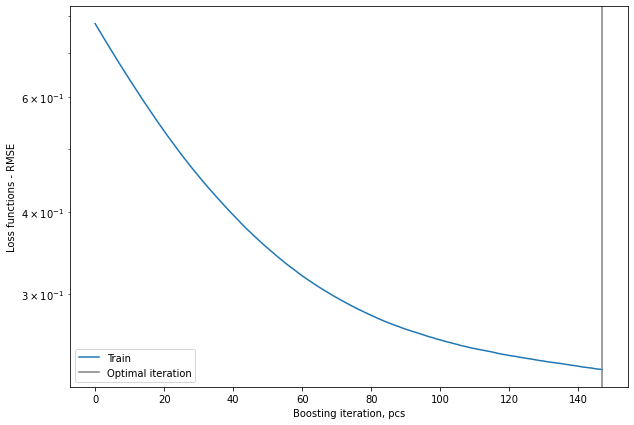

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  19.05
RMSE: 0.2
Relative RMSE(%):  4.228
MSE: 0.1
R square: 87.8%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.020
a1: 0.809
R^2: 0.884
Uncertainty
a0: 0.020+/-0.019
a1: 0.809+/-0.029


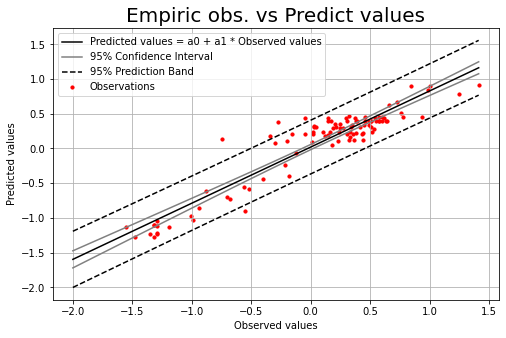

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

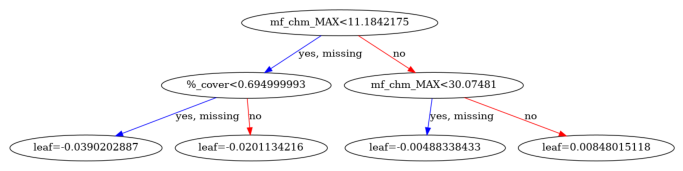

In [35]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

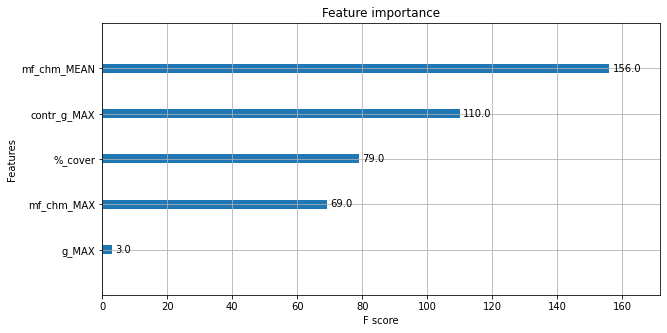

In [37]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

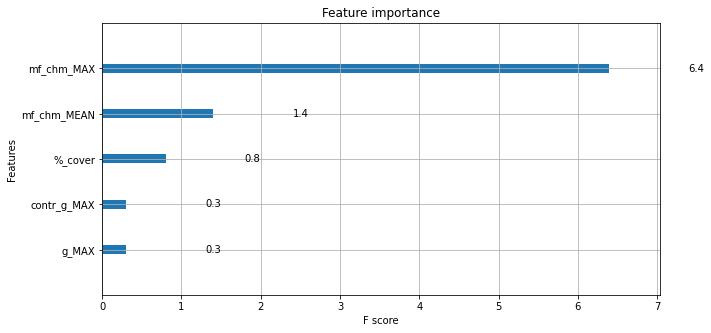

In [38]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

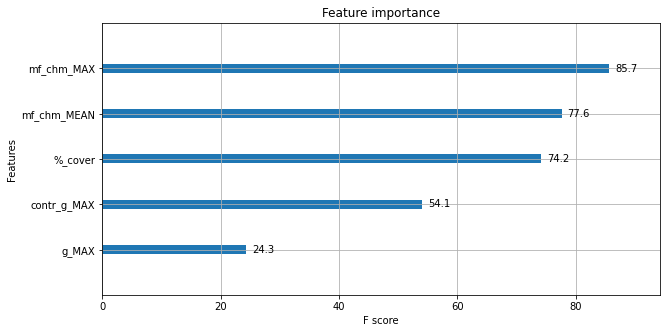

In [39]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [40]:
# Load SHAP`s library
import shap

In [41]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


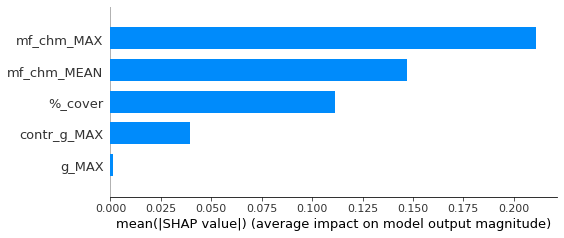

In [42]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

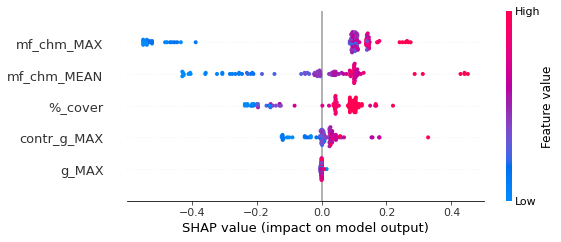

In [43]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

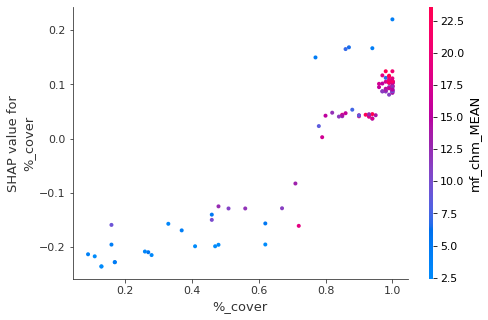

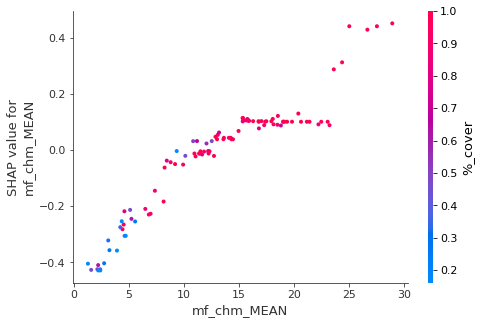

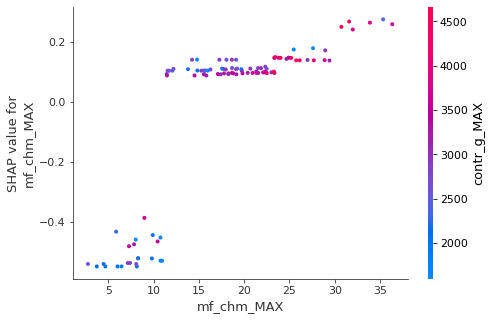

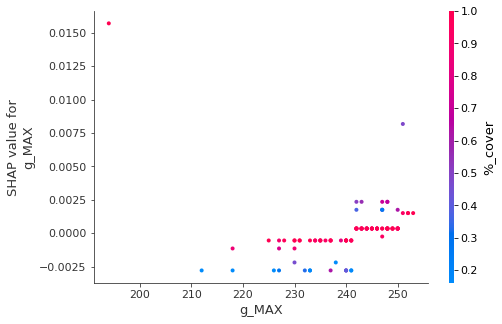

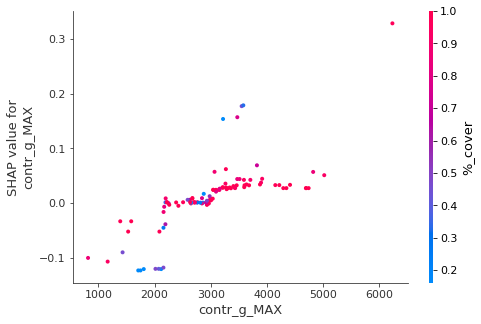

In [44]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [45]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Mbranch_XGB_model_with_texture.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Mbranch_XGB_model_with_texture.txt")